### Deliverable 1: Preprocessing the Data for a Neural Network

In [157]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

EIN                                      NAME APPLICATION_TYPE  \
0  10520599              BLUE KNIGHTS MOTORCYCLE CLUB              T10   
1  10531628    AMERICAN CHESAPEAKE CLUB CHARITABLE TR               T3   
2  10547893        ST CLOUD PROFESSIONAL FIREFIGHTERS               T5   
3  10553066            SOUTHSIDE ATHLETIC ASSOCIATION               T3   
4  10556103  GENETIC RESEARCH INSTITUTE OF THE DESERT               T3   

        AFFILIATION CLASSIFICATION      USE_CASE  ORGANIZATION  STATUS  \
0       Independent          C1000    ProductDev   Association       1   
1       Independent          C2000  Preservation  Co-operative       1   
2  CompanySponsored          C3000    ProductDev   Association       1   
3  CompanySponsored          C2000  Preservation         Trust       1   
4       Independent          C1000     Heathcare         Trust       1   

      INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  IS_SUCCESSFUL  
0              0                      N     5000              1  
1         1-9999                      N   108590              1  
2              0                      N     5000              0  
3    10000-24999                      N     6692              1  
4  100000-499999                      N   142590              1

In [158]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN", "NAME"], 1)
application_df

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
34294              0  
34295              0  
34296              0  
34297              1  
34298              0  

[34299 rows x 10 columns]

In [159]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [160]:
# Look at APPLICATION_TYPE value counts for binning
app_counts = application_df.APPLICATION_TYPE.value_counts()
app_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

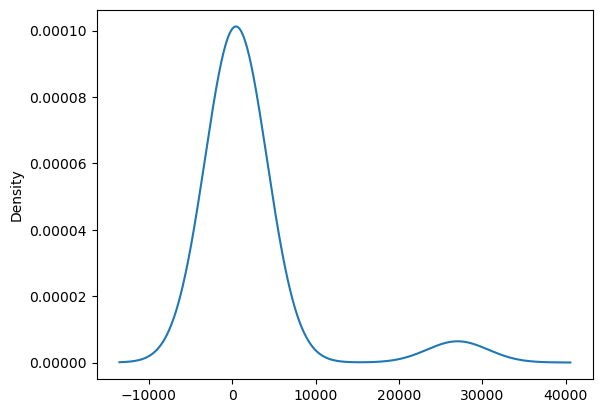

In [161]:
# Visualize the value counts of APPLICATION_TYPE
app_counts.plot.density()

In [162]:
# Determine which values to replace if counts are less than ...?
replace_apps = list(app_counts[app_counts < 500].index)

# Replace in dataframe
for app in replace_apps:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app, "Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [163]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [164]:
class_counts[:10]

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
Name: CLASSIFICATION, dtype: int64

<AxesSubplot:ylabel='Density'>

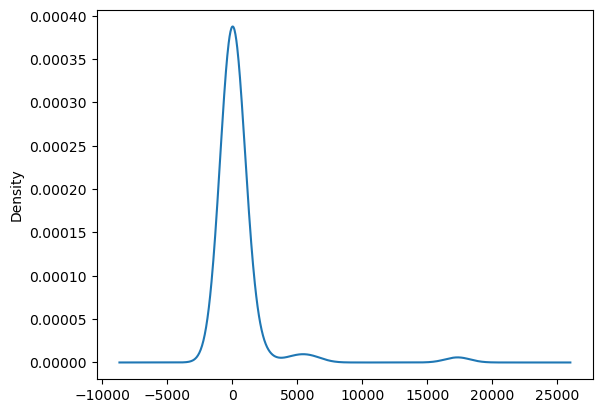

In [165]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [166]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls, "Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [167]:
# Checkpoint inserted here to make a copy of the DataFrame
# as it was used to create the original predictive model in Deliverable 2 

deliv_2_application_df = application_df.copy()

In [112]:
# Look at ASK_AMT value counts for binning
ask_counts = application_df.ASK_AMT.value_counts()
ask_counts

5000        25398
10478           3
15583           3
63981           3
6725            3
            ...  
5371754         1
30060           1
43091152        1
18683           1
36500179        1
Name: ASK_AMT, Length: 8747, dtype: int64

In [113]:
# Examine very large ask amounts
large_ask_df = application_df.loc[application_df["ASK_AMT"] > 5000]
large_ask_df.loc[large_ask_df["ASK_AMT"] > 100000000]

APPLICATION_TYPE    AFFILIATION CLASSIFICATION      USE_CASE  \
676              Other    Independent          C1000    ProductDev   
677              Other    Independent          C1000    ProductDev   
773                 T3  Family/Parent          Other  Preservation   
871                 T3    Independent          C1000  Preservation   
941                 T3    Independent          C1000  Preservation   
...                ...            ...            ...           ...   
34034            Other    Independent          C1000    ProductDev   
34187               T3    Independent          C1000  Preservation   
34222               T3    Independent          C2000  Preservation   
34223               T3    Independent          C1000  Preservation   
34237               T3  Family/Parent          C1000  Preservation   

       ORGANIZATION  STATUS INCOME_AMT SPECIAL_CONSIDERATIONS     ASK_AMT  \
676    Co-operative       1    10M-50M                      N   247168896   
677           Trust       1       50M+                      N   406966250   
773           Trust       1       50M+                      N  1736232349   
871           Trust       1       50M+                      N  1326447551   
941           Trust       1      1M-5M                      N   206768445   
...             ...     ...        ...                    ...         ...   
34034  Co-operative       1    10M-50M                      N   124368165   
34187         Trust       1    10M-50M                      N   143729713   
34222  Co-operative       1       50M+                      N  8556638692   
34223         Trust       1       50M+                      N   116483553   
34237         Trust       1       50M+                      N   539701179   

       IS_SUCCESSFUL  
676                1  
677                1  
773                1  
871                0  
941                0  
...              ...  
34034              1  
34187              0  
34222              0  
34223              0  
34237              0  

[101 rows x 10 columns]

In [114]:
# Binning Ask Amounts - too much variation based on groups in INCOME_AMT

# Dropping all asks of 100 million dollars or more, as they are either illigitimate or require special attention
# They make up a small minority of the dataset and may be outliers

application_df = application_df[application_df["ASK_AMT"] < 100000000]
application_df

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
34294              0  
34295              0  
34296              0  
34297              1  
34298              0  

[34198 rows x 10 columns]

In [115]:
# Create a "checkpoint" here for when the binning doesn't work out. 
application_filtered_df = application_df.copy()
application_filtered_df.head()

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  ASK_AMT  \
0   Association       1              0                      N     5000   
1  Co-operative       1         1-9999                      N   108590   
2   Association       1              0                      N     5000   
3         Trust       1    10000-24999                      N     6692   
4         Trust       1  100000-499999                      N   142590   

   IS_SUCCESSFUL  
0              1  
1              1  
2              0  
3              1  
4              1

In [81]:
# View all income groups
application_df["INCOME_AMT"].unique()

array(['0', '1-9999', '10000-24999', '100000-499999', '10M-50M',
       '25000-99999', '50M+', '1M-5M', '5M-10M'], dtype=object)

In [84]:
# Check ASK_AMT datatype
application_df["ASK_AMT"].dtype

dtype('int64')

In [130]:
# Because ASK_AMT values are integers, they will require a slighlty different approach than previous object data

# Creating new bins for ASK_AMT roughly based on income groups, and adjusted for smaller orders of magnitude

# get values from ASK_AMT
replace_dict = {1: "0-5K", 
                2: "5K-10K",
                3: "10K-50K",
                4: "50K-100K",
                5: "100K-500K",
                6: "500K-1M",
                7: "1M-5M",
                8: "5M-10M",
                9: "10M-50M",
                10:"50M+"}

# Create list to be replaced
replace_class = list(ask_counts.index)

# Replace in dataframe
for i in replace_class:
    if i >= 50000000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[10])
    elif i > 10000000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[9])
    elif i > 5000000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[8])
    elif i > 1000000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[7])
    elif i > 500000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[6])
    elif i > 100000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[5])
    elif i > 500000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[4])
    elif i > 10000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[3])
    elif i > 5000:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[2])
    elif i > 0:
        application_df.ASK_AMT = application_df.ASK_AMT.replace(i, replace_dict[1])



# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0-5K         25398
10K-50K       3821
100K-500K     2304
1M-5M          940
500K-1M        650
5K-10K         549
10M-50M        258
5M-10M         225
50M+            53
Name: ASK_AMT, dtype: int64

In [131]:
ask_counts = application_df.ASK_AMT.value_counts()
ask_counts

0-5K         25398
10K-50K       3821
100K-500K     2304
1M-5M          940
500K-1M        650
5K-10K         549
10M-50M        258
5M-10M         225
50M+            53
Name: ASK_AMT, dtype: int64

<AxesSubplot:ylabel='Density'>

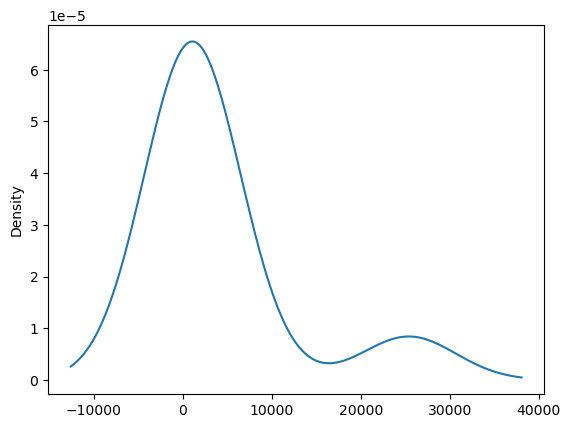

In [132]:
# Visualize the value counts of ASK_AMT
ask_counts.plot.density()

In [134]:
# Determine which values to replace if counts are less than ..?
replace_class = list(ask_counts[ask_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.ASK_AMT = application_df.ASK_AMT.replace(cls, "Other")
    
# Check to make sure binning was successful
application_df.ASK_AMT.value_counts()

0-5K         25398
10K-50K       3821
Other         2675
100K-500K     2304
Name: ASK_AMT, dtype: int64

In [135]:
# Double-check by viewing DF
application_df

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS    ASK_AMT  \
0       Association       1              0                      N       0-5K   
1      Co-operative       1         1-9999                      N  100K-500K   
2       Association       1              0                      N       0-5K   
3             Trust       1    10000-24999                      N      Other   
4             Trust       1  100000-499999                      N  100K-500K   
...             ...     ...            ...                    ...        ...   
34294   Association       1              0                      N       0-5K   
34295   Association       1              0                      N       0-5K   
34296   Association       1              0                      N       0-5K   
34297   Association       1              0                      N       0-5K   
34298  Co-operative       1          1M-5M                      N      Other   

       IS_SUCCESSFUL  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
34294              0  
34295              0  
34296              0  
34297              1  
34298              0  

[34198 rows x 10 columns]

In [136]:
# Check the number of unique values in each column
application_df.nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            6
USE_CASE                  5
ORGANIZATION              4
STATUS                    2
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
ASK_AMT                   4
IS_SUCCESSFUL             2
dtype: int64

In [137]:
# Generate our categorical variable lists
cat_variables = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
cat_variables

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS',
 'ASK_AMT']

In [138]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[cat_variables]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(cat_variables)
encode_df.head()

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  \
0                     0.0                   1.0                   0.0   
1                     0.0                   0.0                   0.0   
2                     0.0                   0.0                   0.0   
3                     0.0                   0.0                   0.0   
4                     0.0                   0.0                   0.0   

   APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  \
0                  0.0                  0.0                  0.0   
1                  1.0                  0.0                  0.0   
2                  0.0                  0.0                  1.0   
3                  1.0                  0.0                  0.0   
4                  1.0                  0.0                  0.0   

   APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  APPLICATION_TYPE_T8  \
0                  0.0                  0.0                  0.0   
1                  0.0                  0.0                  0.0   
2                  0.0                  0.0                  0.0   
3                  0.0                  0.0                  0.0   
4                  0.0                  0.0                  0.0   

   AFFILIATION_CompanySponsored  ...  INCOME_AMT_1M-5M  \
0                           0.0  ...               0.0   
1                           0.0  ...               0.0   
2                           1.0  ...               0.0   
3                           1.0  ...               0.0   
4                           0.0  ...               0.0   

   INCOME_AMT_25000-99999  INCOME_AMT_50M+  INCOME_AMT_5M-10M  \
0                     0.0              0.0                0.0   
1                     0.0              0.0                0.0   
2                     0.0              0.0                0.0   
3                     0.0              0.0                0.0   
4                     0.0              0.0                0.0   

   SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  ASK_AMT_0-5K  \
0                       1.0                       0.0           1.0   
1                       1.0                       0.0           0.0   
2                       1.0                       0.0           1.0   
3                       1.0                       0.0           0.0   
4                       1.0                       0.0           0.0   

   ASK_AMT_100K-500K  ASK_AMT_10K-50K  ASK_AMT_Other  
0                0.0              0.0            0.0  
1                1.0              0.0            0.0  
2                0.0              0.0            0.0  
3                0.0              0.0            1.0  
4                1.0              0.0            0.0  

[5 rows x 45 columns]

In [139]:
# Merge one-hot encoded features and drop the originals
enc_application_df = application_df.merge(encode_df, left_index=True, right_index=True)
enc_application_df = enc_application_df.drop(cat_variables, 1)
enc_application_df

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


STATUS  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0           1              1                     0.0                   1.0   
1           1              1                     0.0                   0.0   
2           1              0                     0.0                   0.0   
3           1              1                     0.0                   0.0   
4           1              1                     0.0                   0.0   
...       ...            ...                     ...                   ...   
34193       1              1                     0.0                   0.0   
34194       1              0                     0.0                   0.0   
34195       1              0                     0.0                   0.0   
34196       1              0                     0.0                   0.0   
34197       1              0                     0.0                   0.0   

       APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                       0.0                  0.0                  0.0   
1                       0.0                  1.0                  0.0   
2                       0.0                  0.0                  0.0   
3                       0.0                  1.0                  0.0   
4                       0.0                  1.0                  0.0   
...                     ...                  ...                  ...   
34193                   0.0                  0.0                  1.0   
34194                   0.0                  0.0                  1.0   
34195                   0.0                  1.0                  0.0   
34196                   0.0                  0.0                  0.0   
34197                   0.0                  1.0                  0.0   

       APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                      0.0                  0.0                  0.0  ...   
1                      0.0                  0.0                  0.0  ...   
2                      1.0                  0.0                  0.0  ...   
3                      0.0                  0.0                  0.0  ...   
4                      0.0                  0.0                  0.0  ...   
...                    ...                  ...                  ...  ...   
34193                  0.0                  0.0                  0.0  ...   
34194                  0.0                  0.0                  0.0  ...   
34195                  0.0                  0.0                  0.0  ...   
34196                  1.0                  0.0                  0.0  ...   
34197                  0.0                  0.0                  0.0  ...   

       INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  INCOME_AMT_50M+  \
0                   0.0                     0.0              0.0   
1                   0.0                     0.0              0.0   
2                   0.0                     0.0              0.0   
3                   0.0                     0.0              0.0   
4                   0.0                     0.0              0.0   
...                 ...                     ...              ...   
34193               0.0                     0.0              0.0   
34194               0.0                     0.0              0.0   
34195               0.0                     0.0              0.0   
34196               0.0                     0.0              0.0   
34197               1.0                     0.0              0.0   

       INCOME_AMT_5M-10M  SPECIAL_CONSIDERATIONS_N  SPECIAL_CONSIDERATIONS_Y  \
0                    0.0                       1.0                       0.0   
1                    0.0                       1.0                       0.0   
2                    0.0                       1.0                       0.0   
3                    0.0                       1.0                       0.0   
4                    0.0                       1.0 

In [140]:
# Split our preprocessed data into our features and target arrays
y = enc_application_df["IS_SUCCESSFUL"].values
X = enc_application_df.drop("IS_SUCCESSFUL", 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [141]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Deliverable 3: Optimize the model created in Deliverable 2

## Optimization Attempt 1:
Given the near target performance of the original model from Deliverable 2 (73.2% accuracy versus a target of 75% accuracy), I will keep the parameters of the model the same. The difference here will be that the ASK_AMT column is binned and therefore simplified. 

In [143]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train[0])
hidden_nodes_layer_1 = (num_input_features * 3)
hidden_nodes_layer_2 = (hidden_nodes_layer_1 / 2)

nn_opt1 = tf.keras.models.Sequential()

# First hidden layer
nn_opt1.add(tf.keras.layers.Dense(units=hidden_nodes_layer_1, input_dim=num_input_features, activation="relu"))

# Second hidden layer
nn_opt1.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation="relu"))

# Output layer
nn_opt1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_opt1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 138)               6486      
                                                                 
 dense_10 (Dense)            (None, 69)                9591      
                                                                 
 dense_11 (Dense)            (None, 1)                 70        
                                                                 
Total params: 16,147
Trainable params: 16,147
Non-trainable params: 0
_________________________________________________________________


In [144]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization1/",exist_ok=True)
checkpoint_path = "checkpoints_optimization1/weights.{epoch:02d}.hdf5"

In [146]:
# Compile the model
nn_opt1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model = nn_opt1.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/800 [..............................] - ETA: 9:31 - loss: 0.7454 - accuracy: 0.5000
Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5
  5/800 [..............................] - ETA: 10s - loss: 0.6917 - accuracy: 0.5875 
Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5
 15/800 [..............................] - ETA: 6s - loss: 0.7095 - accuracy: 0.5312 
Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5
 25/800 [..............................] - ETA: 5s - loss: 0.7170 - accuracy: 0.5288
Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5
 34/800 [>.............................] - ETA: 4s - loss: 0.7108 - accuracy: 0.5322
Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5
 42/800 [>.........

420/800 [==============>...............] - ETA: 1s - loss: 0.6971 - accuracy: 0.5359
Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5
435/800 [===============>..............] - ETA: 1s - loss: 0.6970 - accuracy: 0.5364
Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5
451/800 [===============>..............] - ETA: 1s - loss: 0.6972 - accuracy: 0.5359
Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization1/weights.01.hdf5
467/800 [================>.............] - ETA: 1s - loss: 0.6969 - accuracy: 0.5362
Epoch 1: saving model to checkpoints_optimization1/

 54/800 [=>............................] - ETA: 2s - loss: 0.6846 - accuracy: 0.5434
Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5
 70/800 [=>............................] - ETA: 2s - loss: 0.6887 - accuracy: 0.5366
Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5
 87/800 [==>...........................] - ETA: 2s - loss: 0.6876 - accuracy: 0.5424
Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5
104/800 [==>...........................] - ETA: 2s - loss: 0.6875 - 

495/800 [=================>............] - ETA: 0s - loss: 0.6876 - accuracy: 0.5473
Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5
510/800 [==================>...........] - ETA: 0s - loss: 0.6878 - accuracy: 0.5477
Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5
525/800 [==================>...........] - ETA: 0s - loss: 0.6880 - accuracy: 0.5471
Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization1/weights.02.hdf5
540/800 [===================>..........] - ETA: 0s - loss: 0.6880 - accuracy: 0.5472
Epoch 2: saving model to checkpoints_optimization1/


Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5
133/800 [===>..........................] - ETA: 2s - loss: 0.6888 - accuracy: 0.5442
Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5
135/800 [====>.........................] - ETA: 2s - loss: 0.6887 - accuracy: 0.5449
Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5
150/800 [====>.........................] - ETA: 2s - loss: 0.6886 - accuracy: 0.5462
Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5
165/800 [=====>........................] - ETA: 2s - loss: 0.6878 - accuracy: 0.5477
Epoch 3: saving model to checkpoints_optimization1/


Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5
559/800 [===================>..........] - ETA: 0s - loss: 0.6877 - accuracy: 0.5471
Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5
575/800 [====================>.........] - ETA: 0s - loss: 0.6877 - accuracy: 0.5465
Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5
593/800 [=====================>........] - ETA: 0s - loss: 0.6875 - accuracy: 0.5470
Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization1/weights.03.hdf5



Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5
195/800 [======>.......................] - ETA: 1s - loss: 0.6835 - accuracy: 0.5571
Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5
214/800 [=======>......................] - ETA: 1s - loss: 0.6833 - accuracy: 0.5549
Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5
230/800 [=======>......................] - ETA: 1s - loss: 0.6843 - accuracy: 0.5529
Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5



Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5
640/800 [=======================>......] - ETA: 0s - loss: 0.6862 - accuracy: 0.5507
Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5
657/800 [=======================>......] - ETA: 0s - loss: 0.6862 - accuracy: 0.5499
Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5
675/800 [========================>.....] - ETA: 0s - loss: 0.6863 - accuracy: 0.5490
Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization1/weights.04.hdf5



Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5
290/800 [=========>....................] - ETA: 1s - loss: 0.6842 - accuracy: 0.5528
Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5
310/800 [==========>...................] - ETA: 1s - loss: 0.6844 - accuracy: 0.5531
Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5
330/800 [===========>..................] - ETA: 1s - loss: 0.6845 - accuracy: 0.5519


Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5
740/800 [==========================>...] - ETA: 0s - loss: 0.6855 - accuracy: 0.5516
Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5
760/800 [===========================>..] - ETA: 0s - loss: 0.6855 - accuracy: 0.5509
Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5
780/800 [============================>.] - ETA: 0s - loss: 0.6856 - accuracy: 0.5507
Epoch 5: saving model to checkpoints_optimization1/weights.05.hdf5


382/800 [=============>................] - ETA: 1s - loss: 0.6853 - accuracy: 0.5521
Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5
400/800 [==============>...............] - ETA: 1s - loss: 0.6854 - accuracy: 0.5520
Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5
420/800 [==============>...............] - ETA: 1s - loss: 0.6856 - accuracy: 0.5511
Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization1/weights.06.hdf5



Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5
 39/800 [>.............................] - ETA: 2s - loss: 0.6844 - accuracy: 0.5521
Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5
 55/800 [=>............................] - ETA: 2s - loss: 0.6843 - accuracy: 0.5528
Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5
 75/800 [=>............................] - ETA: 2s - loss: 0.6852 - accuracy: 0.5475
Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5


480/800 [=================>............] - ETA: 0s - loss: 0.6846 - accuracy: 0.5520
Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5
500/800 [=================>............] - ETA: 0s - loss: 0.6845 - accuracy: 0.5533
Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5
518/800 [==================>...........] - ETA: 0s - loss: 0.6847 - accuracy: 0.5520
Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization1/weights.07.hdf5


129/800 [===>..........................] - ETA: 1s - loss: 0.6808 - accuracy: 0.5591
Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5
145/800 [====>.........................] - ETA: 1s - loss: 0.6805 - accuracy: 0.5614
Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5
165/800 [=====>........................] - ETA: 1s - loss: 0.6812 - accuracy: 0.5597
Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5


579/800 [====================>.........] - ETA: 0s - loss: 0.6845 - accuracy: 0.5519
Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5
595/800 [=====================>........] - ETA: 0s - loss: 0.6845 - accuracy: 0.5520
Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5
615/800 [======================>.......] - ETA: 0s - loss: 0.6844 - accuracy: 0.5519
Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization1/weights.08.hdf5



Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5
234/800 [=======>......................] - ETA: 1s - loss: 0.6847 - accuracy: 0.5538
Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5
250/800 [========>.....................] - ETA: 1s - loss: 0.6842 - accuracy: 0.5573
Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5
269/800 [=========>....................] - ETA: 1s - loss: 0.6841 - accuracy: 0.5580
Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5



Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5
680/800 [========================>.....] - ETA: 0s - loss: 0.6839 - accuracy: 0.5558
Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5
695/800 [=========================>....] - ETA: 0s - loss: 0.6838 - accuracy: 0.5557
Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5
710/800 [=========================>....] - ETA: 0s - loss: 0.6838 - accuracy: 0.5556
Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization1/weights.09.hdf5


301/800 [==========>...................] - ETA: 1s - loss: 0.6843 - accuracy: 0.5533
Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5
316/800 [==========>...................] - ETA: 1s - loss: 0.6841 - accuracy: 0.5543
Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5
331/800 [===========>..................] - ETA: 1s - loss: 0.6843 - accuracy: 0.5526
Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5
350/800 [============>.................] - ETA: 1s - loss:

750/800 [===========================>..] - ETA: 0s - loss: 0.6835 - accuracy: 0.5563
Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5
770/800 [===========================>..] - ETA: 0s - loss: 0.6834 - accuracy: 0.5570
Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5
789/800 [============================>.] - ETA: 0s - loss: 0.6836 - accuracy: 0.5566
Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization1/weights.10.hdf5
800/800 [==============================] - 3s 3ms/step - l


Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5
388/800 [=============>................] - ETA: 1s - loss: 0.6812 - accuracy: 0.5617
Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5
405/800 [==============>...............] - ETA: 1s - loss: 0.6812 - accuracy: 0.5614
Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5
425/800 [==============>...............] - ETA: 1s - loss: 0.6811 - accuracy: 0.5607
Epoch 11: saving model to checkpoints_optimization1/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization1/weigh


Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5
 39/800 [>.............................] - ETA: 2s - loss: 0.6837 - accuracy: 0.5321
Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5
 55/800 [=>............................] - ETA: 2s - loss: 0.6824 - accuracy: 0.5426
Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5
 75/800 [=>............................] - ETA: 2s - loss: 0.6818 - accuracy: 0.5467
Epoch 12: saving model to checkpoints_optimization1/weigh


Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5
480/800 [=================>............] - ETA: 0s - loss: 0.6820 - accuracy: 0.5605
Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5
499/800 [=================>............] - ETA: 0s - loss: 0.6824 - accuracy: 0.5597
Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5
515/800 [==================>...........] - ETA: 0s - loss: 0.6823 - accuracy: 0.5599
Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization1/weigh

115/800 [===>..........................] - ETA: 2s - loss: 0.6824 - accuracy: 0.5560
Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5
135/800 [====>.........................] - ETA: 1s - loss: 0.6833 - accuracy: 0.5537
Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5
154/800 [====>.........................] - ETA: 1s - loss: 0.6826 - accuracy: 0.5546
Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weigh


Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5
575/800 [====================>.........] - ETA: 0s - loss: 0.6816 - accuracy: 0.5577
Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5
594/800 [=====================>........] - ETA: 0s - loss: 0.6819 - accuracy: 0.5572
Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization1/weights.13.hdf5
610/800 [=====================>........] - ETA: 0s - loss: 0.6819 - accuracy: 0.5572
Epoch 13: saving model to checkpoints_optimization1/weigh


Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5
219/800 [=======>......................] - ETA: 1s - loss: 0.6783 - accuracy: 0.5725
Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5
235/800 [=======>......................] - ETA: 1s - loss: 0.6782 - accuracy: 0.5688
Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6786 - accuracy: 0.5689
Epoch 14: saving model to checkpoints_optimization1/weigh


Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5
660/800 [=======================>......] - ETA: 0s - loss: 0.6799 - accuracy: 0.5646
Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5
680/800 [========================>.....] - ETA: 0s - loss: 0.6802 - accuracy: 0.5640
Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5
700/800 [=========================>....] - ETA: 0s - loss: 0.6807 - accuracy: 0.5625
Epoch 14: saving model to checkpoints_optimization1/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization1/weigh


Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5
295/800 [==========>...................] - ETA: 1s - loss: 0.6806 - accuracy: 0.5579
Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5
315/800 [==========>...................] - ETA: 1s - loss: 0.6811 - accuracy: 0.5567
Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5
333/800 [===========>..................] - ETA: 1s - loss: 0.6806 - accuracy: 0.5574
Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weigh


Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5
745/800 [==========================>...] - ETA: 0s - loss: 0.6811 - accuracy: 0.5595
Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5
760/800 [===========================>..] - ETA: 0s - loss: 0.6812 - accuracy: 0.5593
Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5
778/800 [============================>.] - ETA: 0s - loss: 0.6812 - accuracy: 0.5596
Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization1/weigh

364/800 [============>.................] - ETA: 1s - loss: 0.6791 - accuracy: 0.5614
Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5
380/800 [=============>................] - ETA: 1s - loss: 0.6791 - accuracy: 0.5621
Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5
400/800 [==============>...............] - ETA: 1s - loss: 0.6790 - accuracy: 0.5624
Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization1/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization1/weigh


Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6786 - accuracy: 0.5844
Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6775 - accuracy: 0.5688
Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5
 59/800 [=>............................] - ETA: 2s - loss: 0.6736 - accuracy: 0.5800
Epoch 17: saving model to checkpoints_optimization1/weigh

454/800 [================>.............] - ETA: 1s - loss: 0.6790 - accuracy: 0.5651
Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5
470/800 [================>.............] - ETA: 0s - loss: 0.6781 - accuracy: 0.5664
Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5
490/800 [=================>............] - ETA: 0s - loss: 0.6788 - accuracy: 0.5644
Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization1/weigh

 90/800 [==>...........................] - ETA: 2s - loss: 0.6794 - accuracy: 0.5531
Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5
110/800 [===>..........................] - ETA: 2s - loss: 0.6805 - accuracy: 0.5517
Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5
129/800 [===>..........................] - ETA: 1s - loss: 0.6804 - accuracy: 0.5535
Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weigh

535/800 [===================>..........] - ETA: 0s - loss: 0.6805 - accuracy: 0.5608
Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5
554/800 [===================>..........] - ETA: 0s - loss: 0.6804 - accuracy: 0.5610
Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5
570/800 [====================>.........] - ETA: 0s - loss: 0.6802 - accuracy: 0.5615
Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization1/weigh


Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5
170/800 [=====>........................] - ETA: 2s - loss: 0.6774 - accuracy: 0.5658
Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5
190/800 [======>.......................] - ETA: 1s - loss: 0.6764 - accuracy: 0.5664
Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5
210/800 [======>.......................] - ETA: 1s - loss: 0.6776 - accuracy: 0.5646
Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weigh


Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5
620/800 [======================>.......] - ETA: 0s - loss: 0.6799 - accuracy: 0.5584
Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5
640/800 [=======================>......] - ETA: 0s - loss: 0.6798 - accuracy: 0.5583
Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5
660/800 [=======================>......] - ETA: 0s - loss: 0.6797 - accuracy: 0.5593
Epoch 19: saving model to checkpoints_optimization1/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization1/weigh

255/800 [========>.....................] - ETA: 1s - loss: 0.6758 - accuracy: 0.5702
Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5
274/800 [=========>....................] - ETA: 1s - loss: 0.6760 - accuracy: 0.5704
Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5
290/800 [=========>....................] - ETA: 1s - loss: 0.6767 - accuracy: 0.5698
Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weigh


Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5
710/800 [=========================>....] - ETA: 0s - loss: 0.6785 - accuracy: 0.5640
Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5
730/800 [==========================>...] - ETA: 0s - loss: 0.6785 - accuracy: 0.5638
Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5
750/800 [===========================>..] - ETA: 0s - loss: 0.6789 - accuracy: 0.5635
Epoch 20: saving model to checkpoints_optimization1/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization1/weigh

340/800 [===========>..................] - ETA: 1s - loss: 0.6759 - accuracy: 0.5668
Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5
359/800 [============>.................] - ETA: 1s - loss: 0.6760 - accuracy: 0.5666
Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5
375/800 [=============>................] - ETA: 1s - loss: 0.6767 - accuracy: 0.5650
Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization1/weigh


Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5
798/800 [============================>.] - ETA: 0s - loss: 0.6780 - accuracy: 0.5618
Epoch 21: saving model to checkpoints_optimization1/weights.21.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6780 - accuracy: 0.5618
Epoch 22/100
  1/800 [..............................] - ETA: 1s - loss: 0.7392 - accuracy: 0.3750
Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6771 - accuracy: 0.5531
Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model t

420/800 [==============>...............] - ETA: 1s - loss: 0.6784 - accuracy: 0.5604
Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5
440/800 [===============>..............] - ETA: 1s - loss: 0.6783 - accuracy: 0.5602
Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5
459/800 [================>.............] - ETA: 1s - loss: 0.6783 - accuracy: 0.5610
Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization1/weigh

 55/800 [=>............................] - ETA: 2s - loss: 0.6748 - accuracy: 0.5636
Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5
 75/800 [=>............................] - ETA: 2s - loss: 0.6728 - accuracy: 0.5721
Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5
 92/800 [==>...........................] - ETA: 2s - loss: 0.6727 - accuracy: 0.5679
Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weigh


Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5
500/800 [=================>............] - ETA: 0s - loss: 0.6762 - accuracy: 0.5669
Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5
515/800 [==================>...........] - ETA: 0s - loss: 0.6763 - accuracy: 0.5662
Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5
530/800 [==================>...........] - ETA: 0s - loss: 0.6763 - accuracy: 0.5656
Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization1/weights.23.hdf5
549/800 [===================>..........] - ETA: 0s - loss:

134/800 [====>.........................] - ETA: 1s - loss: 0.6773 - accuracy: 0.5562
Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5
150/800 [====>.........................] - ETA: 1s - loss: 0.6773 - accuracy: 0.5550
Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5
170/800 [=====>........................] - ETA: 1s - loss: 0.6777 - accuracy: 0.5535
Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weigh


Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5
585/800 [====================>.........] - ETA: 0s - loss: 0.6775 - accuracy: 0.5603
Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5
605/800 [=====================>........] - ETA: 0s - loss: 0.6777 - accuracy: 0.5605
Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5
624/800 [======================>.......] - ETA: 0s - loss: 0.6776 - accuracy: 0.5604
Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization1/weigh

220/800 [=======>......................] - ETA: 1s - loss: 0.6758 - accuracy: 0.5588
Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5
240/800 [========>.....................] - ETA: 1s - loss: 0.6758 - accuracy: 0.5596
Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5
259/800 [========>.....................] - ETA: 1s - loss: 0.6761 - accuracy: 0.5583
Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weigh

667/800 [========================>.....] - ETA: 0s - loss: 0.6772 - accuracy: 0.5615
Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5
685/800 [========================>.....] - ETA: 0s - loss: 0.6772 - accuracy: 0.5617
Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5
705/800 [=========================>....] - ETA: 0s - loss: 0.6772 - accuracy: 0.5621
Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization1/weigh


Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5
319/800 [==========>...................] - ETA: 1s - loss: 0.6745 - accuracy: 0.5679
Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5
335/800 [===========>..................] - ETA: 1s - loss: 0.6750 - accuracy: 0.5674
Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5
355/800 [============>.................] - ETA: 1s - loss: 0.6752 - accuracy: 0.5665
Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weigh


Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5
765/800 [===========================>..] - ETA: 0s - loss: 0.6760 - accuracy: 0.5663
Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5
784/800 [============================>.] - ETA: 0s - loss: 0.6763 - accuracy: 0.5659
Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization1/weights.26.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6763 - accuracy: 0.5657
Epoch 27/100
  1/800 [..............................] - ETA: 1s - loss: 0.7254 - accuracy: 0.4062
Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5

Epoch 27: saving model t


Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5
410/800 [==============>...............] - ETA: 1s - loss: 0.6734 - accuracy: 0.5703
Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5
430/800 [===============>..............] - ETA: 1s - loss: 0.6738 - accuracy: 0.5691
Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization1/weights.27.hdf5
450/800 [===============>..............] - ETA: 1s - loss: 0.6734 - accur

 40/800 [>.............................] - ETA: 2s - loss: 0.6666 - accuracy: 0.5656
Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5
 59/800 [=>............................] - ETA: 2s - loss: 0.6692 - accuracy: 0.5657
Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5
 75/800 [=>............................] - ETA: 2s - loss: 0.6687 - accuracy: 0.5700
Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weigh


Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5
495/800 [=================>............] - ETA: 0s - loss: 0.6735 - accuracy: 0.5685
Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5
515/800 [==================>...........] - ETA: 0s - loss: 0.6744 - accuracy: 0.5672
Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization1/weights.28.hdf5
535/800 [===================>..........] - ETA: 0s - loss: 0.6743 - accuracy: 0.5667
Epoch 28: saving model to checkpoints_optimization1/weigh


Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5
129/800 [===>..........................] - ETA: 1s - loss: 0.6725 - accuracy: 0.5695
Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5
145/800 [====>.........................] - ETA: 1s - loss: 0.6730 - accuracy: 0.5711
Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5
165/800 [=====>........................] - ETA: 1s - loss: 0.6722 - accuracy: 0.5689
Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weigh

570/800 [====================>.........] - ETA: 0s - loss: 0.6754 - accuracy: 0.5640
Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5
588/800 [=====================>........] - ETA: 0s - loss: 0.6759 - accuracy: 0.5629
Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5
605/800 [=====================>........] - ETA: 0s - loss: 0.6755 - accuracy: 0.5645
Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization1/weigh


Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5
220/800 [=======>......................] - ETA: 1s - loss: 0.6692 - accuracy: 0.5778
Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5
239/800 [=======>......................] - ETA: 1s - loss: 0.6697 - accuracy: 0.5749
Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6712 - accuracy: 0.5722
Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weigh


Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5
673/800 [========================>.....] - ETA: 0s - loss: 0.6746 - accuracy: 0.5673
Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5
690/800 [========================>.....] - ETA: 0s - loss: 0.6747 - accuracy: 0.5678
Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization1/weights.30.hdf5
710/800 [=========================>....] - ETA: 0s - loss: 0.6748 - accuracy: 0.5674
Epoch 30: saving model to checkpoints_optimization1/weigh


Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5
314/800 [==========>...................] - ETA: 1s - loss: 0.6753 - accuracy: 0.5656
Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5
330/800 [===========>..................] - ETA: 1s - loss: 0.6753 - accuracy: 0.5653
Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5
349/800 [============>.................] - ETA: 1s - loss: 0.6746 - accuracy: 0.5662
Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weigh

750/800 [===========================>..] - ETA: 0s - loss: 0.6747 - accuracy: 0.5663
Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5
770/800 [===========================>..] - ETA: 0s - loss: 0.6746 - accuracy: 0.5667
Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5
790/800 [============================>.] - ETA: 0s - loss: 0.6747 - accuracy: 0.5672
Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization1/weights.31.hdf5
800/800 [==============================] - 2s 3ms/step - l

395/800 [=============>................] - ETA: 1s - loss: 0.6735 - accuracy: 0.5637
Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5
415/800 [==============>...............] - ETA: 1s - loss: 0.6730 - accuracy: 0.5650
Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5
435/800 [===============>..............] - ETA: 1s - loss: 0.6731 - accuracy: 0.5649
Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization1/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization1/weigh

 40/800 [>.............................] - ETA: 2s - loss: 0.6738 - accuracy: 0.5773
Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5
 60/800 [=>............................] - ETA: 2s - loss: 0.6712 - accuracy: 0.5797
Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5
 80/800 [==>...........................] - ETA: 2s - loss: 0.6724 - accuracy: 0.5813
Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weigh


Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5
505/800 [=================>............] - ETA: 0s - loss: 0.6741 - accuracy: 0.5663
Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5
525/800 [==================>...........] - ETA: 0s - loss: 0.6746 - accuracy: 0.5655
Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization1/weights.33.hdf5
545/800 [===================>..........] - ETA: 0s - loss: 0.6745 - accur


Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5
144/800 [====>.........................] - ETA: 2s - loss: 0.6687 - accuracy: 0.5638
Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5
160/800 [=====>........................] - ETA: 1s - loss: 0.6700 - accuracy: 0.5643
Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5
180/800 [=====>........................] - ETA: 1s - loss: 0.6698 - accuracy: 0.5670
Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weigh

585/800 [====================>.........] - ETA: 0s - loss: 0.6743 - accuracy: 0.5638
Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5
603/800 [=====================>........] - ETA: 0s - loss: 0.6744 - accuracy: 0.5636
Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5
620/800 [======================>.......] - ETA: 0s - loss: 0.6749 - accuracy: 0.5624
Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization1/weigh

224/800 [=======>......................] - ETA: 1s - loss: 0.6703 - accuracy: 0.5700
Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5
240/800 [========>.....................] - ETA: 1s - loss: 0.6705 - accuracy: 0.5710
Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5
257/800 [========>.....................] - ETA: 1s - loss: 0.6708 - accuracy: 0.5721
Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5
270/800 [=========>....................] - ETA: 1s - loss:


Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5
675/800 [========================>.....] - ETA: 0s - loss: 0.6731 - accuracy: 0.5683
Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5
695/800 [=========================>....] - ETA: 0s - loss: 0.6733 - accuracy: 0.5681
Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5
710/800 [=========================>....] - ETA: 0s - loss: 0.6733 - accuracy: 0.5682
Epoch 35: saving model to checkpoints_optimization1/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization1/weigh


Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5
312/800 [==========>...................] - ETA: 1s - loss: 0.6735 - accuracy: 0.5651
Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5
330/800 [===========>..................] - ETA: 1s - loss: 0.6737 - accuracy: 0.5659
Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5
350/800 [============>.................] - ETA: 1s - loss: 0.6737 - accuracy: 0.5663
Epoch 36: saving model to checkpoints_optimization1/weigh


Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5
755/800 [===========================>..] - ETA: 0s - loss: 0.6738 - accuracy: 0.5668
Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5
775/800 [============================>.] - ETA: 0s - loss: 0.6738 - accuracy: 0.5667
Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5
794/800 [============================>.] - ETA: 0s - loss: 0.6736 - accuracy: 0.5674
Epoch 36: saving model to checkpoints_optimization1/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization1/weigh

390/800 [=============>................] - ETA: 1s - loss: 0.6734 - accuracy: 0.5667
Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5
409/800 [==============>...............] - ETA: 1s - loss: 0.6726 - accuracy: 0.5680
Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5
425/800 [==============>...............] - ETA: 1s - loss: 0.6733 - accuracy: 0.5667
Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization1/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization1/weigh

 38/800 [>.............................] - ETA: 2s - loss: 0.6734 - accuracy: 0.5732
Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5
 55/800 [=>............................] - ETA: 2s - loss: 0.6699 - accuracy: 0.5699
Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5
 75/800 [=>............................] - ETA: 2s - loss: 0.6707 - accuracy: 0.5713
Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weigh

488/800 [=================>............] - ETA: 0s - loss: 0.6727 - accuracy: 0.5674
Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5
505/800 [=================>............] - ETA: 0s - loss: 0.6723 - accuracy: 0.5692
Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5
525/800 [==================>...........] - ETA: 0s - loss: 0.6720 - accuracy: 0.5699
Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization1/weigh

129/800 [===>..........................] - ETA: 1s - loss: 0.6715 - accuracy: 0.5635
Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5
145/800 [====>.........................] - ETA: 1s - loss: 0.6718 - accuracy: 0.5597
Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5
165/800 [=====>........................] - ETA: 1s - loss: 0.6707 - accuracy: 0.5616
Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weigh


Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5
575/800 [====================>.........] - ETA: 0s - loss: 0.6734 - accuracy: 0.5646
Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5
595/800 [=====================>........] - ETA: 0s - loss: 0.6735 - accuracy: 0.5640
Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5
615/800 [======================>.......] - ETA: 0s - loss: 0.6735 - accuracy: 0.5641
Epoch 39: saving model to checkpoints_optimization1/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization1/weigh


Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5
205/800 [======>.......................] - ETA: 1s - loss: 0.6706 - accuracy: 0.5651
Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5
224/800 [=======>......................] - ETA: 1s - loss: 0.6703 - accuracy: 0.5653
Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5
240/800 [========>.....................] - ETA: 1s - loss: 0.6699 - accuracy: 0.5660
Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weigh


Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5
660/800 [=======================>......] - ETA: 0s - loss: 0.6710 - accuracy: 0.5686
Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5
680/800 [========================>.....] - ETA: 0s - loss: 0.6714 - accuracy: 0.5675
Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization1/weights.40.hdf5
700/800 [=========================>....] - ETA: 0s - loss: 0.6717 - accur

287/800 [=========>....................] - ETA: 1s - loss: 0.6710 - accuracy: 0.5715
Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5
290/800 [=========>....................] - ETA: 1s - loss: 0.6711 - accuracy: 0.5717
Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5
305/800 [==========>...................] - ETA: 1s - loss: 0.6717 - accuracy: 0.5706
Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5
322/800 [===========>..................] - ETA: 1s - loss: 0.6714 - accuracy: 0.5713
Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_opti

720/800 [==========================>...] - ETA: 0s - loss: 0.6720 - accuracy: 0.5662
Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5
740/800 [==========================>...] - ETA: 0s - loss: 0.6720 - accuracy: 0.5664
Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5
760/800 [===========================>..] - ETA: 0s - loss: 0.6720 - accuracy: 0.5657
Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization1/weigh


Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5
365/800 [============>.................] - ETA: 1s - loss: 0.6730 - accuracy: 0.5641
Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5
385/800 [=============>................] - ETA: 1s - loss: 0.6727 - accuracy: 0.5644
Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5
403/800 [==============>...............] - ETA: 1s - loss: 0.6722 - accuracy: 0.5647
Epoch 42: saving model to checkpoints_optimization1/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization1/weigh

800/800 [==============================] - 2s 3ms/step - loss: 0.6722 - accuracy: 0.5661
Epoch 43/100
  1/800 [..............................] - ETA: 1s - loss: 0.7390 - accuracy: 0.3438
Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6814 - accuracy: 0.5344
Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6765 - accuracy: 0.5453
Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model t

440/800 [===============>..............] - ETA: 1s - loss: 0.6709 - accuracy: 0.5697
Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5
460/800 [================>.............] - ETA: 1s - loss: 0.6708 - accuracy: 0.5691
Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5
480/800 [=================>............] - ETA: 0s - loss: 0.6712 - accuracy: 0.5688
Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization1/weigh

 72/800 [=>............................] - ETA: 2s - loss: 0.6658 - accuracy: 0.5881
Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5
 90/800 [==>...........................] - ETA: 2s - loss: 0.6647 - accuracy: 0.5896
Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5
110/800 [===>..........................] - ETA: 2s - loss: 0.6640 - accuracy: 0.5909
Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weigh

515/800 [==================>...........] - ETA: 0s - loss: 0.6713 - accuracy: 0.5689
Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5
533/800 [==================>...........] - ETA: 0s - loss: 0.6715 - accuracy: 0.5682
Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5
550/800 [===================>..........] - ETA: 0s - loss: 0.6716 - accuracy: 0.5686
Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization1/weigh


Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5
164/800 [=====>........................] - ETA: 1s - loss: 0.6683 - accuracy: 0.5697
Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5
180/800 [=====>........................] - ETA: 1s - loss: 0.6699 - accuracy: 0.5670
Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5
200/800 [======>.......................] - ETA: 1s - loss: 0.6704 - accuracy: 0.5667
Epoch 45: saving model to checkpoints_optimization1/weigh


Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5
610/800 [=====================>........] - ETA: 0s - loss: 0.6707 - accuracy: 0.5707
Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5
630/800 [======================>.......] - ETA: 0s - loss: 0.6711 - accuracy: 0.5700
Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization1/weights.45.hdf5
650/800 [=======================>......] - ETA: 0s - loss: 0.6714 - accuracy: 0.5691
Epoch 45: saving model to checkpoints_optimization1/weigh

239/800 [=======>......................] - ETA: 1s - loss: 0.6679 - accuracy: 0.5696
Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6686 - accuracy: 0.5694
Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5
275/800 [=========>....................] - ETA: 1s - loss: 0.6691 - accuracy: 0.5703
Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weigh

685/800 [========================>.....] - ETA: 0s - loss: 0.6707 - accuracy: 0.5682
Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5
704/800 [=========================>....] - ETA: 0s - loss: 0.6707 - accuracy: 0.5679
Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5
720/800 [==========================>...] - ETA: 0s - loss: 0.6711 - accuracy: 0.5675
Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization1/weigh


Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5
335/800 [===========>..................] - ETA: 1s - loss: 0.6684 - accuracy: 0.5770
Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5
355/800 [============>.................] - ETA: 1s - loss: 0.6683 - accuracy: 0.5760
Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5
374/800 [=============>................] - ETA: 1s - loss: 0.6678 - accuracy: 0.5754
Epoch 47: saving model to checkpoints_optimization1/weigh


Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5
779/800 [============================>.] - ETA: 0s - loss: 0.6711 - accuracy: 0.5676
Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5
795/800 [============================>.] - ETA: 0s - loss: 0.6713 - accuracy: 0.5676
Epoch 47: saving model to checkpoints_optimization1/weights.47.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6715 - accuracy: 0.5672
Epoch 48/100
  1/800 [..............................] - ETA: 1s - loss: 0.6247 - accuracy: 0.6250
Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model t


Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5
405/800 [==============>...............] - ETA: 1s - loss: 0.6686 - accuracy: 0.5735
Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5
425/800 [==============>...............] - ETA: 1s - loss: 0.6690 - accuracy: 0.5723
Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5
445/800 [===============>..............] - ETA: 1s - loss: 0.6692 - accuracy: 0.5719
Epoch 48: saving model to checkpoints_optimization1/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization1/weigh


Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5
 55/800 [=>............................] - ETA: 2s - loss: 0.6656 - accuracy: 0.5784
Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5
 75/800 [=>............................] - ETA: 2s - loss: 0.6684 - accuracy: 0.5713
Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5
 95/800 [==>...........................] - ETA: 2s - loss: 0.6686 - accuracy: 0.5711
Epoch 49: saving model to checkpoints_optimization1/weigh


Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5
500/800 [=================>............] - ETA: 0s - loss: 0.6711 - accuracy: 0.5678
Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5
520/800 [==================>...........] - ETA: 0s - loss: 0.6712 - accuracy: 0.5677
Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization1/weights.49.hdf5
540/800 [===================>..........] - ETA: 0s - loss: 0.6710 - accuracy: 0.5680
Epoch 49: saving model to checkpoints_optimization1/weigh


Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5
145/800 [====>.........................] - ETA: 1s - loss: 0.6648 - accuracy: 0.5778
Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5
165/800 [=====>........................] - ETA: 1s - loss: 0.6684 - accuracy: 0.5794
Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5
185/800 [=====>........................] - ETA: 1s - loss: 0.6684 - accuracy: 0.5785
Epoch 50: saving model to checkpoints_optimization1/weigh

584/800 [====================>.........] - ETA: 0s - loss: 0.6700 - accuracy: 0.5729
Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5
600/800 [=====================>........] - ETA: 0s - loss: 0.6703 - accuracy: 0.5722
Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5
620/800 [======================>.......] - ETA: 0s - loss: 0.6707 - accuracy: 0.5714
Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization1/weigh

225/800 [=======>......................] - ETA: 1s - loss: 0.6662 - accuracy: 0.5753
Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5
244/800 [========>.....................] - ETA: 1s - loss: 0.6660 - accuracy: 0.5757
Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5
260/800 [========>.....................] - ETA: 1s - loss: 0.6663 - accuracy: 0.5755
Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weigh


Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5
680/800 [========================>.....] - ETA: 0s - loss: 0.6716 - accuracy: 0.5686
Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5
700/800 [=========================>....] - ETA: 0s - loss: 0.6716 - accuracy: 0.5683
Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5
720/800 [==========================>...] - ETA: 0s - loss: 0.6715 - accuracy: 0.5686
Epoch 51: saving model to checkpoints_optimization1/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization1/weigh


Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5
301/800 [==========>...................] - ETA: 1s - loss: 0.6732 - accuracy: 0.5663
Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5
316/800 [==========>...................] - ETA: 1s - loss: 0.6735 - accuracy: 0.5670
Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5
332/800 [===========>..................] - ETA: 1s - loss: 0.6733 - accuracy: 0.5654
Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5
347/800 [============>.................] - ETA: 1s - loss:


Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5
730/800 [==========================>...] - ETA: 0s - loss: 0.6718 - accuracy: 0.5672
Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5
750/800 [===========================>..] - ETA: 0s - loss: 0.6714 - accuracy: 0.5677
Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization1/weights.52.hdf5
770/800 [===========================>..] - ETA: 0s - loss: 0.6714 - accuracy: 0.5676
Epoch 52: saving model to checkpoints_optimization1/weigh


Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5
370/800 [============>.................] - ETA: 1s - loss: 0.6679 - accuracy: 0.5731
Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5
389/800 [=============>................] - ETA: 1s - loss: 0.6683 - accuracy: 0.5712
Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization1/weights.53.hdf5
405/800 [==============>...............] - ETA: 1s - loss: 0.6683 - accuracy: 0.5711
Epoch 53: saving model to checkpoints_optimization1/weigh

Epoch 54/100
  1/800 [..............................] - ETA: 2s - loss: 0.6811 - accuracy: 0.4688
Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6618 - accuracy: 0.5719
Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5
 35/800 [>.............................] - ETA: 2s - loss: 0.6648 - accuracy: 0.5696
Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5
 50/800 [>.............................] - ET


Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5
450/800 [===============>..............] - ETA: 1s - loss: 0.6711 - accuracy: 0.5680
Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5
470/800 [================>.............] - ETA: 1s - loss: 0.6719 - accuracy: 0.5663
Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization1/weights.54.hdf5
488/800 [=================>............] - ETA: 0s - loss: 0.6714 - accuracy: 0.5669
Epoch 54: saving model to checkpoints_optimization1/weigh

 75/800 [=>............................] - ETA: 2s - loss: 0.6656 - accuracy: 0.5825
Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5
 95/800 [==>...........................] - ETA: 2s - loss: 0.6647 - accuracy: 0.5773
Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5
115/800 [===>..........................] - ETA: 2s - loss: 0.6639 - accuracy: 0.5772
Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weigh

520/800 [==================>...........] - ETA: 0s - loss: 0.6699 - accuracy: 0.5684
Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5
540/800 [===================>..........] - ETA: 0s - loss: 0.6705 - accuracy: 0.5673
Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5
560/800 [====================>.........] - ETA: 0s - loss: 0.6707 - accuracy: 0.5673
Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization1/weigh


Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5
165/800 [=====>........................] - ETA: 2s - loss: 0.6701 - accuracy: 0.5674
Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5
184/800 [=====>........................] - ETA: 1s - loss: 0.6691 - accuracy: 0.5717
Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5
200/800 [======>.......................] - ETA: 1s - loss: 0.6688 - accuracy: 0.5730
Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weigh


Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5
605/800 [=====================>........] - ETA: 0s - loss: 0.6695 - accuracy: 0.5732
Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5
625/800 [======================>.......] - ETA: 0s - loss: 0.6697 - accuracy: 0.5727
Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5
645/800 [=======================>......] - ETA: 0s - loss: 0.6697 - accuracy: 0.5722
Epoch 56: saving model to checkpoints_optimization1/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization1/weigh


Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5
254/800 [========>.....................] - ETA: 1s - loss: 0.6676 - accuracy: 0.5717
Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5
270/800 [=========>....................] - ETA: 1s - loss: 0.6671 - accuracy: 0.5727
Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5
289/800 [=========>....................] - ETA: 1s - loss: 0.6671 - accuracy: 0.5730
Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weigh


Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5
698/800 [=========================>....] - ETA: 0s - loss: 0.6692 - accuracy: 0.5681
Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5
715/800 [=========================>....] - ETA: 0s - loss: 0.6694 - accuracy: 0.5677
Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5
734/800 [==========================>...] - ETA: 0s - loss: 0.6695 - accuracy: 0.5674
Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization1/weigh

339/800 [===========>..................] - ETA: 1s - loss: 0.6690 - accuracy: 0.5716
Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5
355/800 [============>.................] - ETA: 1s - loss: 0.6695 - accuracy: 0.5697
Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5
374/800 [=============>................] - ETA: 1s - loss: 0.6699 - accuracy: 0.5696
Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weigh

783/800 [============================>.] - ETA: 0s - loss: 0.6700 - accuracy: 0.5674
Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization1/weights.58.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6701 - accuracy: 0.5677
Epoch 59/100
  1/800 [..............................] - ETA: 1s - loss: 0.5907 - accuracy: 0.7812
Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6350 - accuracy: 0.6156
Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model t

424/800 [==============>...............] - ETA: 1s - loss: 0.6686 - accuracy: 0.5719
Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5
440/800 [===============>..............] - ETA: 1s - loss: 0.6683 - accuracy: 0.5726
Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5
460/800 [================>.............] - ETA: 1s - loss: 0.6687 - accuracy: 0.5725
Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization1/weigh

 55/800 [=>............................] - ETA: 2s - loss: 0.6678 - accuracy: 0.5511
Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5
 70/800 [=>............................] - ETA: 2s - loss: 0.6674 - accuracy: 0.5589
Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5
 90/800 [==>...........................] - ETA: 2s - loss: 0.6656 - accuracy: 0.5677
Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5
109/800 [===>..........................] - ETA: 2s - loss:

500/800 [=================>............] - ETA: 0s - loss: 0.6687 - accuracy: 0.5686
Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5
518/800 [==================>...........] - ETA: 0s - loss: 0.6690 - accuracy: 0.5682
Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5
530/800 [==================>...........] - ETA: 0s - loss: 0.6688 - accuracy: 0.5677
Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization1/weights.60.hdf5
547/800 [===================>..........] - ETA: 0s - loss: 0.6689 - accuracy: 0.5677
Epoch 60: saving model to checkpoints_opti


Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5
144/800 [====>.........................] - ETA: 1s - loss: 0.6684 - accuracy: 0.5736
Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5
160/800 [=====>........................] - ETA: 1s - loss: 0.6687 - accuracy: 0.5701
Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5
180/800 [=====>........................] - ETA: 1s - loss: 0.6680 - accuracy: 0.5722
Epoch 61: saving model to checkpoints_optimization1/weigh

580/800 [====================>.........] - ETA: 0s - loss: 0.6684 - accuracy: 0.5711
Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5
599/800 [=====================>........] - ETA: 0s - loss: 0.6687 - accuracy: 0.5704
Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5
615/800 [======================>.......] - ETA: 0s - loss: 0.6687 - accuracy: 0.5700
Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization1/weigh

219/800 [=======>......................] - ETA: 1s - loss: 0.6670 - accuracy: 0.5695
Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5
235/800 [=======>......................] - ETA: 1s - loss: 0.6667 - accuracy: 0.5711
Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6676 - accuracy: 0.5707
Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weigh


Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5
669/800 [========================>.....] - ETA: 0s - loss: 0.6701 - accuracy: 0.5688
Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5
685/800 [========================>.....] - ETA: 0s - loss: 0.6702 - accuracy: 0.5694
Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5
704/800 [=========================>....] - ETA: 0s - loss: 0.6698 - accuracy: 0.5699
Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization1/weigh


Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5
320/800 [===========>..................] - ETA: 1s - loss: 0.6697 - accuracy: 0.5719
Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5
340/800 [===========>..................] - ETA: 1s - loss: 0.6692 - accuracy: 0.5731
Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5
360/800 [============>.................] - ETA: 1s - loss: 0.6694 - accur

754/800 [===========================>..] - ETA: 0s - loss: 0.6692 - accuracy: 0.5689
Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5
770/800 [===========================>..] - ETA: 0s - loss: 0.6692 - accuracy: 0.5691
Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5
790/800 [============================>.] - ETA: 0s - loss: 0.6690 - accuracy: 0.5695
Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization1/weights.63.hdf5
800/800 [==============================] - 2s 3ms/step - l

385/800 [=============>................] - ETA: 1s - loss: 0.6673 - accuracy: 0.5700
Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5
404/800 [==============>...............] - ETA: 1s - loss: 0.6676 - accuracy: 0.5686
Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5
420/800 [==============>...............] - ETA: 1s - loss: 0.6677 - accuracy: 0.5685
Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization1/weights.64.hdf5
439/800 [===============>..............] - ETA: 1s - loss:

 20/800 [..............................] - ETA: 2s - loss: 0.6758 - accuracy: 0.5688
Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6673 - accuracy: 0.5711
Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5
 59/800 [=>............................] - ETA: 2s - loss: 0.6691 - accuracy: 0.5641
Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weigh


Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5
475/800 [================>.............] - ETA: 0s - loss: 0.6682 - accuracy: 0.5659
Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5
495/800 [=================>............] - ETA: 0s - loss: 0.6680 - accuracy: 0.5664
Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization1/weights.65.hdf5
515/800 [==================>...........] - ETA: 0s - loss: 0.6687 - accuracy: 0.5658
Epoch 65: saving model to checkpoints_optimization1/weigh

105/800 [==>...........................] - ETA: 2s - loss: 0.6651 - accuracy: 0.5676
Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5
124/800 [===>..........................] - ETA: 2s - loss: 0.6645 - accuracy: 0.5685
Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5
140/800 [====>.........................] - ETA: 2s - loss: 0.6668 - accuracy: 0.5650
Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weigh


Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5
550/800 [===================>..........] - ETA: 0s - loss: 0.6677 - accuracy: 0.5699
Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5
567/800 [====================>.........] - ETA: 0s - loss: 0.6680 - accuracy: 0.5689
Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5
585/800 [====================>.........] - ETA: 0s - loss: 0.6681 - accuracy: 0.5686
Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization1/weigh


Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5
190/800 [======>.......................] - ETA: 1s - loss: 0.6664 - accuracy: 0.5762
Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5
210/800 [======>.......................] - ETA: 1s - loss: 0.6669 - accuracy: 0.5760
Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5
229/800 [=======>......................] - ETA: 1s - loss: 0.6668 - accuracy: 0.5746
Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weigh

630/800 [======================>.......] - ETA: 0s - loss: 0.6683 - accuracy: 0.5721
Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5
650/800 [=======================>......] - ETA: 0s - loss: 0.6684 - accuracy: 0.5719
Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5
669/800 [========================>.....] - ETA: 0s - loss: 0.6683 - accuracy: 0.5722
Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization1/weigh

263/800 [========>.....................] - ETA: 1s - loss: 0.6660 - accuracy: 0.5651
Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5
280/800 [=========>....................] - ETA: 1s - loss: 0.6653 - accuracy: 0.5660
Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5
298/800 [==========>...................] - ETA: 1s - loss: 0.6651 - accuracy: 0.5680
Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weigh

699/800 [=========================>....] - ETA: 0s - loss: 0.6681 - accuracy: 0.5697
Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5
715/800 [=========================>....] - ETA: 0s - loss: 0.6687 - accuracy: 0.5686
Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5
734/800 [==========================>...] - ETA: 0s - loss: 0.6687 - accuracy: 0.5685
Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization1/weigh


Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5
345/800 [===========>..................] - ETA: 1s - loss: 0.6666 - accuracy: 0.5727
Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5
359/800 [============>.................] - ETA: 1s - loss: 0.6673 - accuracy: 0.5727
Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5
371/800 [============>.................] - ETA: 1s - loss: 0.6670 - accuracy: 0.5733
Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weigh

775/800 [============================>.] - ETA: 0s - loss: 0.6682 - accuracy: 0.5695
Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5
792/800 [============================>.] - ETA: 0s - loss: 0.6683 - accuracy: 0.5694
Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization1/weights.69.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6684 - accuracy: 0.5691
Epoch 70/100
  1/800 [..............................] - ETA: 1s - loss: 0.6508 - accuracy: 0.6250
Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5
 20/800 [................


Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5
425/800 [==============>...............] - ETA: 1s - loss: 0.6682 - accuracy: 0.5684
Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5
445/800 [===============>..............] - ETA: 1s - loss: 0.6683 - accuracy: 0.5680
Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization1/weights.70.hdf5
465/800 [================>.............] - ETA: 0s - loss: 0.6684 - accur

 55/800 [=>............................] - ETA: 2s - loss: 0.6638 - accuracy: 0.5784
Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5
 75/800 [=>............................] - ETA: 2s - loss: 0.6658 - accuracy: 0.5783
Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5
 95/800 [==>...........................] - ETA: 2s - loss: 0.6664 - accuracy: 0.5743
Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weigh


Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5
510/800 [==================>...........] - ETA: 0s - loss: 0.6691 - accuracy: 0.5670
Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5
530/800 [==================>...........] - ETA: 0s - loss: 0.6688 - accuracy: 0.5680
Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization1/weights.71.hdf5
550/800 [===================>..........] - ETA: 0s - loss: 0.6685 - accuracy: 0.5677
Epoch 71: saving model to checkpoints_optimization1/weigh


Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5
150/800 [====>.........................] - ETA: 1s - loss: 0.6675 - accuracy: 0.5658
Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5
169/800 [=====>........................] - ETA: 1s - loss: 0.6684 - accuracy: 0.5669
Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5
185/800 [=====>........................] - ETA: 1s - loss: 0.6670 - accuracy: 0.5718
Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weigh


Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5
600/800 [=====================>........] - ETA: 0s - loss: 0.6679 - accuracy: 0.5705
Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5
619/800 [======================>.......] - ETA: 0s - loss: 0.6682 - accuracy: 0.5702
Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5
635/800 [======================>.......] - ETA: 0s - loss: 0.6680 - accuracy: 0.5702
Epoch 72: saving model to checkpoints_optimization1/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization1/weigh

239/800 [=======>......................] - ETA: 1s - loss: 0.6651 - accuracy: 0.5681
Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6644 - accuracy: 0.5691
Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5
275/800 [=========>....................] - ETA: 1s - loss: 0.6637 - accuracy: 0.5714
Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weigh

680/800 [========================>.....] - ETA: 0s - loss: 0.6672 - accuracy: 0.5710
Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5
700/800 [=========================>....] - ETA: 0s - loss: 0.6674 - accuracy: 0.5705
Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5
719/800 [=========================>....] - ETA: 0s - loss: 0.6675 - accuracy: 0.5701
Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization1/weigh


Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5
323/800 [===========>..................] - ETA: 1s - loss: 0.6679 - accuracy: 0.5637
Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5
340/800 [===========>..................] - ETA: 1s - loss: 0.6682 - accuracy: 0.5635
Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5
360/800 [============>.................] - ETA: 1s - loss: 0.6685 - accuracy: 0.5622
Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weigh

769/800 [===========================>..] - ETA: 0s - loss: 0.6682 - accuracy: 0.5674
Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5
785/800 [============================>.] - ETA: 0s - loss: 0.6681 - accuracy: 0.5681
Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization1/weights.74.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6680 - accuracy: 0.5686
Epoch 75/100
  1/800 [..............................] - ETA: 2s - loss: 0.6700 - accuracy: 0.6250
Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5

Epoch 75: saving model t

400/800 [==============>...............] - ETA: 1s - loss: 0.6683 - accuracy: 0.5688
Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5
419/800 [==============>...............] - ETA: 1s - loss: 0.6683 - accuracy: 0.5687
Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5
435/800 [===============>..............] - ETA: 1s - loss: 0.6682 - accuracy: 0.5689
Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization1/weights.75.hdf5
454/800 [================>.............] - ETA: 1s - loss:

 37/800 [>.............................] - ETA: 2s - loss: 0.6707 - accuracy: 0.5811
Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5
 55/800 [=>............................] - ETA: 2s - loss: 0.6685 - accuracy: 0.5767
Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5
 75/800 [=>............................] - ETA: 2s - loss: 0.6696 - accuracy: 0.5771
Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weigh


Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5
490/800 [=================>............] - ETA: 0s - loss: 0.6689 - accuracy: 0.5675
Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5
510/800 [==================>...........] - ETA: 0s - loss: 0.6688 - accuracy: 0.5673
Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization1/weights.76.hdf5
530/800 [==================>...........] - ETA: 0s - loss: 0.6687 - accuracy: 0.5678
Epoch 76: saving model to checkpoints_optimization1/weigh


Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5
128/800 [===>..........................] - ETA: 2s - loss: 0.6600 - accuracy: 0.5869
Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5
145/800 [====>.........................] - ETA: 1s - loss: 0.6625 - accuracy: 0.5782
Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5
165/800 [=====>........................] - ETA: 1s - loss: 0.6634 - accuracy: 0.5792
Epoch 77: saving model to checkpoints_optimization1/weigh


Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5
575/800 [====================>.........] - ETA: 0s - loss: 0.6660 - accuracy: 0.5715
Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5
594/800 [=====================>........] - ETA: 0s - loss: 0.6657 - accuracy: 0.5715
Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization1/weights.77.hdf5
610/800 [=====================>........] - ETA: 0s - loss: 0.6658 - accuracy: 0.5711
Epoch 77: saving model to checkpoints_optimization1/weigh

205/800 [======>.......................] - ETA: 1s - loss: 0.6645 - accuracy: 0.5694
Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5
225/800 [=======>......................] - ETA: 1s - loss: 0.6652 - accuracy: 0.5688
Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5
245/800 [========>.....................] - ETA: 1s - loss: 0.6643 - accuracy: 0.5693
Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weigh


Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5
658/800 [=======================>......] - ETA: 0s - loss: 0.6669 - accuracy: 0.5714
Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5
675/800 [========================>.....] - ETA: 0s - loss: 0.6673 - accuracy: 0.5710
Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5
695/800 [=========================>....] - ETA: 0s - loss: 0.6671 - accuracy: 0.5711
Epoch 78: saving model to checkpoints_optimization1/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization1/weigh


Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5
303/800 [==========>...................] - ETA: 1s - loss: 0.6632 - accuracy: 0.5757
Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5
320/800 [===========>..................] - ETA: 1s - loss: 0.6632 - accuracy: 0.5764
Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5
336/800 [===========>..................] - ETA: 1s - loss: 0.6635 - accuracy: 0.5762
Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weigh

740/800 [==========================>...] - ETA: 0s - loss: 0.6676 - accuracy: 0.5692
Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5
760/800 [===========================>..] - ETA: 0s - loss: 0.6678 - accuracy: 0.5686
Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5
778/800 [============================>.] - ETA: 0s - loss: 0.6679 - accuracy: 0.5689
Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization1/weigh


Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5
380/800 [=============>................] - ETA: 1s - loss: 0.6667 - accuracy: 0.5650
Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5
399/800 [=============>................] - ETA: 1s - loss: 0.6674 - accuracy: 0.5639
Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5
415/800 [==============>...............] - ETA: 1s - loss: 0.6672 - accuracy: 0.5649
Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization1/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization1/weigh

 20/800 [..............................] - ETA: 2s - loss: 0.6584 - accuracy: 0.5828
Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5
 39/800 [>.............................] - ETA: 2s - loss: 0.6651 - accuracy: 0.5697
Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5
 55/800 [=>............................] - ETA: 2s - loss: 0.6618 - accuracy: 0.5784
Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weigh


Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5
473/800 [================>.............] - ETA: 0s - loss: 0.6660 - accuracy: 0.5698
Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5
490/800 [=================>............] - ETA: 0s - loss: 0.6661 - accuracy: 0.5693
Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5
510/800 [==================>...........] - ETA: 0s - loss: 0.6661 - accuracy: 0.5693
Epoch 81: saving model to checkpoints_optimization1/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization1/weigh

110/800 [===>..........................] - ETA: 2s - loss: 0.6652 - accuracy: 0.5795
Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5
129/800 [===>..........................] - ETA: 1s - loss: 0.6659 - accuracy: 0.5756
Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5
145/800 [====>.........................] - ETA: 1s - loss: 0.6665 - accuracy: 0.5728
Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5
164/800 [=====>........................] - ETA: 1s - loss:

559/800 [===================>..........] - ETA: 0s - loss: 0.6647 - accuracy: 0.5751
Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5
575/800 [====================>.........] - ETA: 0s - loss: 0.6646 - accuracy: 0.5753
Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5
595/800 [=====================>........] - ETA: 0s - loss: 0.6647 - accuracy: 0.5754
Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization1/weigh


Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5
200/800 [======>.......................] - ETA: 1s - loss: 0.6669 - accuracy: 0.5633
Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5
219/800 [=======>......................] - ETA: 1s - loss: 0.6657 - accuracy: 0.5675
Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5
235/800 [=======>......................] - ETA: 1s - loss: 0.6660 - accuracy: 0.5676
Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weigh

639/800 [======================>.......] - ETA: 0s - loss: 0.6673 - accuracy: 0.5692
Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5
655/800 [=======================>......] - ETA: 0s - loss: 0.6670 - accuracy: 0.5695
Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5
674/800 [========================>.....] - ETA: 0s - loss: 0.6668 - accuracy: 0.5698
Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization1/weigh

284/800 [=========>....................] - ETA: 1s - loss: 0.6659 - accuracy: 0.5725
Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5
300/800 [==========>...................] - ETA: 1s - loss: 0.6664 - accuracy: 0.5709
Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5
319/800 [==========>...................] - ETA: 1s - loss: 0.6668 - accuracy: 0.5706
Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weigh

724/800 [==========================>...] - ETA: 0s - loss: 0.6677 - accuracy: 0.5693
Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5
740/800 [==========================>...] - ETA: 0s - loss: 0.6677 - accuracy: 0.5693
Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5
760/800 [===========================>..] - ETA: 0s - loss: 0.6678 - accuracy: 0.5693
Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization1/weigh


Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5
365/800 [============>.................] - ETA: 1s - loss: 0.6658 - accuracy: 0.5718
Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5
384/800 [=============>................] - ETA: 1s - loss: 0.6657 - accuracy: 0.5725
Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5
400/800 [==============>...............] - ETA: 1s - loss: 0.6653 - accuracy: 0.5742
Epoch 85: saving model to checkpoints_optimization1/weigh

795/800 [============================>.] - ETA: 0s - loss: 0.6669 - accuracy: 0.5699
Epoch 85: saving model to checkpoints_optimization1/weights.85.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6668 - accuracy: 0.5700
Epoch 86/100
  1/800 [..............................] - ETA: 2s - loss: 0.6600 - accuracy: 0.5625
Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5
 19/800 [..............................] - ETA: 2s - loss: 0.6467 - accuracy: 0.5839
Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5
 35/800 [>.............................] - ETA: 2s - loss: 0.6548 - accuracy: 0.5714
Epoch 86:


Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5
440/800 [===============>..............] - ETA: 1s - loss: 0.6677 - accuracy: 0.5645
Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5
459/800 [================>.............] - ETA: 1s - loss: 0.6675 - accuracy: 0.5650
Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5
475/800 [================>.............] - ETA: 0s - loss: 0.6674 - accuracy: 0.5651
Epoch 86: saving model to checkpoints_optimization1/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization1/weigh


Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5
 80/800 [==>...........................] - ETA: 2s - loss: 0.6604 - accuracy: 0.5859
Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5
 99/800 [==>...........................] - ETA: 2s - loss: 0.6652 - accuracy: 0.5773
Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5
115/800 [===>..........................] - ETA: 2s - loss: 0.6651 - accuracy: 0.5750
Epoch 87: saving model to checkpoints_optimization1/weigh

515/800 [==================>...........] - ETA: 0s - loss: 0.6674 - accuracy: 0.5688
Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5
535/800 [===================>..........] - ETA: 0s - loss: 0.6670 - accuracy: 0.5697
Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5
555/800 [===================>..........] - ETA: 0s - loss: 0.6673 - accuracy: 0.5697
Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization1/weigh

158/800 [====>.........................] - ETA: 1s - loss: 0.6666 - accuracy: 0.5665
Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5
175/800 [=====>........................] - ETA: 1s - loss: 0.6670 - accuracy: 0.5670
Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5
194/800 [======>.......................] - ETA: 1s - loss: 0.6673 - accuracy: 0.5652
Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weigh


Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5
605/800 [=====================>........] - ETA: 0s - loss: 0.6659 - accuracy: 0.5693
Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5
624/800 [======================>.......] - ETA: 0s - loss: 0.6659 - accuracy: 0.5695
Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5
640/800 [=======================>......] - ETA: 0s - loss: 0.6659 - accuracy: 0.5697
Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization1/weigh

235/800 [=======>......................] - ETA: 1s - loss: 0.6683 - accuracy: 0.5624
Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5
253/800 [========>.....................] - ETA: 1s - loss: 0.6689 - accuracy: 0.5606
Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5
270/800 [=========>....................] - ETA: 1s - loss: 0.6677 - accuracy: 0.5644
Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5
289/800 [=========>....................] - ETA: 1s - loss:


Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5
685/800 [========================>.....] - ETA: 0s - loss: 0.6669 - accuracy: 0.5670
Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5
704/800 [=========================>....] - ETA: 0s - loss: 0.6665 - accuracy: 0.5681
Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5
720/800 [==========================>...] - ETA: 0s - loss: 0.6664 - accuracy: 0.5688
Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization1/weigh


Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5
324/800 [===========>..................] - ETA: 1s - loss: 0.6655 - accuracy: 0.5717
Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5
340/800 [===========>..................] - ETA: 1s - loss: 0.6659 - accuracy: 0.5712
Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5
360/800 [============>.................] - ETA: 1s - loss: 0.6659 - accuracy: 0.5712
Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weigh

760/800 [===========================>..] - ETA: 0s - loss: 0.6661 - accuracy: 0.5713
Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5
779/800 [============================>.] - ETA: 0s - loss: 0.6665 - accuracy: 0.5705
Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5
795/800 [============================>.] - ETA: 0s - loss: 0.6669 - accuracy: 0.5703
Epoch 90: saving model to checkpoints_optimization1/weights.90.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6670 - accuracy: 0.5701
Epoch 91/100
  1/800 [..............................] - ETA: 1s - loss: 0.6559 - accuracy: 0.5000
Epoch 91:


Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5
399/800 [=============>................] - ETA: 1s - loss: 0.6651 - accuracy: 0.5730
Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5
415/800 [==============>...............] - ETA: 1s - loss: 0.6654 - accuracy: 0.5714
Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5
433/800 [===============>..............] - ETA: 1s - loss: 0.6651 - accuracy: 0.5718
Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization1/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization1/weigh

 17/800 [..............................] - ETA: 2s - loss: 0.6679 - accuracy: 0.5754
Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5
 30/800 [>.............................] - ETA: 2s - loss: 0.6638 - accuracy: 0.5740
Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5
 45/800 [>.............................] - ETA: 2s - loss: 0.6616 - accuracy: 0.5826
Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5
 60/800 [=>............................] - ETA: 2s - loss: 0.6591 - accuracy: 0.5917
Epoch 92: saving model to checkpoints_opti

455/800 [================>.............] - ETA: 1s - loss: 0.6655 - accuracy: 0.5708
Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5
473/800 [================>.............] - ETA: 1s - loss: 0.6660 - accuracy: 0.5700
Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5
490/800 [=================>............] - ETA: 0s - loss: 0.6663 - accuracy: 0.5700
Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization1/weights.92.hdf5
507/800 [==================>...........] - ETA: 0s - loss:

 90/800 [==>...........................] - ETA: 2s - loss: 0.6651 - accuracy: 0.5663
Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5
109/800 [===>..........................] - ETA: 2s - loss: 0.6647 - accuracy: 0.5636
Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5
125/800 [===>..........................] - ETA: 2s - loss: 0.6642 - accuracy: 0.5635
Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weigh


Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5
539/800 [===================>..........] - ETA: 0s - loss: 0.6645 - accuracy: 0.5743
Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5
555/800 [===================>..........] - ETA: 0s - loss: 0.6644 - accuracy: 0.5751
Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5
575/800 [====================>.........] - ETA: 0s - loss: 0.6645 - accuracy: 0.5757
Epoch 93: saving model to checkpoints_optimization1/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization1/weigh


Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5
179/800 [=====>........................] - ETA: 1s - loss: 0.6668 - accuracy: 0.5681
Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5
195/800 [======>.......................] - ETA: 1s - loss: 0.6658 - accuracy: 0.5681
Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5
215/800 [=======>......................] - ETA: 1s - loss: 0.6660 - accuracy: 0.5680
Epoch 94: saving model to checkpoints_optimization1/weigh

615/800 [======================>.......] - ETA: 0s - loss: 0.6664 - accuracy: 0.5692
Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5
635/800 [======================>.......] - ETA: 0s - loss: 0.6662 - accuracy: 0.5695
Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5
655/800 [=======================>......] - ETA: 0s - loss: 0.6662 - accuracy: 0.5696
Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization1/weigh

260/800 [========>.....................] - ETA: 1s - loss: 0.6650 - accuracy: 0.5657
Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5
280/800 [=========>....................] - ETA: 1s - loss: 0.6651 - accuracy: 0.5664
Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5
299/800 [==========>...................] - ETA: 1s - loss: 0.6653 - accuracy: 0.5670
Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weigh


Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5
717/800 [=========================>....] - ETA: 0s - loss: 0.6656 - accuracy: 0.5715
Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5
735/800 [==========================>...] - ETA: 0s - loss: 0.6657 - accuracy: 0.5710
Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization1/weights.95.hdf5
755/800 [===========================>..] - ETA: 0s - loss: 0.6657 - accuracy: 0.5708
Epoch 95: saving model to checkpoints_optimization1/weigh

354/800 [============>.................] - ETA: 1s - loss: 0.6646 - accuracy: 0.5712
Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5
370/800 [============>.................] - ETA: 1s - loss: 0.6646 - accuracy: 0.5708
Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5
389/800 [=============>................] - ETA: 1s - loss: 0.6649 - accuracy: 0.5701
Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization1/weigh


Epoch 96: saving model to checkpoints_optimization1/weights.96.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6663 - accuracy: 0.5700
Epoch 97/100
  1/800 [..............................] - ETA: 1s - loss: 0.7186 - accuracy: 0.5000
Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6629 - accuracy: 0.5688
Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6570 - accuracy: 0.5734
Epoch 97: saving model t


Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5
443/800 [===============>..............] - ETA: 1s - loss: 0.6632 - accuracy: 0.5744
Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5
460/800 [================>.............] - ETA: 1s - loss: 0.6631 - accuracy: 0.5745
Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization1/weights.97.hdf5
480/800 [=================>............] - ETA: 1s - loss: 0.6641 - accuracy: 0.5721
Epoch 97: saving model to checkpoints_optimization1/weigh

 75/800 [=>............................] - ETA: 2s - loss: 0.6589 - accuracy: 0.5746
Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5
 94/800 [==>...........................] - ETA: 2s - loss: 0.6607 - accuracy: 0.5745
Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5
110/800 [===>..........................] - ETA: 2s - loss: 0.6607 - accuracy: 0.5773
Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weigh

523/800 [==================>...........] - ETA: 0s - loss: 0.6650 - accuracy: 0.5696
Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5
540/800 [===================>..........] - ETA: 0s - loss: 0.6653 - accuracy: 0.5694
Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5
559/800 [===================>..........] - ETA: 0s - loss: 0.6652 - accuracy: 0.5694
Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization1/weigh


Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5
165/800 [=====>........................] - ETA: 1s - loss: 0.6637 - accuracy: 0.5750
Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5
185/800 [=====>........................] - ETA: 1s - loss: 0.6623 - accuracy: 0.5742
Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5
205/800 [======>.......................] - ETA: 1s - loss: 0.6623 - accuracy: 0.5758
Epoch 99: saving model to checkpoints_optimization1/weigh

604/800 [=====================>........] - ETA: 0s - loss: 0.6662 - accuracy: 0.5698
Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5
620/800 [======================>.......] - ETA: 0s - loss: 0.6660 - accuracy: 0.5701
Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5
638/800 [======================>.......] - ETA: 0s - loss: 0.6659 - accuracy: 0.5717
Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization1/weigh

235/800 [=======>......................] - ETA: 1s - loss: 0.6593 - accuracy: 0.5798
Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6593 - accuracy: 0.5793
Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5
275/800 [=========>....................] - ETA: 1s - loss: 0.6601 - accuracy: 0.5791
Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoint


Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5
679/800 [========================>.....] - ETA: 0s - loss: 0.6657 - accuracy: 0.5707
Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5
695/800 [=========================>....] - ETA: 0s - loss: 0.6655 - accuracy: 0.5704
Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5
715/800 [=========================>....] - ETA: 0s - loss: 0.6655 - accuracy: 0.5707
Epoch 100: saving model to checkpoints_optimization1/weights.100.hdf5

Epoch 100: saving model to checkpoint

In [148]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

267/267 - 0s - loss: 0.7825 - accuracy: 0.5485 - 288ms/epoch - 1ms/step
Loss: 0.7825170159339905, Accuracy: 0.5485044121742249


### Notes:
Optimization Attempt 1 performed much worse than my original model. It is possible that binning the ask amounts was a bad idea. Still, in the process some outliers of ask amounts over 100M dollars were discovered. 

## Optimization Attempt 2
This attempt will remove the ASK_AMT column completely. It is highly variable. Additionally, the amount of money a group asks for may have nothing at all to do with producing a successful outcome, especially when one considers that it does not imply that that amount was actually awarded by Alphabet soup. Removing this column, will also reduce the number of input dimensions. As the number of neurons in this model is based on the number of inputs, this step will reduce the total number of parameters, thus simplifying the model 

In [150]:
no_ask_app_df = application_df.drop("ASK_AMT", 1)
no_ask_app_df.head()

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0              T10       Independent          C1000    ProductDev   
1               T3       Independent          C2000  Preservation   
2               T5  CompanySponsored          C3000    ProductDev   
3               T3  CompanySponsored          C2000  Preservation   
4               T3       Independent          C1000     Heathcare   

   ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS  IS_SUCCESSFUL  
0   Association       1              0                      N              1  
1  Co-operative       1         1-9999                      N              1  
2   Association       1              0                      N              0  
3         Trust       1    10000-24999                      N              1  
4         Trust       1  100000-499999                      N              1

In [151]:
# Encode object columns and rejoin with no_ask_app_df

# Generate our categorical variable lists
cat_variables_2 = no_ask_app_df.dtypes[no_ask_app_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc_2 = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df_2 = pd.DataFrame(enc_2.fit_transform(no_ask_app_df[cat_variables_2]))

# Add the encoded variable names to the dataframe
encode_df_2.columns = enc_2.get_feature_names(cat_variables_2)

# Merge one-hot encoded features and drop the originals
enc_no_ask_df = no_ask_app_df.merge(encode_df_2, left_index=True, right_index=True)
enc_no_ask_df = enc_no_ask_df.drop(cat_variables_2, 1)
enc_no_ask_df

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


STATUS  IS_SUCCESSFUL  APPLICATION_TYPE_Other  APPLICATION_TYPE_T10  \
0           1              1                     0.0                   1.0   
1           1              1                     0.0                   0.0   
2           1              0                     0.0                   0.0   
3           1              1                     0.0                   0.0   
4           1              1                     0.0                   0.0   
...       ...            ...                     ...                   ...   
34193       1              1                     0.0                   0.0   
34194       1              0                     0.0                   0.0   
34195       1              0                     0.0                   0.0   
34196       1              0                     0.0                   0.0   
34197       1              0                     0.0                   0.0   

       APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  APPLICATION_TYPE_T4  \
0                       0.0                  0.0                  0.0   
1                       0.0                  1.0                  0.0   
2                       0.0                  0.0                  0.0   
3                       0.0                  1.0                  0.0   
4                       0.0                  1.0                  0.0   
...                     ...                  ...                  ...   
34193                   0.0                  0.0                  1.0   
34194                   0.0                  0.0                  1.0   
34195                   0.0                  1.0                  0.0   
34196                   0.0                  0.0                  0.0   
34197                   0.0                  1.0                  0.0   

       APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  APPLICATION_TYPE_T7  ...  \
0                      0.0                  0.0                  0.0  ...   
1                      0.0                  0.0                  0.0  ...   
2                      1.0                  0.0                  0.0  ...   
3                      0.0                  0.0                  0.0  ...   
4                      0.0                  0.0                  0.0  ...   
...                    ...                  ...                  ...  ...   
34193                  0.0                  0.0                  0.0  ...   
34194                  0.0                  0.0                  0.0  ...   
34195                  0.0                  0.0                  0.0  ...   
34196                  1.0                  0.0                  0.0  ...   
34197                  0.0                  0.0                  0.0  ...   

       INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                    0.0                     0.0                       0.0   
1                    1.0                     0.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     1.0                       0.0   
4                    0.0                     0.0                       1.0   
...                  ...                     ...                       ...   
34193                0.0                     0.0                       0.0   
34194                0.0                     0.0                       0.0   
34195                0.0                     0.0                       0.0   
34196                0.0                     0.0                       0.0   
34197                0.0                     0.0                       0.0   

       INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                     0.0               0.0                     0.0   
1                     0.0               0.0                     0.0   
2                     0.0               0.0                     0.0   
3                     0.0               0.0    

In [152]:
# Split our preprocessed data into our features and target arrays
y = enc_no_ask_df["IS_SUCCESSFUL"].values
X = enc_no_ask_df.drop("IS_SUCCESSFUL", 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [154]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train[0])
hidden_nodes_layer_1 = (num_input_features * 3)
hidden_nodes_layer_2 = (hidden_nodes_layer_1 / 2)

nn_opt2 = tf.keras.models.Sequential()

# First hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer_1, input_dim=num_input_features, activation="relu"))

# Second hidden layer
nn_opt2.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation="relu"))

# Output layer
nn_opt2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_opt2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 126)               5418      
                                                                 
 dense_16 (Dense)            (None, 63)                8001      
                                                                 
 dense_17 (Dense)            (None, 1)                 64        
                                                                 
Total params: 13,483
Trainable params: 13,483
Non-trainable params: 0
_________________________________________________________________


In [155]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization2/",exist_ok=True)
checkpoint_path = "checkpoints_optimization2/weights.{epoch:02d}.hdf5"

# Compile the model
nn_opt2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model_2 = nn_opt2.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/800 [..............................] - ETA: 7:56 - loss: 0.7040 - accuracy: 0.5312
Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5
 10/800 [..............................] - ETA: 5s - loss: 0.7109 - accuracy: 0.4781  
Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5
 19/800 [..............................] - ETA: 4s - loss: 0.6988 - accuracy: 0.5312
Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5
 27/800 [>.............................] - ETA: 4s - loss: 0.6985 - accuracy: 0.5231
Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5
 35/800 [>.............................] - ETA: 5s - loss: 0.7007 - accuracy: 0.5188
Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving mod


Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5
425/800 [==============>...............] - ETA: 1s - loss: 0.6971 - accuracy: 0.5282
Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5
443/800 [===============>..............] - ETA: 1s - loss: 0.6964 - accuracy: 0.5304
Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5
460/800 [================>.............] - ETA: 1s - loss: 0.6965 - accuracy: 0.5300
Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization2/weights.01.hdf5


 50/800 [>.............................] - ETA: 2s - loss: 0.6861 - accuracy: 0.5550
Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5
 65/800 [=>............................] - ETA: 2s - loss: 0.6863 - accuracy: 0.5529
Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5
 79/800 [=>............................] - ETA: 2s - loss: 0.6859 - accuracy: 0.5558
Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5
 94/800 [==>...........................] - ETA: 2s - loss: 0.6864 - accuracy: 0.5492
Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/

490/800 [=================>............] - ETA: 0s - loss: 0.6892 - accuracy: 0.5418
Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5
508/800 [==================>...........] - ETA: 0s - loss: 0.6891 - accuracy: 0.5412
Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5
525/800 [==================>...........] - ETA: 0s - loss: 0.6894 - accuracy: 0.5411
Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization2/weights.02.hdf5



Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5
140/800 [====>.........................] - ETA: 2s - loss: 0.6875 - accuracy: 0.5446
Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5
159/800 [====>.........................] - ETA: 1s - loss: 0.6879 - accuracy: 0.5428
Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5
175/800 [=====>........................] - ETA: 1s - loss: 0.6878 - accuracy: 0.5452
Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5



Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5
583/800 [====================>.........] - ETA: 0s - loss: 0.6875 - accuracy: 0.5482
Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5
597/800 [=====================>........] - ETA: 0s - loss: 0.6874 - accuracy: 0.5481
Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5
613/800 [=====================>........] - ETA: 0s - loss: 0.6872 - accuracy: 0.5488
Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization2/weights.03.hdf5


212/800 [======>.......................] - ETA: 1s - loss: 0.6864 - accuracy: 0.5460
Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5
228/800 [=======>......................] - ETA: 1s - loss: 0.6862 - accuracy: 0.5477
Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5
245/800 [========>.....................] - ETA: 1s - loss: 0.6858 - accuracy: 0.5476
Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5
264/800 [========>.....................] - ETA: 1s - loss: 0.6859 - 

655/800 [=======================>......] - ETA: 0s - loss: 0.6865 - accuracy: 0.5478
Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5
673/800 [========================>.....] - ETA: 0s - loss: 0.6863 - accuracy: 0.5487
Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5
690/800 [========================>.....] - ETA: 0s - loss: 0.6862 - accuracy: 0.5495
Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization2/weights.04.hdf5


290/800 [=========>....................] - ETA: 1s - loss: 0.6846 - accuracy: 0.5554
Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5
309/800 [==========>...................] - ETA: 1s - loss: 0.6847 - accuracy: 0.5552
Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5
325/800 [===========>..................] - ETA: 1s - loss: 0.6850 - accuracy: 0.5538
Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5
330/800 [===========>..................] - ETA: 1s - loss: 0.6845 - accuracy: 0.5553
Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/


Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5
727/800 [==========================>...] - ETA: 0s - loss: 0.6860 - accuracy: 0.5507
Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5
745/800 [==========================>...] - ETA: 0s - loss: 0.6863 - accuracy: 0.5497
Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5
764/800 [===========================>..] - ETA: 0s - loss: 0.6863 - accuracy: 0.5501
Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization2/weights.05.hdf5



Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5
370/800 [============>.................] - ETA: 1s - loss: 0.6852 - accuracy: 0.5562
Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5
388/800 [=============>................] - ETA: 1s - loss: 0.6850 - accuracy: 0.5571
Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5
405/800 [==============>...............] - ETA: 1s - loss: 0.6852 - accuracy: 0.5564
Epoch 6: saving model to checkpoints_optimization2/weights.06.hdf5


800/800 [==============================] - 3s 3ms/step - loss: 0.6858 - accuracy: 0.5531
Epoch 7/100
  1/800 [..............................] - ETA: 1s - loss: 0.6940 - accuracy: 0.4688
Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6832 - accuracy: 0.5578
Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5
 39/800 [>.............................] - ETA: 2s - loss: 0.6825 - accuracy: 0.5673
Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoin

440/800 [===============>..............] - ETA: 1s - loss: 0.6859 - accuracy: 0.5545
Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5
458/800 [================>.............] - ETA: 1s - loss: 0.6860 - accuracy: 0.5552
Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5
475/800 [================>.............] - ETA: 1s - loss: 0.6858 - accuracy: 0.5555
Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization2/weights.07.hdf5
494/800 [=================>............] - ETA: 0s - loss: 0.6860 - 


Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5
 80/800 [==>...........................] - ETA: 2s - loss: 0.6851 - accuracy: 0.5492
Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5
 97/800 [==>...........................] - ETA: 2s - loss: 0.6839 - accuracy: 0.5512
Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5
115/800 [===>..........................] - ETA: 2s - loss: 0.6853 - accuracy: 0.5481
Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5


525/800 [==================>...........] - ETA: 0s - loss: 0.6855 - accuracy: 0.5522
Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5
543/800 [===================>..........] - ETA: 0s - loss: 0.6856 - accuracy: 0.5523
Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5
560/800 [====================>.........] - ETA: 0s - loss: 0.6855 - accuracy: 0.5523
Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization2/weights.08.hdf5



Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5
174/800 [=====>........................] - ETA: 1s - loss: 0.6871 - accuracy: 0.5449
Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5
190/800 [======>.......................] - ETA: 1s - loss: 0.6867 - accuracy: 0.5461
Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5
208/800 [======>.......................] - ETA: 1s - loss: 0.6856 - accuracy: 0.5491
Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5


608/800 [=====================>........] - ETA: 0s - loss: 0.6850 - accuracy: 0.5526
Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5
620/800 [======================>.......] - ETA: 0s - loss: 0.6849 - accuracy: 0.5532
Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5
634/800 [======================>.......] - ETA: 0s - loss: 0.6850 - accuracy: 0.5532
Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5
645/800 [=======================>......] - ETA: 0s - loss: 0.6850 - accuracy: 0.5535
Epoch 9: saving model to checkpoints_optimization2/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization2/

240/800 [========>.....................] - ETA: 1s - loss: 0.6826 - accuracy: 0.5608
Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5
257/800 [========>.....................] - ETA: 1s - loss: 0.6831 - accuracy: 0.5598
Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5
274/800 [=========>....................] - ETA: 1s - loss: 0.6832 - accuracy: 0.5607
Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5
290/800 [=========>....................] - ETA: 1s - loss:

670/800 [========================>.....] - ETA: 0s - loss: 0.6847 - accuracy: 0.5528
Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5
685/800 [========================>.....] - ETA: 0s - loss: 0.6847 - accuracy: 0.5531
Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5
700/800 [=========================>....] - ETA: 0s - loss: 0.6849 - accuracy: 0.5524
Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization2/weights.10.hdf5
715/800 [=========================>....] - ETA: 0s - loss: 0.6850 - accuracy: 0.5521
Epoch 10: saving model to checkpoints_opti


Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5
314/800 [==========>...................] - ETA: 1s - loss: 0.6845 - accuracy: 0.5530
Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5
330/800 [===========>..................] - ETA: 1s - loss: 0.6844 - accuracy: 0.5536
Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5
349/800 [============>.................] - ETA: 1s - loss: 0.6844 - accuracy: 0.5533
Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weigh

755/800 [===========================>..] - ETA: 0s - loss: 0.6845 - accuracy: 0.5537
Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5
775/800 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5538
Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5
795/800 [============================>.] - ETA: 0s - loss: 0.6845 - accuracy: 0.5534
Epoch 11: saving model to checkpoints_optimization2/weights.11.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6845 - accuracy: 0.5534
Epoch 12/100
  1/800 [................


Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5
395/800 [=============>................] - ETA: 1s - loss: 0.6847 - accuracy: 0.5578
Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5
411/800 [==============>...............] - ETA: 1s - loss: 0.6849 - accuracy: 0.5572
Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5
426/800 [==============>...............] - ETA: 1s - loss: 0.6845 - accuracy: 0.5587
Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization2/weights.12.hdf5
441/800 [===============>..............] - ETA: 1s - loss:

 20/800 [..............................] - ETA: 2s - loss: 0.6789 - accuracy: 0.5734
Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6827 - accuracy: 0.5570
Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5
 60/800 [=>............................] - ETA: 2s - loss: 0.6815 - accuracy: 0.5630
Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weigh


Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5
470/800 [================>.............] - ETA: 1s - loss: 0.6837 - accuracy: 0.5561
Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5
490/800 [=================>............] - ETA: 0s - loss: 0.6836 - accuracy: 0.5565
Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5
509/800 [==================>...........] - ETA: 0s - loss: 0.6836 - accuracy: 0.5560
Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization2/weigh


Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5
120/800 [===>..........................] - ETA: 1s - loss: 0.6844 - accuracy: 0.5482
Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5
140/800 [====>.........................] - ETA: 1s - loss: 0.6856 - accuracy: 0.5433
Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5
160/800 [=====>........................] - ETA: 1s - loss: 0.6849 - accuracy: 0.5473
Epoch 14: saving model to checkpoints_optimization2/weigh


Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5
580/800 [====================>.........] - ETA: 0s - loss: 0.6837 - accuracy: 0.5578
Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5
600/800 [=====================>........] - ETA: 0s - loss: 0.6836 - accuracy: 0.5583
Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization2/weights.14.hdf5
620/800 [======================>.......] - ETA: 0s - loss: 0.6837 - accur


Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5
215/800 [=======>......................] - ETA: 1s - loss: 0.6827 - accuracy: 0.5551
Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5
235/800 [=======>......................] - ETA: 1s - loss: 0.6833 - accuracy: 0.5523
Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6836 - accur

650/800 [=======================>......] - ETA: 0s - loss: 0.6836 - accuracy: 0.5547
Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5
670/800 [========================>.....] - ETA: 0s - loss: 0.6835 - accuracy: 0.5544
Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5
690/800 [========================>.....] - ETA: 0s - loss: 0.6833 - accuracy: 0.5546
Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization2/weigh


Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5
310/800 [==========>...................] - ETA: 1s - loss: 0.6816 - accuracy: 0.5655
Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5
328/800 [===========>..................] - ETA: 1s - loss: 0.6818 - accuracy: 0.5649
Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5
345/800 [===========>..................] - ETA: 1s - loss: 0.6820 - accuracy: 0.5639
Epoch 16: saving model to checkpoints_optimization2/weigh


Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5
755/800 [===========================>..] - ETA: 0s - loss: 0.6834 - accuracy: 0.5572
Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5
774/800 [============================>.] - ETA: 0s - loss: 0.6833 - accuracy: 0.5576
Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization2/weights.16.hdf5
790/800 [============================>.] - ETA: 0s - loss: 0.6832 - accuracy: 0.5572
Epoch 16: saving model to checkpoints_optimization2/weigh

375/800 [=============>................] - ETA: 1s - loss: 0.6837 - accuracy: 0.5512
Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5
395/800 [=============>................] - ETA: 1s - loss: 0.6831 - accuracy: 0.5534
Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5
415/800 [==============>...............] - ETA: 1s - loss: 0.6833 - accuracy: 0.5529
Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization2/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization2/weigh

 20/800 [..............................] - ETA: 2s - loss: 0.6738 - accuracy: 0.5594
Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5
 39/800 [>.............................] - ETA: 2s - loss: 0.6744 - accuracy: 0.5721
Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5
 55/800 [=>............................] - ETA: 2s - loss: 0.6751 - accuracy: 0.5699
Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weigh


Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5
484/800 [=================>............] - ETA: 0s - loss: 0.6831 - accuracy: 0.5513
Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5
500/800 [=================>............] - ETA: 0s - loss: 0.6832 - accuracy: 0.5518
Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization2/weights.18.hdf5
520/800 [==================>...........] - ETA: 0s - loss: 0.6830 - accuracy: 0.5528
Epoch 18: saving model to checkpoints_optimization2/weigh


Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5
125/800 [===>..........................] - ETA: 2s - loss: 0.6796 - accuracy: 0.5587
Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5
143/800 [====>.........................] - ETA: 1s - loss: 0.6809 - accuracy: 0.5581
Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5
160/800 [=====>........................] - ETA: 1s - loss: 0.6810 - accuracy: 0.5584
Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weigh


Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5
574/800 [====================>.........] - ETA: 0s - loss: 0.6822 - accuracy: 0.5588
Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5
590/800 [=====================>........] - ETA: 0s - loss: 0.6822 - accuracy: 0.5578
Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5
609/800 [=====================>........] - ETA: 0s - loss: 0.6822 - accuracy: 0.5583
Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization2/weigh

210/800 [======>.......................] - ETA: 1s - loss: 0.6837 - accuracy: 0.5567
Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5
229/800 [=======>......................] - ETA: 1s - loss: 0.6834 - accuracy: 0.5587
Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5
245/800 [========>.....................] - ETA: 1s - loss: 0.6827 - accuracy: 0.5603
Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weigh


Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5
665/800 [=======================>......] - ETA: 0s - loss: 0.6823 - accuracy: 0.5584
Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5
685/800 [========================>.....] - ETA: 0s - loss: 0.6822 - accuracy: 0.5586
Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5
705/800 [=========================>....] - ETA: 0s - loss: 0.6822 - accuracy: 0.5590
Epoch 20: saving model to checkpoints_optimization2/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization2/weigh


Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5
310/800 [==========>...................] - ETA: 1s - loss: 0.6835 - accuracy: 0.5553
Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5
330/800 [===========>..................] - ETA: 1s - loss: 0.6838 - accuracy: 0.5539
Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5
350/800 [============>.................] - ETA: 1s - loss: 0.6837 - accuracy: 0.5537
Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weigh


Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5
765/800 [===========================>..] - ETA: 0s - loss: 0.6823 - accuracy: 0.5580
Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5
785/800 [============================>.] - ETA: 0s - loss: 0.6820 - accuracy: 0.5582
Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization2/weights.21.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6820 - accuracy: 0.5584
Epoch 22/100
  1/800 [..............................]


Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5
410/800 [==============>...............] - ETA: 1s - loss: 0.6816 - accuracy: 0.5605
Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5
430/800 [===============>..............] - ETA: 1s - loss: 0.6820 - accuracy: 0.5592
Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization2/weights.22.hdf5
450/800 [===============>..............] - ETA: 1s - loss: 0.6819 - accur


Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5
 60/800 [=>............................] - ETA: 2s - loss: 0.6856 - accuracy: 0.5401
Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5
 80/800 [==>...........................] - ETA: 2s - loss: 0.6840 - accuracy: 0.5453
Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5
100/800 [==>...........................] - ETA: 1s - loss: 0.6831 - accur


Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5
515/800 [==================>...........] - ETA: 0s - loss: 0.6813 - accuracy: 0.5588
Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5
535/800 [===================>..........] - ETA: 0s - loss: 0.6815 - accuracy: 0.5584
Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization2/weights.23.hdf5
555/800 [===================>..........] - ETA: 0s - loss: 0.6819 - accur


Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5
155/800 [====>.........................] - ETA: 1s - loss: 0.6793 - accuracy: 0.5573
Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5
175/800 [=====>........................] - ETA: 1s - loss: 0.6812 - accuracy: 0.5532
Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5
195/800 [======>.......................] - ETA: 1s - loss: 0.6807 - accuracy: 0.5550
Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weigh


Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5
615/800 [======================>.......] - ETA: 0s - loss: 0.6814 - accuracy: 0.5570
Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5
635/800 [======================>.......] - ETA: 0s - loss: 0.6816 - accuracy: 0.5562
Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization2/weights.24.hdf5
655/800 [=======================>......] - ETA: 0s - loss: 0.6815 - accuracy: 0.5569
Epoch 24: saving model to checkpoints_optimization2/weigh


Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5
260/800 [========>.....................] - ETA: 1s - loss: 0.6802 - accuracy: 0.5597
Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5
280/800 [=========>....................] - ETA: 1s - loss: 0.6803 - accuracy: 0.5606
Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5
300/800 [==========>...................] - ETA: 1s - loss: 0.6797 - accuracy: 0.5622
Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weigh


Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5
720/800 [==========================>...] - ETA: 0s - loss: 0.6812 - accuracy: 0.5579
Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5
740/800 [==========================>...] - ETA: 0s - loss: 0.6814 - accuracy: 0.5573
Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization2/weights.25.hdf5
760/800 [===========================>..] - ETA: 0s - loss: 0.6814 - accuracy: 0.5576
Epoch 25: saving model to checkpoints_optimization2/weigh


Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5
370/800 [============>.................] - ETA: 1s - loss: 0.6811 - accuracy: 0.5589
Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5
389/800 [=============>................] - ETA: 1s - loss: 0.6812 - accuracy: 0.5584
Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization2/weights.26.hdf5
405/800 [==============>...............] - ETA: 1s - loss: 0.6813 - accuracy: 0.5579
Epoch 26: saving model to checkpoints_optimization2/weigh

  1/800 [..............................] - ETA: 1s - loss: 0.6773 - accuracy: 0.5312
Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6846 - accuracy: 0.5609
Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6835 - accuracy: 0.5531
Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weigh


Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5
455/800 [================>.............] - ETA: 1s - loss: 0.6807 - accuracy: 0.5619
Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5
475/800 [================>.............] - ETA: 0s - loss: 0.6813 - accuracy: 0.5605
Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5
495/800 [=================>............] - ETA: 0s - loss: 0.6816 - accuracy: 0.5598
Epoch 27: saving model to checkpoints_optimization2/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization2/weigh

 95/800 [==>...........................] - ETA: 2s - loss: 0.6800 - accuracy: 0.5579
Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5
115/800 [===>..........................] - ETA: 2s - loss: 0.6785 - accuracy: 0.5644
Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5
135/800 [====>.........................] - ETA: 2s - loss: 0.6779 - accuracy: 0.5644
Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weigh


Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5
555/800 [===================>..........] - ETA: 0s - loss: 0.6805 - accuracy: 0.5613
Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5
575/800 [====================>.........] - ETA: 0s - loss: 0.6806 - accuracy: 0.5602
Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5
595/800 [=====================>........] - ETA: 0s - loss: 0.6809 - accuracy: 0.5590
Epoch 28: saving model to checkpoints_optimization2/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization2/weigh


Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5
210/800 [======>.......................] - ETA: 1s - loss: 0.6781 - accuracy: 0.5699
Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5
230/800 [=======>......................] - ETA: 1s - loss: 0.6792 - accuracy: 0.5645
Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5
250/800 [========>.....................] - ETA: 1s - loss: 0.6781 - accur

650/800 [=======================>......] - ETA: 0s - loss: 0.6799 - accuracy: 0.5623
Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5
670/800 [========================>.....] - ETA: 0s - loss: 0.6804 - accuracy: 0.5611
Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5
690/800 [========================>.....] - ETA: 0s - loss: 0.6803 - accuracy: 0.5612
Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization2/weigh

300/800 [==========>...................] - ETA: 1s - loss: 0.6805 - accuracy: 0.5562
Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5
320/800 [===========>..................] - ETA: 1s - loss: 0.6805 - accuracy: 0.5565
Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5
340/800 [===========>..................] - ETA: 1s - loss: 0.6800 - accuracy: 0.5585
Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weigh


Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5
755/800 [===========================>..] - ETA: 0s - loss: 0.6807 - accuracy: 0.5587
Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5
774/800 [============================>.] - ETA: 0s - loss: 0.6804 - accuracy: 0.5587
Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5
790/800 [============================>.] - ETA: 0s - loss: 0.6804 - accuracy: 0.5587
Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization2/weights.30.hdf5
800/800 [==============================] - 2s 3ms/step - l

388/800 [=============>................] - ETA: 1s - loss: 0.6805 - accuracy: 0.5567
Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5
405/800 [==============>...............] - ETA: 1s - loss: 0.6808 - accuracy: 0.5548
Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5
424/800 [==============>...............] - ETA: 1s - loss: 0.6813 - accuracy: 0.5532
Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization2/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization2/weigh

 31/800 [>.............................] - ETA: 3s - loss: 0.6795 - accuracy: 0.5554
Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5
 50/800 [>.............................] - ETA: 2s - loss: 0.6809 - accuracy: 0.5656
Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5
 70/800 [=>............................] - ETA: 2s - loss: 0.6758 - accuracy: 0.5786
Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weigh


Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5
495/800 [=================>............] - ETA: 0s - loss: 0.6790 - accuracy: 0.5638
Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5
515/800 [==================>...........] - ETA: 0s - loss: 0.6792 - accuracy: 0.5635
Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization2/weights.32.hdf5
535/800 [===================>..........] - ETA: 0s - loss: 0.6790 - accur


Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5
140/800 [====>.........................] - ETA: 1s - loss: 0.6749 - accuracy: 0.5694
Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5
160/800 [=====>........................] - ETA: 1s - loss: 0.6758 - accuracy: 0.5666
Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5
180/800 [=====>........................] - ETA: 1s - loss: 0.6759 - accur

580/800 [====================>.........] - ETA: 0s - loss: 0.6794 - accuracy: 0.5617
Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5
600/800 [=====================>........] - ETA: 0s - loss: 0.6793 - accuracy: 0.5627
Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5
620/800 [======================>.......] - ETA: 0s - loss: 0.6797 - accuracy: 0.5621
Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization2/weigh


Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5
238/800 [=======>......................] - ETA: 1s - loss: 0.6772 - accuracy: 0.5646
Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6778 - accuracy: 0.5648
Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5
275/800 [=========>....................] - ETA: 1s - loss: 0.6782 - accuracy: 0.5643
Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weigh

675/800 [========================>.....] - ETA: 0s - loss: 0.6790 - accuracy: 0.5611
Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5
695/800 [=========================>....] - ETA: 0s - loss: 0.6791 - accuracy: 0.5602
Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5
715/800 [=========================>....] - ETA: 0s - loss: 0.6794 - accuracy: 0.5599
Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization2/weigh

320/800 [===========>..................] - ETA: 1s - loss: 0.6775 - accuracy: 0.5662
Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5
340/800 [===========>..................] - ETA: 1s - loss: 0.6781 - accuracy: 0.5656
Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5
360/800 [============>.................] - ETA: 1s - loss: 0.6786 - accuracy: 0.5648
Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weigh

775/800 [============================>.] - ETA: 0s - loss: 0.6797 - accuracy: 0.5614
Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5
795/800 [============================>.] - ETA: 0s - loss: 0.6797 - accuracy: 0.5610
Epoch 35: saving model to checkpoints_optimization2/weights.35.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6797 - accuracy: 0.5610
Epoch 36/100
  1/800 [..............................] - ETA: 1s - loss: 0.6881 - accuracy: 0.5625
Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5
 20/800 [................

420/800 [==============>...............] - ETA: 1s - loss: 0.6783 - accuracy: 0.5647
Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5
440/800 [===============>..............] - ETA: 1s - loss: 0.6789 - accuracy: 0.5620
Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5
460/800 [================>.............] - ETA: 0s - loss: 0.6788 - accuracy: 0.5611
Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization2/weigh


Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5
 80/800 [==>...........................] - ETA: 2s - loss: 0.6762 - accuracy: 0.5602
Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5
100/800 [==>...........................] - ETA: 1s - loss: 0.6794 - accuracy: 0.5569
Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5
120/800 [===>..........................] - ETA: 1s - loss: 0.6790 - accuracy: 0.5581
Epoch 37: saving model to checkpoints_optimization2/weigh


Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5
535/800 [===================>..........] - ETA: 0s - loss: 0.6795 - accuracy: 0.5588
Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5
555/800 [===================>..........] - ETA: 0s - loss: 0.6796 - accuracy: 0.5589
Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization2/weights.37.hdf5
575/800 [====================>.........] - ETA: 0s - loss: 0.6798 - accuracy: 0.5584
Epoch 37: saving model to checkpoints_optimization2/weigh


Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5
170/800 [=====>........................] - ETA: 2s - loss: 0.6781 - accuracy: 0.5667
Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5
188/800 [======>.......................] - ETA: 1s - loss: 0.6784 - accuracy: 0.5638
Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5
205/800 [======>.......................] - ETA: 1s - loss: 0.6780 - accuracy: 0.5652
Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weigh

615/800 [======================>.......] - ETA: 0s - loss: 0.6784 - accuracy: 0.5631
Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5
635/800 [======================>.......] - ETA: 0s - loss: 0.6783 - accuracy: 0.5633
Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5
655/800 [=======================>......] - ETA: 0s - loss: 0.6782 - accuracy: 0.5643
Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization2/weigh


Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5
265/800 [========>.....................] - ETA: 1s - loss: 0.6790 - accuracy: 0.5645
Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5
285/800 [=========>....................] - ETA: 1s - loss: 0.6785 - accuracy: 0.5666
Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5
305/800 [==========>...................] - ETA: 1s - loss: 0.6780 - accuracy: 0.5668
Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weigh

715/800 [=========================>....] - ETA: 0s - loss: 0.6790 - accuracy: 0.5631
Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5
735/800 [==========================>...] - ETA: 0s - loss: 0.6790 - accuracy: 0.5631
Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5
755/800 [===========================>..] - ETA: 0s - loss: 0.6791 - accuracy: 0.5627
Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization2/weigh


Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5
350/800 [============>.................] - ETA: 1s - loss: 0.6790 - accuracy: 0.5615
Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5
365/800 [============>.................] - ETA: 1s - loss: 0.6789 - accuracy: 0.5608
Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5
380/800 [=============>................] - ETA: 1s - loss: 0.6784 - accuracy: 0.5625
Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5
398/800 [=============>................] - ETA: 1s - loss:


Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5
794/800 [============================>.] - ETA: 0s - loss: 0.6786 - accuracy: 0.5623
Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization2/weights.40.hdf5
800/800 [==============================] - 3s 3ms/step - loss: 0.6786 - accuracy: 0.5622
Epoch 41/100
  1/800 [..............................] - ETA: 1s - loss: 0.6918 - accuracy: 0.5000
Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6805 - accuracy: 0.5656
Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model t


Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5
440/800 [===============>..............] - ETA: 1s - loss: 0.6795 - accuracy: 0.5612
Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5
460/800 [================>.............] - ETA: 1s - loss: 0.6791 - accuracy: 0.5611
Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization2/weights.41.hdf5
480/800 [=================>............] - ETA: 0s - loss: 0.6786 - accuracy: 0.5615
Epoch 41: saving model to checkpoints_optimization2/weigh


Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5
 80/800 [==>...........................] - ETA: 2s - loss: 0.6800 - accuracy: 0.5488
Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5
100/800 [==>...........................] - ETA: 2s - loss: 0.6786 - accuracy: 0.5559
Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5
120/800 [===>..........................] - ETA: 1s - loss: 0.6780 - accuracy: 0.5576
Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weigh

530/800 [==================>...........] - ETA: 0s - loss: 0.6769 - accuracy: 0.5677
Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5
550/800 [===================>..........] - ETA: 0s - loss: 0.6774 - accuracy: 0.5663
Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5
570/800 [====================>.........] - ETA: 0s - loss: 0.6774 - accuracy: 0.5665
Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization2/weigh

170/800 [=====>........................] - ETA: 1s - loss: 0.6789 - accuracy: 0.5575
Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5
189/800 [======>.......................] - ETA: 1s - loss: 0.6789 - accuracy: 0.5599
Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5
205/800 [======>.......................] - ETA: 1s - loss: 0.6788 - accuracy: 0.5588
Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weigh


Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5
630/800 [======================>.......] - ETA: 0s - loss: 0.6786 - accuracy: 0.5612
Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5
650/800 [=======================>......] - ETA: 0s - loss: 0.6787 - accuracy: 0.5611
Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization2/weights.43.hdf5
670/800 [========================>.....] - ETA: 0s - loss: 0.6786 - accuracy: 0.5613
Epoch 43: saving model to checkpoints_optimization2/weigh


Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5
280/800 [=========>....................] - ETA: 1s - loss: 0.6755 - accuracy: 0.5661
Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5
300/800 [==========>...................] - ETA: 1s - loss: 0.6762 - accuracy: 0.5635
Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5
320/800 [===========>..................] - ETA: 1s - loss: 0.6767 - accur


Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5
729/800 [==========================>...] - ETA: 0s - loss: 0.6783 - accuracy: 0.5619
Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5
745/800 [==========================>...] - ETA: 0s - loss: 0.6784 - accuracy: 0.5622
Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5
764/800 [===========================>..] - ETA: 0s - loss: 0.6785 - accuracy: 0.5621
Epoch 44: saving model to checkpoints_optimization2/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization2/weigh


Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5
365/800 [============>.................] - ETA: 1s - loss: 0.6783 - accuracy: 0.5574
Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5
385/800 [=============>................] - ETA: 1s - loss: 0.6786 - accuracy: 0.5571
Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5
404/800 [==============>...............] - ETA: 1s - loss: 0.6785 - accuracy: 0.5583
Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization2/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization2/weigh


Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6682 - accuracy: 0.5797
Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6731 - accuracy: 0.5789
Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5
 59/800 [=>............................] - ETA: 2s - loss: 0.6792 - accuracy: 0.5651
Epoch 46: saving model to checkpoints_optimization2/weigh


Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5
465/800 [================>.............] - ETA: 0s - loss: 0.6767 - accuracy: 0.5644
Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5
484/800 [=================>............] - ETA: 0s - loss: 0.6768 - accuracy: 0.5651
Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5
500/800 [=================>............] - ETA: 0s - loss: 0.6769 - accuracy: 0.5651
Epoch 46: saving model to checkpoints_optimization2/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization2/weigh

100/800 [==>...........................] - ETA: 2s - loss: 0.6791 - accuracy: 0.5650
Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5
119/800 [===>..........................] - ETA: 1s - loss: 0.6774 - accuracy: 0.5675
Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5
135/800 [====>.........................] - ETA: 1s - loss: 0.6792 - accuracy: 0.5641
Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weigh

550/800 [===================>..........] - ETA: 0s - loss: 0.6773 - accuracy: 0.5615
Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5
560/800 [====================>.........] - ETA: 0s - loss: 0.6773 - accuracy: 0.5623
Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5
574/800 [====================>.........] - ETA: 0s - loss: 0.6775 - accuracy: 0.5623
Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5
585/800 [====================>.........] - ETA: 0s - loss: 0.6773 - accuracy: 0.5623
Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization2/weights.47.hdf5
597/800 [=====================>........] - 

170/800 [=====>........................] - ETA: 1s - loss: 0.6796 - accuracy: 0.5515
Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5
189/800 [======>.......................] - ETA: 1s - loss: 0.6795 - accuracy: 0.5534
Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5
205/800 [======>.......................] - ETA: 1s - loss: 0.6784 - accuracy: 0.5562
Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weigh

615/800 [======================>.......] - ETA: 0s - loss: 0.6778 - accuracy: 0.5606
Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5
635/800 [======================>.......] - ETA: 0s - loss: 0.6778 - accuracy: 0.5610
Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5
655/800 [=======================>......] - ETA: 0s - loss: 0.6782 - accuracy: 0.5610
Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization2/weigh


Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5
270/800 [=========>....................] - ETA: 1s - loss: 0.6790 - accuracy: 0.5559
Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5
290/800 [=========>....................] - ETA: 1s - loss: 0.6803 - accuracy: 0.5520
Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5
310/800 [==========>...................] - ETA: 1s - loss: 0.6810 - accuracy: 0.5521
Epoch 49: saving model to checkpoints_optimization2/weigh

710/800 [=========================>....] - ETA: 0s - loss: 0.6792 - accuracy: 0.5598
Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5
730/800 [==========================>...] - ETA: 0s - loss: 0.6790 - accuracy: 0.5598
Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5
750/800 [===========================>..] - ETA: 0s - loss: 0.6785 - accuracy: 0.5610
Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization2/weigh

355/800 [============>.................] - ETA: 1s - loss: 0.6769 - accuracy: 0.5570
Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5
375/800 [=============>................] - ETA: 1s - loss: 0.6773 - accuracy: 0.5575
Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5
395/800 [=============>................] - ETA: 1s - loss: 0.6775 - accuracy: 0.5571
Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization2/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization2/weigh

  1/800 [..............................] - ETA: 1s - loss: 0.6514 - accuracy: 0.6875
Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6710 - accuracy: 0.5672
Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6725 - accuracy: 0.5805
Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weigh


Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5
460/800 [================>.............] - ETA: 1s - loss: 0.6763 - accuracy: 0.5658
Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5
476/800 [================>.............] - ETA: 0s - loss: 0.6762 - accuracy: 0.5655
Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization2/weights.51.hdf5
495/800 [=================>............] - ETA: 0s - loss: 0.6769 - accuracy: 0.5640
Epoch 51: saving model to checkpoints_optimization2/weigh

 95/800 [==>...........................] - ETA: 2s - loss: 0.6760 - accuracy: 0.5572
Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5
115/800 [===>..........................] - ETA: 2s - loss: 0.6759 - accuracy: 0.5592
Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5
135/800 [====>.........................] - ETA: 1s - loss: 0.6758 - accuracy: 0.5620
Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weigh

544/800 [===================>..........] - ETA: 0s - loss: 0.6767 - accuracy: 0.5653
Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5
560/800 [====================>.........] - ETA: 0s - loss: 0.6768 - accuracy: 0.5643
Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5
580/800 [====================>.........] - ETA: 0s - loss: 0.6768 - accuracy: 0.5641
Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization2/weigh


Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5
190/800 [======>.......................] - ETA: 1s - loss: 0.6745 - accuracy: 0.5610
Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5
210/800 [======>.......................] - ETA: 1s - loss: 0.6758 - accuracy: 0.5600
Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5
230/800 [=======>......................] - ETA: 1s - loss: 0.6753 - accuracy: 0.5636
Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weigh

635/800 [======================>.......] - ETA: 0s - loss: 0.6788 - accuracy: 0.5604
Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5
655/800 [=======================>......] - ETA: 0s - loss: 0.6787 - accuracy: 0.5615
Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5
675/800 [========================>.....] - ETA: 0s - loss: 0.6786 - accuracy: 0.5616
Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization2/weigh


Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5
285/800 [=========>....................] - ETA: 1s - loss: 0.6764 - accuracy: 0.5636
Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5
305/800 [==========>...................] - ETA: 1s - loss: 0.6767 - accuracy: 0.5631
Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5
325/800 [===========>..................] - ETA: 1s - loss: 0.6771 - accuracy: 0.5627
Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weigh

730/800 [==========================>...] - ETA: 0s - loss: 0.6774 - accuracy: 0.5624
Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5
750/800 [===========================>..] - ETA: 0s - loss: 0.6774 - accuracy: 0.5627
Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5
763/800 [===========================>..] - ETA: 0s - loss: 0.6772 - accuracy: 0.5626
Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization2/weights.54.hdf5
780/800 [============================>.] - ETA: 0s - loss:

379/800 [=============>................] - ETA: 1s - loss: 0.6767 - accuracy: 0.5648
Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5
395/800 [=============>................] - ETA: 1s - loss: 0.6770 - accuracy: 0.5639
Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5
415/800 [==============>...............] - ETA: 1s - loss: 0.6770 - accuracy: 0.5638
Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization2/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization2/weigh

 20/800 [..............................] - ETA: 2s - loss: 0.6788 - accuracy: 0.5437
Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6826 - accuracy: 0.5445
Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5
 59/800 [=>............................] - ETA: 2s - loss: 0.6792 - accuracy: 0.5583
Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weigh


Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5
475/800 [================>.............] - ETA: 0s - loss: 0.6775 - accuracy: 0.5613
Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5
495/800 [=================>............] - ETA: 0s - loss: 0.6773 - accuracy: 0.5623
Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5
515/800 [==================>...........] - ETA: 0s - loss: 0.6774 - accuracy: 0.5623
Epoch 56: saving model to checkpoints_optimization2/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization2/weigh

115/800 [===>..........................] - ETA: 2s - loss: 0.6784 - accuracy: 0.5576
Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5
135/800 [====>.........................] - ETA: 1s - loss: 0.6783 - accuracy: 0.5602
Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5
155/800 [====>.........................] - ETA: 1s - loss: 0.6770 - accuracy: 0.5627
Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weigh


Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5
570/800 [====================>.........] - ETA: 0s - loss: 0.6764 - accuracy: 0.5649
Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5
590/800 [=====================>........] - ETA: 0s - loss: 0.6768 - accuracy: 0.5648
Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5
610/800 [=====================>........] - ETA: 0s - loss: 0.6772 - accuracy: 0.5635
Epoch 57: saving model to checkpoints_optimization2/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization2/weigh

215/800 [=======>......................] - ETA: 1s - loss: 0.6744 - accuracy: 0.5754
Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5
235/800 [=======>......................] - ETA: 1s - loss: 0.6731 - accuracy: 0.5775
Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6745 - accuracy: 0.5735
Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weigh


Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5
680/800 [========================>.....] - ETA: 0s - loss: 0.6770 - accuracy: 0.5638
Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5
700/800 [=========================>....] - ETA: 0s - loss: 0.6770 - accuracy: 0.5640
Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization2/weights.58.hdf5
720/800 [==========================>...] - ETA: 0s - loss: 0.6772 - accur

315/800 [==========>...................] - ETA: 1s - loss: 0.6761 - accuracy: 0.5676
Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5
334/800 [===========>..................] - ETA: 1s - loss: 0.6766 - accuracy: 0.5658
Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5
350/800 [============>.................] - ETA: 1s - loss: 0.6767 - accuracy: 0.5647
Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weigh

765/800 [===========================>..] - ETA: 0s - loss: 0.6763 - accuracy: 0.5643
Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5
785/800 [============================>.] - ETA: 0s - loss: 0.6766 - accuracy: 0.5631
Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization2/weights.59.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6768 - accuracy: 0.5630
Epoch 60/100
  1/800 [..............................] - ETA: 1s - loss: 0.6729 - accuracy: 0.6250
Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model t

410/800 [==============>...............] - ETA: 1s - loss: 0.6750 - accuracy: 0.5675
Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5
430/800 [===============>..............] - ETA: 1s - loss: 0.6748 - accuracy: 0.5690
Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5
449/800 [===============>..............] - ETA: 1s - loss: 0.6743 - accuracy: 0.5697
Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization2/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization2/weigh

 40/800 [>.............................] - ETA: 2s - loss: 0.6755 - accuracy: 0.5750
Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5
 60/800 [=>............................] - ETA: 2s - loss: 0.6735 - accuracy: 0.5802
Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5
 80/800 [==>...........................] - ETA: 2s - loss: 0.6712 - accuracy: 0.5793
Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weigh


Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5
505/800 [=================>............] - ETA: 0s - loss: 0.6765 - accuracy: 0.5632
Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5
525/800 [==================>...........] - ETA: 0s - loss: 0.6762 - accuracy: 0.5640
Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization2/weights.61.hdf5
545/800 [===================>..........] - ETA: 0s - loss: 0.6759 - accur


Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5
145/800 [====>.........................] - ETA: 2s - loss: 0.6769 - accuracy: 0.5651
Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5
165/800 [=====>........................] - ETA: 1s - loss: 0.6756 - accuracy: 0.5701
Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5
185/800 [=====>........................] - ETA: 1s - loss: 0.6763 - accuracy: 0.5686
Epoch 62: saving model to checkpoints_optimization2/weigh


Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5
595/800 [=====================>........] - ETA: 0s - loss: 0.6775 - accuracy: 0.5613
Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5
615/800 [======================>.......] - ETA: 0s - loss: 0.6774 - accuracy: 0.5615
Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5
635/800 [======================>.......] - ETA: 0s - loss: 0.6775 - accuracy: 0.5621
Epoch 62: saving model to checkpoints_optimization2/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization2/weigh


Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5
240/800 [========>.....................] - ETA: 1s - loss: 0.6751 - accuracy: 0.5638
Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5
259/800 [========>.....................] - ETA: 1s - loss: 0.6751 - accuracy: 0.5644
Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5
275/800 [=========>....................] - ETA: 1s - loss: 0.6746 - accuracy: 0.5672
Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weigh


Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5
694/800 [=========================>....] - ETA: 0s - loss: 0.6762 - accuracy: 0.5642
Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5
707/800 [=========================>....] - ETA: 0s - loss: 0.6763 - accuracy: 0.5640
Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5
720/800 [==========================>...] - ETA: 0s - loss: 0.6766 - accuracy: 0.5633
Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization2/weigh

325/800 [===========>..................] - ETA: 1s - loss: 0.6755 - accuracy: 0.5663
Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5
345/800 [===========>..................] - ETA: 1s - loss: 0.6750 - accuracy: 0.5676
Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5
364/800 [============>.................] - ETA: 1s - loss: 0.6753 - accuracy: 0.5671
Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weigh

770/800 [===========================>..] - ETA: 0s - loss: 0.6766 - accuracy: 0.5643
Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5
789/800 [============================>.] - ETA: 0s - loss: 0.6765 - accuracy: 0.5643
Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization2/weights.64.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6766 - accuracy: 0.5641
Epoch 65/100
  1/800 [..............................] - ETA: 2s - loss: 0.6394 - accuracy: 0.6562
Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model t

415/800 [==============>...............] - ETA: 1s - loss: 0.6750 - accuracy: 0.5691
Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5
435/800 [===============>..............] - ETA: 1s - loss: 0.6754 - accuracy: 0.5675
Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5
455/800 [================>.............] - ETA: 1s - loss: 0.6757 - accuracy: 0.5673
Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization2/weigh

 60/800 [=>............................] - ETA: 2s - loss: 0.6769 - accuracy: 0.5599
Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5
 79/800 [=>............................] - ETA: 2s - loss: 0.6762 - accuracy: 0.5649
Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5
 95/800 [==>...........................] - ETA: 2s - loss: 0.6759 - accuracy: 0.5628
Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weigh


Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5
520/800 [==================>...........] - ETA: 0s - loss: 0.6752 - accuracy: 0.5662
Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5
540/800 [===================>..........] - ETA: 0s - loss: 0.6754 - accuracy: 0.5659
Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization2/weights.66.hdf5
560/800 [====================>.........] - ETA: 0s - loss: 0.6754 - accuracy: 0.5657
Epoch 66: saving model to checkpoints_optimization2/weigh


Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5
170/800 [=====>........................] - ETA: 1s - loss: 0.6755 - accuracy: 0.5605
Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5
190/800 [======>.......................] - ETA: 1s - loss: 0.6747 - accuracy: 0.5638
Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5
208/800 [======>.......................] - ETA: 1s - loss: 0.6746 - accuracy: 0.5652
Epoch 67: saving model to checkpoints_optimization2/weigh

605/800 [=====================>........] - ETA: 0s - loss: 0.6769 - accuracy: 0.5632
Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5
622/800 [======================>.......] - ETA: 0s - loss: 0.6768 - accuracy: 0.5634
Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5
640/800 [=======================>......] - ETA: 0s - loss: 0.6768 - accuracy: 0.5635
Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization2/weigh


Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5
255/800 [========>.....................] - ETA: 1s - loss: 0.6724 - accuracy: 0.5668
Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5
275/800 [=========>....................] - ETA: 1s - loss: 0.6721 - accuracy: 0.5665
Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5
295/800 [==========>...................] - ETA: 1s - loss: 0.6727 - accur


Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5
700/800 [=========================>....] - ETA: 0s - loss: 0.6763 - accuracy: 0.5635
Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5
720/800 [==========================>...] - ETA: 0s - loss: 0.6763 - accuracy: 0.5635
Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5
740/800 [==========================>...] - ETA: 0s - loss: 0.6761 - accuracy: 0.5641
Epoch 68: saving model to checkpoints_optimization2/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization2/weigh

340/800 [===========>..................] - ETA: 1s - loss: 0.6755 - accuracy: 0.5631
Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5
359/800 [============>.................] - ETA: 1s - loss: 0.6754 - accuracy: 0.5630
Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5
375/800 [=============>................] - ETA: 1s - loss: 0.6757 - accuracy: 0.5613
Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization2/weigh

790/800 [============================>.] - ETA: 0s - loss: 0.6764 - accuracy: 0.5631
Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization2/weights.69.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6763 - accuracy: 0.5633
Epoch 70/100
  1/800 [..............................] - ETA: 2s - loss: 0.6946 - accuracy: 0.5625
Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6670 - accuracy: 0.5938
Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model t


Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5
440/800 [===============>..............] - ETA: 1s - loss: 0.6751 - accuracy: 0.5670
Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5
460/800 [================>.............] - ETA: 1s - loss: 0.6755 - accuracy: 0.5659
Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization2/weights.70.hdf5
480/800 [=================>............] - ETA: 0s - loss: 0.6755 - accur


Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5
 80/800 [==>...........................] - ETA: 2s - loss: 0.6747 - accuracy: 0.5652
Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5
 99/800 [==>...........................] - ETA: 2s - loss: 0.6748 - accuracy: 0.5612
Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5
115/800 [===>..........................] - ETA: 2s - loss: 0.6742 - accuracy: 0.5641
Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weigh


Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5
533/800 [==================>...........] - ETA: 0s - loss: 0.6758 - accuracy: 0.5614
Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5
550/800 [===================>..........] - ETA: 0s - loss: 0.6762 - accuracy: 0.5605
Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization2/weights.71.hdf5
570/800 [====================>.........] - ETA: 0s - loss: 0.6760 - accuracy: 0.5612
Epoch 71: saving model to checkpoints_optimization2/weigh


Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5
179/800 [=====>........................] - ETA: 1s - loss: 0.6764 - accuracy: 0.5567
Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5
195/800 [======>.......................] - ETA: 1s - loss: 0.6772 - accuracy: 0.5582
Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5
215/800 [=======>......................] - ETA: 1s - loss: 0.6764 - accuracy: 0.5592
Epoch 72: saving model to checkpoints_optimization2/weigh

610/800 [=====================>........] - ETA: 0s - loss: 0.6760 - accuracy: 0.5620
Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5
630/800 [======================>.......] - ETA: 0s - loss: 0.6762 - accuracy: 0.5623
Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5
650/800 [=======================>......] - ETA: 0s - loss: 0.6764 - accuracy: 0.5628
Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization2/weigh

255/800 [========>.....................] - ETA: 1s - loss: 0.6747 - accuracy: 0.5708
Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5
275/800 [=========>....................] - ETA: 1s - loss: 0.6747 - accuracy: 0.5710
Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5
293/800 [=========>....................] - ETA: 1s - loss: 0.6749 - accuracy: 0.5699
Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weigh


Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5
700/800 [=========================>....] - ETA: 0s - loss: 0.6756 - accuracy: 0.5630
Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5
720/800 [==========================>...] - ETA: 0s - loss: 0.6755 - accuracy: 0.5635
Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5
740/800 [==========================>...] - ETA: 0s - loss: 0.6757 - accuracy: 0.5636
Epoch 73: saving model to checkpoints_optimization2/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization2/weigh


Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5
345/800 [===========>..................] - ETA: 1s - loss: 0.6765 - accuracy: 0.5626
Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5
365/800 [============>.................] - ETA: 1s - loss: 0.6765 - accuracy: 0.5626
Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5
385/800 [=============>................] - ETA: 1s - loss: 0.6766 - accuracy: 0.5618
Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization2/weigh


Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5
798/800 [============================>.] - ETA: 0s - loss: 0.6758 - accuracy: 0.5639
Epoch 74: saving model to checkpoints_optimization2/weights.74.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6759 - accuracy: 0.5638
Epoch 75/100
  1/800 [..............................] - ETA: 1s - loss: 0.6913 - accuracy: 0.5625
Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6715 - accuracy: 0.5969
Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model t


Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5
445/800 [===============>..............] - ETA: 1s - loss: 0.6763 - accuracy: 0.5640
Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5
465/800 [================>.............] - ETA: 0s - loss: 0.6759 - accuracy: 0.5647
Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization2/weights.75.hdf5
485/800 [=================>............] - ETA: 0s - loss: 0.6752 - accuracy: 0.5651
Epoch 75: saving model to checkpoints_optimization2/weigh


Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5
 87/800 [==>...........................] - ETA: 2s - loss: 0.6771 - accuracy: 0.5539
Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5
105/800 [==>...........................] - ETA: 2s - loss: 0.6773 - accuracy: 0.5536
Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5
125/800 [===>..........................] - ETA: 2s - loss: 0.6782 - accuracy: 0.5530
Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weigh

525/800 [==================>...........] - ETA: 0s - loss: 0.6757 - accuracy: 0.5632
Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5
543/800 [===================>..........] - ETA: 0s - loss: 0.6756 - accuracy: 0.5641
Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5
560/800 [====================>.........] - ETA: 0s - loss: 0.6756 - accuracy: 0.5636
Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization2/weights.76.hdf5
578/800 [====================>.........] - ETA: 0s - loss:

160/800 [=====>........................] - ETA: 1s - loss: 0.6775 - accuracy: 0.5613
Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5
175/800 [=====>........................] - ETA: 1s - loss: 0.6775 - accuracy: 0.5618
Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5
195/800 [======>.......................] - ETA: 1s - loss: 0.6765 - accuracy: 0.5619
Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weigh


Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5
615/800 [======================>.......] - ETA: 0s - loss: 0.6745 - accuracy: 0.5659
Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5
635/800 [======================>.......] - ETA: 0s - loss: 0.6742 - accuracy: 0.5665
Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5
655/800 [=======================>......] - ETA: 0s - loss: 0.6749 - accuracy: 0.5651
Epoch 77: saving model to checkpoints_optimization2/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization2/weigh


Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5
269/800 [=========>....................] - ETA: 1s - loss: 0.6739 - accuracy: 0.5690
Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5
285/800 [=========>....................] - ETA: 1s - loss: 0.6742 - accuracy: 0.5690
Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5
305/800 [==========>...................] - ETA: 1s - loss: 0.6739 - accuracy: 0.5707
Epoch 78: saving model to checkpoints_optimization2/weigh

710/800 [=========================>....] - ETA: 0s - loss: 0.6763 - accuracy: 0.5638
Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5
730/800 [==========================>...] - ETA: 0s - loss: 0.6764 - accuracy: 0.5635
Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5
750/800 [===========================>..] - ETA: 0s - loss: 0.6763 - accuracy: 0.5637
Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization2/weigh


Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5
355/800 [============>.................] - ETA: 1s - loss: 0.6726 - accuracy: 0.5668
Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5
374/800 [=============>................] - ETA: 1s - loss: 0.6728 - accuracy: 0.5663
Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5
390/800 [=============>................] - ETA: 1s - loss: 0.6733 - accuracy: 0.5670
Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization2/weigh


Epoch 79: saving model to checkpoints_optimization2/weights.79.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6758 - accuracy: 0.5641
Epoch 80/100
  1/800 [..............................] - ETA: 2s - loss: 0.6634 - accuracy: 0.5625
Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6662 - accuracy: 0.5859
Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5
 39/800 [>.............................] - ETA: 2s - loss: 0.6688 - accuracy: 0.5946
Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model t


Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5
455/800 [================>.............] - ETA: 1s - loss: 0.6746 - accuracy: 0.5652
Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5
475/800 [================>.............] - ETA: 0s - loss: 0.6748 - accuracy: 0.5649
Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization2/weights.80.hdf5
494/800 [=================>............] - ETA: 0s - loss: 0.6752 - accuracy: 0.5639
Epoch 80: saving model to checkpoints_optimization2/weigh


Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5
100/800 [==>...........................] - ETA: 2s - loss: 0.6740 - accuracy: 0.5634
Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5
120/800 [===>..........................] - ETA: 2s - loss: 0.6711 - accuracy: 0.5706
Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5
140/800 [====>.........................] - ETA: 1s - loss: 0.6712 - accur

540/800 [===================>..........] - ETA: 0s - loss: 0.6746 - accuracy: 0.5663
Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5
560/800 [====================>.........] - ETA: 0s - loss: 0.6745 - accuracy: 0.5659
Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5
579/800 [====================>.........] - ETA: 0s - loss: 0.6743 - accuracy: 0.5661
Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization2/weigh

189/800 [======>.......................] - ETA: 1s - loss: 0.6762 - accuracy: 0.5567
Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5
205/800 [======>.......................] - ETA: 1s - loss: 0.6757 - accuracy: 0.5569
Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5
225/800 [=======>......................] - ETA: 1s - loss: 0.6759 - accuracy: 0.5596
Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weigh

634/800 [======================>.......] - ETA: 0s - loss: 0.6753 - accuracy: 0.5663
Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5
650/800 [=======================>......] - ETA: 0s - loss: 0.6754 - accuracy: 0.5658
Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5
670/800 [========================>.....] - ETA: 0s - loss: 0.6754 - accuracy: 0.5654
Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization2/weigh


Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5
285/800 [=========>....................] - ETA: 1s - loss: 0.6761 - accuracy: 0.5621
Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5
304/800 [==========>...................] - ETA: 1s - loss: 0.6759 - accuracy: 0.5623
Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5
320/800 [===========>..................] - ETA: 1s - loss: 0.6756 - accuracy: 0.5618
Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weigh

705/800 [=========================>....] - ETA: 0s - loss: 0.6749 - accuracy: 0.5647
Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5
725/800 [==========================>...] - ETA: 0s - loss: 0.6751 - accuracy: 0.5649
Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5
745/800 [==========================>...] - ETA: 0s - loss: 0.6753 - accuracy: 0.5644
Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization2/weigh


Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5
365/800 [============>.................] - ETA: 1s - loss: 0.6771 - accuracy: 0.5661
Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5
385/800 [=============>................] - ETA: 1s - loss: 0.6771 - accuracy: 0.5660
Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization2/weights.84.hdf5
404/800 [==============>...............] - ETA: 1s - loss: 0.6765 - accuracy: 0.5655
Epoch 84: saving model to checkpoints_optimization2/weigh

800/800 [==============================] - 2s 3ms/step - loss: 0.6757 - accuracy: 0.5655
Epoch 85/100
  1/800 [..............................] - ETA: 1s - loss: 0.6456 - accuracy: 0.7188
Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6757 - accuracy: 0.5734
Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6788 - accuracy: 0.5602
Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model t

435/800 [===============>..............] - ETA: 1s - loss: 0.6752 - accuracy: 0.5629
Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5
455/800 [================>.............] - ETA: 1s - loss: 0.6755 - accuracy: 0.5630
Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5
475/800 [================>.............] - ETA: 0s - loss: 0.6755 - accuracy: 0.5635
Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization2/weigh

 70/800 [=>............................] - ETA: 2s - loss: 0.6696 - accuracy: 0.5768
Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5
 87/800 [==>...........................] - ETA: 2s - loss: 0.6712 - accuracy: 0.5711
Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5
105/800 [==>...........................] - ETA: 2s - loss: 0.6741 - accuracy: 0.5658
Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weigh


Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5
530/800 [==================>...........] - ETA: 0s - loss: 0.6752 - accuracy: 0.5644
Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5
550/800 [===================>..........] - ETA: 0s - loss: 0.6749 - accuracy: 0.5651
Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization2/weights.86.hdf5
570/800 [====================>.........] - ETA: 0s - loss: 0.6751 - accuracy: 0.5647
Epoch 86: saving model to checkpoints_optimization2/weigh


Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5
175/800 [=====>........................] - ETA: 1s - loss: 0.6724 - accuracy: 0.5679
Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5
195/800 [======>.......................] - ETA: 1s - loss: 0.6730 - accuracy: 0.5665
Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5
215/800 [=======>......................] - ETA: 1s - loss: 0.6735 - accuracy: 0.5663
Epoch 87: saving model to checkpoints_optimization2/weigh


Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5
630/800 [======================>.......] - ETA: 0s - loss: 0.6754 - accuracy: 0.5646
Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5
650/800 [=======================>......] - ETA: 0s - loss: 0.6759 - accuracy: 0.5633
Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization2/weights.87.hdf5
669/800 [========================>.....] - ETA: 0s - loss: 0.6759 - accuracy: 0.5632
Epoch 87: saving model to checkpoints_optimization2/weigh

255/800 [========>.....................] - ETA: 1s - loss: 0.6752 - accuracy: 0.5673
Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5
272/800 [=========>....................] - ETA: 1s - loss: 0.6747 - accuracy: 0.5681
Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5
290/800 [=========>....................] - ETA: 1s - loss: 0.6742 - accuracy: 0.5688
Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5
308/800 [==========>...................] - ETA: 1s - loss:


Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5
705/800 [=========================>....] - ETA: 0s - loss: 0.6755 - accuracy: 0.5625
Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5
724/800 [==========================>...] - ETA: 0s - loss: 0.6756 - accuracy: 0.5623
Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5
740/800 [==========================>...] - ETA: 0s - loss: 0.6754 - accuracy: 0.5628
Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization2/weigh

335/800 [===========>..................] - ETA: 1s - loss: 0.6739 - accuracy: 0.5632
Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5
355/800 [============>.................] - ETA: 1s - loss: 0.6739 - accuracy: 0.5629
Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5
375/800 [=============>................] - ETA: 1s - loss: 0.6741 - accuracy: 0.5634
Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weigh


Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5
794/800 [============================>.] - ETA: 0s - loss: 0.6753 - accuracy: 0.5644
Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization2/weights.89.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6753 - accuracy: 0.5641
Epoch 90/100
  1/800 [..............................] - ETA: 1s - loss: 0.6942 - accuracy: 0.5938
Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6660 - accuracy: 0.5844
Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model t

425/800 [==============>...............] - ETA: 1s - loss: 0.6738 - accuracy: 0.5676
Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5
443/800 [===============>..............] - ETA: 1s - loss: 0.6740 - accuracy: 0.5671
Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5
460/800 [================>.............] - ETA: 1s - loss: 0.6740 - accuracy: 0.5672
Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization2/weigh


Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5
 75/800 [=>............................] - ETA: 2s - loss: 0.6789 - accuracy: 0.5638
Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5
 95/800 [==>...........................] - ETA: 2s - loss: 0.6773 - accuracy: 0.5628
Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5
115/800 [===>..........................] - ETA: 2s - loss: 0.6771 - accur

510/800 [==================>...........] - ETA: 0s - loss: 0.6743 - accuracy: 0.5661
Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5
529/800 [==================>...........] - ETA: 0s - loss: 0.6744 - accuracy: 0.5655
Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5
545/800 [===================>..........] - ETA: 0s - loss: 0.6741 - accuracy: 0.5667
Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization2/weigh


Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5
170/800 [=====>........................] - ETA: 1s - loss: 0.6728 - accuracy: 0.5776
Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5
190/800 [======>.......................] - ETA: 1s - loss: 0.6729 - accuracy: 0.5771
Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5
209/800 [======>.......................] - ETA: 1s - loss: 0.6729 - accuracy: 0.5763
Epoch 92: saving model to checkpoints_optimization2/weigh

614/800 [======================>.......] - ETA: 0s - loss: 0.6743 - accuracy: 0.5659
Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5
630/800 [======================>.......] - ETA: 0s - loss: 0.6747 - accuracy: 0.5656
Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5
650/800 [=======================>......] - ETA: 0s - loss: 0.6750 - accuracy: 0.5646
Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization2/weigh

255/800 [========>.....................] - ETA: 1s - loss: 0.6731 - accuracy: 0.5620
Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5
274/800 [=========>....................] - ETA: 1s - loss: 0.6734 - accuracy: 0.5625
Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5
290/800 [=========>....................] - ETA: 1s - loss: 0.6725 - accuracy: 0.5649
Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5
309/800 [==========>...................] - ETA: 1s - loss:


Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5
710/800 [=========================>....] - ETA: 0s - loss: 0.6753 - accuracy: 0.5642
Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5
730/800 [==========================>...] - ETA: 0s - loss: 0.6750 - accuracy: 0.5645
Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5
750/800 [===========================>..] - ETA: 0s - loss: 0.6751 - accuracy: 0.5642
Epoch 93: saving model to checkpoints_optimization2/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization2/weigh


Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5
355/800 [============>.................] - ETA: 1s - loss: 0.6759 - accuracy: 0.5623
Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5
375/800 [=============>................] - ETA: 1s - loss: 0.6762 - accuracy: 0.5619
Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5
395/800 [=============>................] - ETA: 1s - loss: 0.6764 - accuracy: 0.5614
Epoch 94: saving model to checkpoints_optimization2/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization2/weigh

Epoch 95/100
  1/800 [..............................] - ETA: 2s - loss: 0.6794 - accuracy: 0.5000
Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6829 - accuracy: 0.5531
Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5
 40/800 [>.............................] - ETA: 2s - loss: 0.6765 - accuracy: 0.5570
Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimi

445/800 [===============>..............] - ETA: 1s - loss: 0.6760 - accuracy: 0.5615
Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5
450/800 [===============>..............] - ETA: 1s - loss: 0.6763 - accuracy: 0.5613
Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5
465/800 [================>.............] - ETA: 1s - loss: 0.6758 - accuracy: 0.5608
Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5
483/800 [=================>............] - ETA: 1s - loss: 0.6760 - accuracy: 0.5602
Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization2/weights.95.hdf5

Epoch 95: saving model to checkpoints_opti

 78/800 [=>............................] - ETA: 2s - loss: 0.6712 - accuracy: 0.5685
Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5
 95/800 [==>...........................] - ETA: 2s - loss: 0.6721 - accuracy: 0.5668
Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5
114/800 [===>..........................] - ETA: 2s - loss: 0.6705 - accuracy: 0.5713
Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weigh


Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5
535/800 [===================>..........] - ETA: 0s - loss: 0.6738 - accuracy: 0.5654
Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5
555/800 [===================>..........] - ETA: 0s - loss: 0.6736 - accuracy: 0.5657
Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization2/weights.96.hdf5
574/800 [====================>.........] - ETA: 0s - loss: 0.6738 - accuracy: 0.5653
Epoch 96: saving model to checkpoints_optimization2/weigh


Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5
175/800 [=====>........................] - ETA: 1s - loss: 0.6742 - accuracy: 0.5686
Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5
195/800 [======>.......................] - ETA: 1s - loss: 0.6735 - accuracy: 0.5704
Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5
215/800 [=======>......................] - ETA: 1s - loss: 0.6732 - accuracy: 0.5703
Epoch 97: saving model to checkpoints_optimization2/weigh


Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5
625/800 [======================>.......] - ETA: 0s - loss: 0.6738 - accuracy: 0.5673
Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5
645/800 [=======================>......] - ETA: 0s - loss: 0.6739 - accuracy: 0.5673
Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization2/weights.97.hdf5
665/800 [=======================>......] - ETA: 0s - loss: 0.6740 - accur

255/800 [========>.....................] - ETA: 1s - loss: 0.6729 - accuracy: 0.5604
Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5
275/800 [=========>....................] - ETA: 1s - loss: 0.6726 - accuracy: 0.5618
Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5
295/800 [==========>...................] - ETA: 1s - loss: 0.6727 - accuracy: 0.5635
Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weigh


Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5
707/800 [=========================>....] - ETA: 0s - loss: 0.6743 - accuracy: 0.5624
Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5
716/800 [=========================>....] - ETA: 0s - loss: 0.6745 - accuracy: 0.5623
Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5
734/800 [==========================>...] - ETA: 0s - loss: 0.6744 - accuracy: 0.5625
Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization2/weights.98.hdf5
750/800 [===========================>..] - ETA: 0s - loss:

335/800 [===========>..................] - ETA: 1s - loss: 0.6747 - accuracy: 0.5692
Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5
355/800 [============>.................] - ETA: 1s - loss: 0.6745 - accuracy: 0.5690
Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5
375/800 [=============>................] - ETA: 1s - loss: 0.6740 - accuracy: 0.5690
Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weigh

784/800 [============================>.] - ETA: 0s - loss: 0.6747 - accuracy: 0.5647
Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization2/weights.99.hdf5
800/800 [==============================] - 2s 3ms/step - loss: 0.6749 - accuracy: 0.5642
Epoch 100/100
  1/800 [..............................] - ETA: 1s - loss: 0.6581 - accuracy: 0.6250
Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5
 20/800 [..............................] - ETA: 2s - loss: 0.6711 - accuracy: 0.5891
Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: sa

410/800 [==============>...............] - ETA: 1s - loss: 0.6731 - accuracy: 0.5630
Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5
430/800 [===============>..............] - ETA: 1s - loss: 0.6729 - accuracy: 0.5632
Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5
450/800 [===============>..............] - ETA: 1s - loss: 0.6726 - accuracy: 0.5648
Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization2/weights.100.hdf5

Epoch 100: saving model to checkpoint

In [156]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_opt2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

267/267 - 0s - loss: 0.8489 - accuracy: 0.5428 - 286ms/epoch - 1ms/step
Loss: 0.8489477634429932, Accuracy: 0.5427566170692444


### Notes:
As Optimization Attempt 2 provided a slight decrease in accuracy from Optimization Attempt 1, I will accept that removing the "ASK_AMT" column entirely was also ineffective that the entire column should be added back in, including the outliers. This is because the original model from Deliverable 2 performed markedly better than both optimization attempts, despite having the outliers. 

## Optimization Attempt 3
Rather than focusing on the data itself, as in the past two optimization attempts, Optimization Attempt 3 will focus on the model. I will restore the application_df DataFrame so that it matches the data used in Deleiverable 2. The model fit to this data produced 73.2% accuracy, very near the desired 75%. This final attempt a new activation function for the hidden layers. The ReLU function will be replaced with the Tanh function.  

In [168]:
# Check DataFrame to ensure succesful reversion to Deliverable 2 version
deliv_2_application_df

APPLICATION_TYPE       AFFILIATION CLASSIFICATION      USE_CASE  \
0                  T10       Independent          C1000    ProductDev   
1                   T3       Independent          C2000  Preservation   
2                   T5  CompanySponsored          C3000    ProductDev   
3                   T3  CompanySponsored          C2000  Preservation   
4                   T3       Independent          C1000     Heathcare   
...                ...               ...            ...           ...   
34294               T4       Independent          C1000    ProductDev   
34295               T4  CompanySponsored          C3000    ProductDev   
34296               T3  CompanySponsored          C2000  Preservation   
34297               T5       Independent          C3000    ProductDev   
34298               T3       Independent          C1000  Preservation   

       ORGANIZATION  STATUS     INCOME_AMT SPECIAL_CONSIDERATIONS   ASK_AMT  \
0       Association       1              0                      N      5000   
1      Co-operative       1         1-9999                      N    108590   
2       Association       1              0                      N      5000   
3             Trust       1    10000-24999                      N      6692   
4             Trust       1  100000-499999                      N    142590   
...             ...     ...            ...                    ...       ...   
34294   Association       1              0                      N      5000   
34295   Association       1              0                      N      5000   
34296   Association       1              0                      N      5000   
34297   Association       1              0                      N      5000   
34298  Co-operative       1          1M-5M                      N  36500179   

       IS_SUCCESSFUL  
0                  1  
1                  1  
2                  0  
3                  1  
4                  1  
...              ...  
34294              0  
34295              0  
34296              0  
34297              1  
34298              0  

[34299 rows x 10 columns]

In [170]:
# Encode object columns and rejoin with deliv_2_application_df

# Generate our categorical variable lists
cat_variables_3 = deliv_2_application_df.dtypes[deliv_2_application_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc_3 = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df_3 = pd.DataFrame(enc_3.fit_transform(deliv_2_application_df[cat_variables_3]))

# Add the encoded variable names to the dataframe
encode_df_3.columns = enc_3.get_feature_names(cat_variables_3)

# Merge one-hot encoded features and drop the originals
enc_application_df_3 = deliv_2_application_df.merge(encode_df_3, left_index=True, right_index=True)
enc_application_df_3 = enc_application_df_3.drop(cat_variables_3, 1)
enc_application_df_3

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  app.launch_new_instance()


STATUS   ASK_AMT  IS_SUCCESSFUL  APPLICATION_TYPE_Other  \
0           1      5000              1                     0.0   
1           1    108590              1                     0.0   
2           1      5000              0                     0.0   
3           1      6692              1                     0.0   
4           1    142590              1                     0.0   
...       ...       ...            ...                     ...   
34294       1      5000              0                     0.0   
34295       1      5000              0                     0.0   
34296       1      5000              0                     0.0   
34297       1      5000              1                     0.0   
34298       1  36500179              0                     0.0   

       APPLICATION_TYPE_T10  APPLICATION_TYPE_T19  APPLICATION_TYPE_T3  \
0                       1.0                   0.0                  0.0   
1                       0.0                   0.0                  1.0   
2                       0.0                   0.0                  0.0   
3                       0.0                   0.0                  1.0   
4                       0.0                   0.0                  1.0   
...                     ...                   ...                  ...   
34294                   0.0                   0.0                  0.0   
34295                   0.0                   0.0                  0.0   
34296                   0.0                   0.0                  1.0   
34297                   0.0                   0.0                  0.0   
34298                   0.0                   0.0                  1.0   

       APPLICATION_TYPE_T4  APPLICATION_TYPE_T5  APPLICATION_TYPE_T6  ...  \
0                      0.0                  0.0                  0.0  ...   
1                      0.0                  0.0                  0.0  ...   
2                      0.0                  1.0                  0.0  ...   
3                      0.0                  0.0                  0.0  ...   
4                      0.0                  0.0                  0.0  ...   
...                    ...                  ...                  ...  ...   
34294                  1.0                  0.0                  0.0  ...   
34295                  1.0                  0.0                  0.0  ...   
34296                  0.0                  0.0                  0.0  ...   
34297                  0.0                  1.0                  0.0  ...   
34298                  0.0                  0.0                  0.0  ...   

       INCOME_AMT_1-9999  INCOME_AMT_10000-24999  INCOME_AMT_100000-499999  \
0                    0.0                     0.0                       0.0   
1                    1.0                     0.0                       0.0   
2                    0.0                     0.0                       0.0   
3                    0.0                     1.0                       0.0   
4                    0.0                     0.0                       1.0   
...                  ...                     ...                       ...   
34294                0.0                     0.0                       0.0   
34295                0.0                     0.0                       0.0   
34296                0.0                     0.0                       0.0   
34297                0.0                     0.0                       0.0   
34298                0.0                     0.0                       0.0   

       INCOME_AMT_10M-50M  INCOME_AMT_1M-5M  INCOME_AMT_25000-99999  \
0                     0.0               0.0                     0.0   
1                     0.0               0.0                     0.0   
2                     0.0               0.0                     0.0   
3                     0.0               0.0                     0.0   
4                     0.0               0.0                     0.0   
...                   ...            

In [174]:
# Split our preprocessed data into our features and target arrays
y = enc_application_df_3["IS_SUCCESSFUL"].values
X = enc_application_df_3.drop("IS_SUCCESSFUL", 1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/Users/russellshomefolder/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [175]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
num_input_features = len(X_train[0])
hidden_nodes_layer_1 = (num_input_features * 3)
hidden_nodes_layer_2 = (hidden_nodes_layer_1 / 2)

nn_3 = tf.keras.models.Sequential()

# First hidden layer - note change to tanh
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer_1, input_dim=num_input_features, activation="tanh"))

# Second hidden layer - note change to tanh
nn_3.add(tf.keras.layers.Dense(units=hidden_nodes_layer_2, activation="tanh"))

# Output layer
nn_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 129)               5676      
                                                                 
 dense_22 (Dense)            (None, 64)                8320      
                                                                 
 dense_23 (Dense)            (None, 1)                 65        
                                                                 
Total params: 14,061
Trainable params: 14,061
Non-trainable params: 0
_________________________________________________________________


In [176]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints_optimization3/",exist_ok=True)
checkpoint_path = "checkpoints_optimization3/weights.{epoch:02d}.hdf5"

# Compile the model
nn_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5)

# Train the model
fit_model_3 = nn_3.fit(X_train_scaled, y_train, epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 7:29 - loss: 0.8337 - accuracy: 0.4062
Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.6511 - accuracy: 0.6161  
Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5
 25/804 [..............................] - ETA: 3s - loss: 0.6052 - accuracy: 0.6762
Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.6172 - accuracy: 0.6762
Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5
 47/804 [>..........................

420/804 [==============>...............] - ETA: 1s - loss: 0.5814 - accuracy: 0.7156
Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5808 - accuracy: 0.7162
Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5809 - accuracy: 0.7162
Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5

Epoch 1: saving model to checkpoints_optimization3/weights.01.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.5802 - 

 55/804 [=>............................] - ETA: 2s - loss: 0.5552 - accuracy: 0.7324
Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 0.5540 - accuracy: 0.7346
Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5545 - accuracy: 0.7304
Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5



Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.5551 - accuracy: 0.7276
Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5
525/804 [==================>...........] - ETA: 0s - loss: 0.5558 - accuracy: 0.7279
Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5559 - accuracy: 0.7274
Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5

Epoch 2: saving model to checkpoints_optimization3/weights.02.hdf5


142/804 [====>.........................] - ETA: 2s - loss: 0.5494 - accuracy: 0.7348
Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.5481 - accuracy: 0.7359
Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7371
Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5



Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5526 - accuracy: 0.7314
Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.5524 - accuracy: 0.7314
Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5527 - accuracy: 0.7308
Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5

Epoch 3: saving model to checkpoints_optimization3/weights.03.hdf5


218/804 [=======>......................] - ETA: 1s - loss: 0.5510 - accuracy: 0.7329
Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5506 - accuracy: 0.7325
Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5
253/804 [========>.....................] - ETA: 1s - loss: 0.5482 - accuracy: 0.7336
Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5



Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5505 - accuracy: 0.7333
Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.5509 - accuracy: 0.7329
Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.5507 - accuracy: 0.7328
Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5

Epoch 4: saving model to checkpoints_optimization3/weights.04.hdf5



Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5
318/804 [==========>...................] - ETA: 1s - loss: 0.5446 - accuracy: 0.7340
Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5
334/804 [===========>..................] - ETA: 1s - loss: 0.5439 - accuracy: 0.7349
Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5
353/804 [============>.................] - ETA: 1s - loss: 0.5462 - accuracy: 0.7336
Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5



Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.5502 - accuracy: 0.7308
Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.7312
Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5

Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.5496 - accuracy: 0.7310
Epoch 5: saving model to checkpoints_optimization3/weights.05.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5496 - accuracy: 0.7310
Epoch 6/100
  1/804 [..........................

390/804 [=============>................] - ETA: 1s - loss: 0.5501 - accuracy: 0.7277
Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5
408/804 [==============>...............] - ETA: 1s - loss: 0.5494 - accuracy: 0.7284
Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5
425/804 [==============>...............] - ETA: 1s - loss: 0.5487 - accuracy: 0.7294
Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5

Epoch 6: saving model to checkpoints_optimization3/weights.06.hdf5



Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.5237 - accuracy: 0.7587
Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5
 56/804 [=>............................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7522
Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5328 - accuracy: 0.7487
Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5



Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5442 - accuracy: 0.7361
Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5
511/804 [==================>...........] - ETA: 0s - loss: 0.5450 - accuracy: 0.7352
Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5456 - accuracy: 0.7345
Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5

Epoch 7: saving model to checkpoints_optimization3/weights.07.hdf5


127/804 [===>..........................] - ETA: 2s - loss: 0.5408 - accuracy: 0.7301
Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5
144/804 [====>.........................] - ETA: 1s - loss: 0.5416 - accuracy: 0.7307
Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5
161/804 [=====>........................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7294
Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5
177/804 [=====>........................] - ETA: 1s - loss: 0.5438 - 

575/804 [====================>.........] - ETA: 0s - loss: 0.5452 - accuracy: 0.7333
Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5
590/804 [=====================>........] - ETA: 0s - loss: 0.5456 - accuracy: 0.7328
Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5450 - accuracy: 0.7337
Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5

Epoch 8: saving model to checkpoints_optimization3/weights.08.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5443 - 


Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.5417 - accuracy: 0.7408
Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5
246/804 [========>.....................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7406
Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7407
Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5


667/804 [=======================>......] - ETA: 0s - loss: 0.5451 - accuracy: 0.7379
Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5448 - accuracy: 0.7381
Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5454 - accuracy: 0.7372
Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5

Epoch 9: saving model to checkpoints_optimization3/weights.09.hdf5


284/804 [=========>....................] - ETA: 1s - loss: 0.5389 - accuracy: 0.7416
Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7415
Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7416
Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5365 - accuracy: 0.7433
Epoch 10: saving model to checkpoints_opti


Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5431 - accuracy: 0.7385
Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5428 - accuracy: 0.7388
Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5435 - accuracy: 0.7382
Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weights.10.hdf5

Epoch 10: saving model to checkpoints_optimization3/weigh


Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5473 - accuracy: 0.7333
Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5457 - accuracy: 0.7350
Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5

Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.5460 - accuracy: 0.7349
Epoch 11: saving model to checkpoints_optimization3/weigh


Epoch 11: saving model to checkpoints_optimization3/weights.11.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5445 - accuracy: 0.7357
Epoch 12/100

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.4906 - accuracy: 0.8125
Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5508 - accuracy: 0.7437
Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7457
Epoch 12: saving model t

440/804 [===============>..............] - ETA: 1s - loss: 0.5434 - accuracy: 0.7333
Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7334
Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5
475/804 [================>.............] - ETA: 0s - loss: 0.5436 - accuracy: 0.7333
Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weights.12.hdf5

Epoch 12: saving model to checkpoints_optimization3/weigh


Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.5504 - accuracy: 0.7320
Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7327
Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5476 - accur


Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5
536/804 [===================>..........] - ETA: 0s - loss: 0.5417 - accuracy: 0.7358
Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5428 - accuracy: 0.7348
Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5

Epoch 13: saving model to checkpoints_optimization3/weights.13.hdf5
572/804 [====================>.........] - ETA: 0s - loss: 0.5421 - accuracy: 0.7358
Epoch 13: saving model to checkpoints_optimization3/weigh


Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 0.5459 - accuracy: 0.7351
Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5
188/804 [======>.......................] - ETA: 1s - loss: 0.5478 - accuracy: 0.7330
Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5
207/804 [======>.......................] - ETA: 1s - loss: 0.5473 - accuracy: 0.7338
Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weigh


Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5438 - accuracy: 0.7361
Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5429 - accuracy: 0.7366
Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5429 - accuracy: 0.7363
Epoch 14: saving model to checkpoints_optimization3/weights.14.hdf5

Epoch 14: saving model to checkpoints_optimization3/weigh


Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7401
Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5
279/804 [=========>....................] - ETA: 1s - loss: 0.5397 - accuracy: 0.7397
Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5393 - accur

698/804 [=========================>....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7391
Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7386
Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5414 - accuracy: 0.7382
Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weights.15.hdf5

Epoch 15: saving model to checkpoints_optimization3/weigh

325/804 [===========>..................] - ETA: 1s - loss: 0.5394 - accuracy: 0.7382
Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5408 - accuracy: 0.7372
Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5
365/804 [============>.................] - ETA: 1s - loss: 0.5403 - accuracy: 0.7376
Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weigh

770/804 [===========================>..] - ETA: 0s - loss: 0.5415 - accuracy: 0.7380
Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.7385
Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5

Epoch 16: saving model to checkpoints_optimization3/weights.16.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5412 - accuracy: 0.7386
Epoch 17/100

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5
  1/804 [..............................] - ETA: 8s - loss: 0.5096 - accuracy: 0.7500
Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model t


Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5448 - accuracy: 0.7344
Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5451 - accuracy: 0.7345
Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5

Epoch 17: saving model to checkpoints_optimization3/weights.17.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5451 - accur


Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7303
Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7368
Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.5368 - accuracy: 0.7378
Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weigh


Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5
506/804 [=================>............] - ETA: 0s - loss: 0.5403 - accuracy: 0.7372
Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5
522/804 [==================>...........] - ETA: 0s - loss: 0.5406 - accuracy: 0.7369
Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5

Epoch 18: saving model to checkpoints_optimization3/weights.18.hdf5
542/804 [===================>..........] - ETA: 0s - loss: 0.5408 - accuracy: 0.7368
Epoch 18: saving model to checkpoints_optimization3/weigh

133/804 [===>..........................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7364
Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5
152/804 [====>.........................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7354
Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5
168/804 [=====>........................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7385
Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weigh

578/804 [====================>.........] - ETA: 0s - loss: 0.5419 - accuracy: 0.7370
Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5
594/804 [=====================>........] - ETA: 0s - loss: 0.5426 - accuracy: 0.7362
Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5429 - accuracy: 0.7357
Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5

Epoch 19: saving model to checkpoints_optimization3/weights.19.hdf5
628/804 [======================>.......] - ETA: 0s - loss:


Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5
224/804 [=======>......................] - ETA: 1s - loss: 0.5395 - accuracy: 0.7380
Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5
244/804 [========>.....................] - ETA: 1s - loss: 0.5415 - accuracy: 0.7362
Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.5427 - accur

664/804 [=======================>......] - ETA: 0s - loss: 0.5410 - accuracy: 0.7374
Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5406 - accuracy: 0.7379
Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5409 - accuracy: 0.7375
Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weights.20.hdf5

Epoch 20: saving model to checkpoints_optimization3/weigh

299/804 [==========>...................] - ETA: 1s - loss: 0.5460 - accuracy: 0.7300
Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5
315/804 [==========>...................] - ETA: 1s - loss: 0.5466 - accuracy: 0.7299
Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.5477 - accuracy: 0.7288
Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weigh

744/804 [==========================>...] - ETA: 0s - loss: 0.5406 - accuracy: 0.7356
Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5402 - accuracy: 0.7359
Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7367
Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weights.21.hdf5

Epoch 21: saving model to checkpoints_optimization3/weigh

371/804 [============>.................] - ETA: 1s - loss: 0.5362 - accuracy: 0.7425
Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7414
Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5
410/804 [==============>...............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7415
Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5

Epoch 22: saving model to checkpoints_optimization3/weights.22.hdf5
424/804 [==============>...............] - ETA: 1s - loss:


Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7463
Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5
 37/804 [>.............................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7382
Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5343 - accur

452/804 [===============>..............] - ETA: 1s - loss: 0.5399 - accuracy: 0.7385
Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5405 - accuracy: 0.7381
Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5
487/804 [=================>............] - ETA: 0s - loss: 0.5401 - accuracy: 0.7381
Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5

Epoch 23: saving model to checkpoints_optimization3/weights.23.hdf5
506/804 [=================>............] - ETA: 0s - loss:

 73/804 [=>............................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7342
Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5
 93/804 [==>...........................] - ETA: 2s - loss: 0.5504 - accuracy: 0.7285
Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5
112/804 [===>..........................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7307
Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weigh


Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5
528/804 [==================>...........] - ETA: 0s - loss: 0.5403 - accuracy: 0.7375
Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5402 - accuracy: 0.7374
Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5400 - accuracy: 0.7374
Epoch 24: saving model to checkpoints_optimization3/weights.24.hdf5

Epoch 24: saving model to checkpoints_optimization3/weigh


Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5
159/804 [====>.........................] - ETA: 2s - loss: 0.5227 - accuracy: 0.7520
Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5
179/804 [=====>........................] - ETA: 1s - loss: 0.5267 - accuracy: 0.7497
Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5
198/804 [======>.......................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7453
Epoch 25: saving model to checkpoints_optimization3/weigh

595/804 [=====================>........] - ETA: 0s - loss: 0.5387 - accuracy: 0.7394
Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5386 - accuracy: 0.7397
Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5381 - accuracy: 0.7399
Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weights.25.hdf5

Epoch 25: saving model to checkpoints_optimization3/weigh

227/804 [=======>......................] - ETA: 1s - loss: 0.5388 - accuracy: 0.7376
Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5
245/804 [========>.....................] - ETA: 1s - loss: 0.5384 - accuracy: 0.7380
Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5
264/804 [========>.....................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7391
Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weigh


Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7388
Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7389
Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5

Epoch 26: saving model to checkpoints_optimization3/weights.26.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5388 - accuracy: 0.7379
Epoch 26: saving model to checkpoints_optimization3/weigh

306/804 [==========>...................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7362
Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5
321/804 [==========>...................] - ETA: 1s - loss: 0.5398 - accuracy: 0.7362
Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5
338/804 [===========>..................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7357
Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5
352/804 [============>.................] - ETA: 1s - loss: 0.5404 - accuracy: 0.7355
Epoch 27: saving model to checkpoints_opti


Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5369 - accuracy: 0.7392
Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5370 - accuracy: 0.7393
Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7394
Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5

Epoch 27: saving model to checkpoints_optimization3/weights.27.hdf5
804/804 [==============================] - 2s 3ms/step - l

392/804 [=============>................] - ETA: 1s - loss: 0.5431 - accuracy: 0.7353
Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5431 - accuracy: 0.7360
Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5429 - accuracy: 0.7362
Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization3/weights.28.hdf5

Epoch 28: saving model to checkpoints_optimization3/weigh


Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5
 33/804 [>.............................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7358
Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5
 50/804 [>.............................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7481
Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5
 66/804 [=>............................] - ETA: 2s - loss: 0.5374 - accuracy: 0.7410
Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weigh

472/804 [================>.............] - ETA: 1s - loss: 0.5393 - accuracy: 0.7386
Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5
488/804 [=================>............] - ETA: 0s - loss: 0.5383 - accuracy: 0.7394
Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5
507/804 [=================>............] - ETA: 0s - loss: 0.5407 - accuracy: 0.7373
Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weights.29.hdf5

Epoch 29: saving model to checkpoints_optimization3/weigh


Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5
113/804 [===>..........................] - ETA: 2s - loss: 0.5356 - accuracy: 0.7409
Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5
129/804 [===>..........................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7439
Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5300 - accuracy: 0.7458
Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weigh

544/804 [===================>..........] - ETA: 0s - loss: 0.5383 - accuracy: 0.7389
Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5390 - accuracy: 0.7387
Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5
579/804 [====================>.........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7399
Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weights.30.hdf5

Epoch 30: saving model to checkpoints_optimization3/weigh


Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5
185/804 [=====>........................] - ETA: 1s - loss: 0.5352 - accuracy: 0.7361
Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5
204/804 [======>.......................] - ETA: 1s - loss: 0.5322 - accuracy: 0.7397
Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5
220/804 [=======>......................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7402
Epoch 31: saving model to checkpoints_optimization3/weigh


Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5335 - accuracy: 0.7440
Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5343 - accuracy: 0.7437
Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5

Epoch 31: saving model to checkpoints_optimization3/weights.31.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7433
Epoch 31: saving model to checkpoints_optimization3/weigh


Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7416
Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5
291/804 [=========>....................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7414
Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5
311/804 [==========>...................] - ETA: 1s - loss: 0.5338 - accuracy: 0.7413
Epoch 32: saving model to checkpoints_optimization3/weigh


Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5365 - accuracy: 0.7411
Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5373 - accuracy: 0.7401
Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5372 - accuracy: 0.7400
Epoch 32: saving model to checkpoints_optimization3/weights.32.hdf5

Epoch 32: saving model to checkpoints_optimization3/weigh

347/804 [===========>..................] - ETA: 1s - loss: 0.5364 - accuracy: 0.7438
Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5
367/804 [============>.................] - ETA: 1s - loss: 0.5380 - accuracy: 0.7425
Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5
387/804 [=============>................] - ETA: 1s - loss: 0.5390 - accuracy: 0.7422
Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5

Epoch 33: saving model to checkpoints_optimization3/weigh


Epoch 33: saving model to checkpoints_optimization3/weights.33.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5357 - accuracy: 0.7408
Epoch 34/100
  1/804 [..............................] - ETA: 1s - loss: 0.4377 - accuracy: 0.7812
Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5
 18/804 [..............................] - ETA: 2s - loss: 0.5120 - accuracy: 0.7587
Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.5074 - accuracy: 0.7599
Epoch 34: saving model t


Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5
444/804 [===============>..............] - ETA: 1s - loss: 0.5382 - accuracy: 0.7409
Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5376 - accuracy: 0.7416
Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5
481/804 [================>.............] - ETA: 0s - loss: 0.5372 - accuracy: 0.7419
Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weights.34.hdf5

Epoch 34: saving model to checkpoints_optimization3/weigh


Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5279 - accuracy: 0.7397
Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5302 - accuracy: 0.7416
Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.5242 - accuracy: 0.7453
Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weigh


Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5342 - accuracy: 0.7403
Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5
534/804 [==================>...........] - ETA: 0s - loss: 0.5350 - accuracy: 0.7396
Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5355 - accuracy: 0.7396
Epoch 35: saving model to checkpoints_optimization3/weights.35.hdf5

Epoch 35: saving model to checkpoints_optimization3/weigh

150/804 [====>.........................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7410
Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5
170/804 [=====>........................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7410
Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7436
Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5359 - accuracy: 0.7442
Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_opti


Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5
595/804 [=====================>........] - ETA: 0s - loss: 0.5346 - accuracy: 0.7422
Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5350 - accuracy: 0.7419
Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5346 - accuracy: 0.7422
Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weights.36.hdf5

Epoch 36: saving model to checkpoints_optimization3/weigh

231/804 [=======>......................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7385
Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.5371 - accuracy: 0.7379
Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5
271/804 [=========>....................] - ETA: 1s - loss: 0.5360 - accuracy: 0.7396
Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weigh


Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5347 - accuracy: 0.7402
Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5349 - accuracy: 0.7401
Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.5347 - accuracy: 0.7403
Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weights.37.hdf5

Epoch 37: saving model to checkpoints_optimization3/weigh

322/804 [===========>..................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7425
Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5
341/804 [===========>..................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7424
Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7417
Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weigh


Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5357 - accuracy: 0.7409
Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5

Epoch 38: saving model to checkpoints_optimization3/weights.38.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5352 - accuracy: 0.7418
Epoch 39/100
  1/804 [..............................] - ETA: 1s - loss: 0.4766 - accuracy: 0.7500
Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_o


Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5354 - accuracy: 0.7418
Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5354 - accuracy: 0.7421
Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.5350 - accuracy: 0.7425
Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization3/weights.39.hdf5

Epoch 39: saving model to checkpoints_optimization3/weigh


Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5449 - accuracy: 0.7457
Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5497 - accuracy: 0.7428
Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5
 94/804 [==>...........................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7453
Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weigh

494/804 [=================>............] - ETA: 0s - loss: 0.5365 - accuracy: 0.7390
Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5
505/804 [=================>............] - ETA: 0s - loss: 0.5364 - accuracy: 0.7389
Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5
519/804 [==================>...........] - ETA: 0s - loss: 0.5367 - accuracy: 0.7388
Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5364 - accuracy: 0.7387
Epoch 40: saving model to checkpoints_optimization3/weights.40.hdf5

Epoch 40: saving model to checkpoints_opti


Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5
140/804 [====>.........................] - ETA: 2s - loss: 0.5267 - accuracy: 0.7408
Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5
160/804 [====>.........................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7395
Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5
180/804 [=====>........................] - ETA: 1s - loss: 0.5303 - accur


Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5331 - accuracy: 0.7417
Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5333 - accuracy: 0.7415
Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5339 - accuracy: 0.7415
Epoch 41: saving model to checkpoints_optimization3/weights.41.hdf5

Epoch 41: saving model to checkpoints_optimization3/weigh


Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5
216/804 [=======>......................] - ETA: 1s - loss: 0.5290 - accuracy: 0.7478
Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5
236/804 [=======>......................] - ETA: 1s - loss: 0.5280 - accuracy: 0.7466
Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7426
Epoch 42: saving model to checkpoints_optimization3/weigh


Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.5333 - accuracy: 0.7424
Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5333 - accuracy: 0.7423
Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5

Epoch 42: saving model to checkpoints_optimization3/weights.42.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5327 - accuracy: 0.7430
Epoch 42: saving model to checkpoints_optimization3/weigh

290/804 [=========>....................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7423
Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.5330 - accuracy: 0.7409
Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7416
Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weigh


Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5326 - accuracy: 0.7425
Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5332 - accuracy: 0.7420
Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5

Epoch 43: saving model to checkpoints_optimization3/weights.43.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5337 - accuracy: 0.7417
Epoch 43: saving model to checkpoints_optimization3/weigh


Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7405
Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7384
Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7383
Epoch 44: saving model to checkpoints_optimization3/weights.44.hdf5

Epoch 44: saving model to checkpoints_optimization3/weigh


Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5337 - accuracy: 0.7451
Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5
 38/804 [>.............................] - ETA: 2s - loss: 0.5321 - accuracy: 0.7442
Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5
 54/804 [=>............................] - ETA: 2s - loss: 0.5351 - accuracy: 0.7413
Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weigh

459/804 [================>.............] - ETA: 1s - loss: 0.5343 - accuracy: 0.7425
Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7416
Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5344 - accuracy: 0.7420
Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5

Epoch 45: saving model to checkpoints_optimization3/weights.45.hdf5
509/804 [=================>............] - ETA: 0s - loss:

 89/804 [==>...........................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7423
Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7396
Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5
124/804 [===>..........................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7414
Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weigh


Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5310 - accuracy: 0.7432
Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5
559/804 [===================>..........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7434
Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5
575/804 [====================>.........] - ETA: 0s - loss: 0.5311 - accuracy: 0.7432
Epoch 46: saving model to checkpoints_optimization3/weights.46.hdf5

Epoch 46: saving model to checkpoints_optimization3/weigh


Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5
166/804 [=====>........................] - ETA: 1s - loss: 0.5381 - accuracy: 0.7400
Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5
186/804 [=====>........................] - ETA: 1s - loss: 0.5371 - accuracy: 0.7411
Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5
206/804 [======>.......................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7436
Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weigh

596/804 [=====================>........] - ETA: 0s - loss: 0.5340 - accuracy: 0.7421
Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.5333 - accuracy: 0.7429
Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5337 - accuracy: 0.7424
Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5

Epoch 47: saving model to checkpoints_optimization3/weights.47.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5338 - accuracy: 0.7418
Epoch 47: saving model to checkpoints_opti


Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5
230/804 [=======>......................] - ETA: 1s - loss: 0.5386 - accuracy: 0.7363
Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.5377 - accuracy: 0.7375
Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5
263/804 [========>.....................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7381
Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weigh

653/804 [=======================>......] - ETA: 0s - loss: 0.5324 - accuracy: 0.7408
Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7415
Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5312 - accuracy: 0.7425
Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5

Epoch 48: saving model to checkpoints_optimization3/weights.48.hdf5
705/804 [=========================>....] - ETA: 0s - loss:


Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5319 - accuracy: 0.7418
Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5
303/804 [==========>...................] - ETA: 1s - loss: 0.5308 - accuracy: 0.7432
Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5
320/804 [==========>...................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7416
Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weigh


Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7414
Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5332 - accuracy: 0.7413
Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5

Epoch 49: saving model to checkpoints_optimization3/weights.49.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5335 - accuracy: 0.7414
Epoch 49: saving model to checkpoints_optimization3/weigh


Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5
339/804 [===========>..................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7413
Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5
354/804 [============>.................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7418
Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5298 - accuracy: 0.7420
Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5
384/804 [=============>................] - ETA: 1s - loss:

764/804 [===========================>..] - ETA: 0s - loss: 0.5333 - accuracy: 0.7421
Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5330 - accuracy: 0.7426
Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7421
Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5

Epoch 50: saving model to checkpoints_optimization3/weights.50.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5338 - accuracy: 0.7418
Epoch 51/100
  1/804 [..............................] - ETA: 1s - loss: 0.3938 - accuracy: 0.8750
Epoch 51:


Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7436
Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5
414/804 [==============>...............] - ETA: 1s - loss: 0.5281 - accuracy: 0.7451
Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.5284 - accuracy: 0.7450
Epoch 51: saving model to checkpoints_optimization3/weights.51.hdf5

Epoch 51: saving model to checkpoints_optimization3/weigh


Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.5222 - accuracy: 0.7594
Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.5070 - accuracy: 0.7665
Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5
 55/804 [=>............................] - ETA: 2s - loss: 0.5195 - accuracy: 0.7602
Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weigh

453/804 [===============>..............] - ETA: 1s - loss: 0.5346 - accuracy: 0.7415
Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7420
Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5338 - accuracy: 0.7424
Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weights.52.hdf5

Epoch 52: saving model to checkpoints_optimization3/weigh

 86/804 [==>...........................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7326
Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5477 - accuracy: 0.7286
Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7319
Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weigh


Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5
531/804 [==================>...........] - ETA: 0s - loss: 0.5309 - accuracy: 0.7436
Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5310 - accuracy: 0.7437
Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7431
Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weights.53.hdf5

Epoch 53: saving model to checkpoints_optimization3/weigh


Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5
158/804 [====>.........................] - ETA: 2s - loss: 0.5410 - accuracy: 0.7314
Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5
178/804 [=====>........................] - ETA: 1s - loss: 0.5425 - accuracy: 0.7309
Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5
195/804 [======>.......................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7312
Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weigh


Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7412
Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5
623/804 [======================>.......] - ETA: 0s - loss: 0.5332 - accuracy: 0.7406
Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5330 - accuracy: 0.7409
Epoch 54: saving model to checkpoints_optimization3/weights.54.hdf5

Epoch 54: saving model to checkpoints_optimization3/weigh


Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5
239/804 [=======>......................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7436
Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5
259/804 [========>.....................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7436
Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5
278/804 [=========>....................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7426
Epoch 55: saving model to checkpoints_optimization3/weigh

664/804 [=======================>......] - ETA: 0s - loss: 0.5307 - accuracy: 0.7444
Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.5317 - accuracy: 0.7434
Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5320 - accuracy: 0.7434
Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5

Epoch 55: saving model to checkpoints_optimization3/weights.55.hdf5
717/804 [=========================>....] - ETA: 0s - loss:

292/804 [=========>....................] - ETA: 1s - loss: 0.5189 - accuracy: 0.7504
Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.5208 - accuracy: 0.7480
Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5
325/804 [===========>..................] - ETA: 1s - loss: 0.5209 - accuracy: 0.7483
Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5
344/804 [===========>..................] - ETA: 1s - loss:


Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.5335 - accuracy: 0.7398
Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5334 - accuracy: 0.7399
Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5329 - accuracy: 0.7404
Epoch 56: saving model to checkpoints_optimization3/weights.56.hdf5

Epoch 56: saving model to checkpoints_optimization3/weigh


Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5351 - accuracy: 0.7392
Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5
386/804 [=============>................] - ETA: 1s - loss: 0.5345 - accuracy: 0.7400
Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5342 - accuracy: 0.7409
Epoch 57: saving model to checkpoints_optimization3/weights.57.hdf5

Epoch 57: saving model to checkpoints_optimization3/weigh

804/804 [==============================] - 3s 3ms/step - loss: 0.5326 - accuracy: 0.7423
Epoch 58/100
  1/804 [..............................] - ETA: 1s - loss: 0.5543 - accuracy: 0.8125
Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5
 17/804 [..............................] - ETA: 2s - loss: 0.5170 - accuracy: 0.7574
Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5
 36/804 [>.............................] - ETA: 2s - loss: 0.5188 - accuracy: 0.7587
Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model t


Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.5379 - accuracy: 0.7365
Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.5385 - accuracy: 0.7367
Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5385 - accuracy: 0.7368
Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5

Epoch 58: saving model to checkpoints_optimization3/weights.58.hdf5
481/804 [================>.............] - ETA: 1s - loss:


Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5
 68/804 [=>............................] - ETA: 2s - loss: 0.5211 - accuracy: 0.7518
Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5208 - accuracy: 0.7518
Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5
103/804 [==>...........................] - ETA: 2s - loss: 0.5312 - accuracy: 0.7433
Epoch 59: saving model to checkpoints_optimization3/weigh

483/804 [=================>............] - ETA: 1s - loss: 0.5321 - accuracy: 0.7429
Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.5310 - accuracy: 0.7434
Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5
516/804 [==================>...........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7429
Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5

Epoch 59: saving model to checkpoints_optimization3/weights.59.hdf5
533/804 [==================>...........] - ETA: 0s - loss:


Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5
114/804 [===>..........................] - ETA: 2s - loss: 0.5298 - accuracy: 0.7497
Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5294 - accuracy: 0.7491
Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5285 - accuracy: 0.7481
Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weigh

549/804 [===================>..........] - ETA: 0s - loss: 0.5278 - accuracy: 0.7456
Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5292 - accuracy: 0.7447
Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5301 - accuracy: 0.7437
Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5

Epoch 60: saving model to checkpoints_optimization3/weights.60.hdf5
603/804 [=====================>........] - ETA: 0s - loss:

174/804 [=====>........................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7389
Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5
190/804 [======>.......................] - ETA: 1s - loss: 0.5350 - accuracy: 0.7387
Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5
208/804 [======>.......................] - ETA: 1s - loss: 0.5347 - accuracy: 0.7384
Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weigh

615/804 [=====================>........] - ETA: 0s - loss: 0.5339 - accuracy: 0.7420
Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.5341 - accuracy: 0.7420
Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5334 - accuracy: 0.7425
Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5333 - accuracy: 0.7424
Epoch 61: saving model to checkpoints_optimization3/weights.61.hdf5

Epoch 61: saving model to checkpoints_opti


Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5
256/804 [========>.....................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7448
Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5
276/804 [=========>....................] - ETA: 1s - loss: 0.5341 - accuracy: 0.7438
Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5
295/804 [==========>...................] - ETA: 1s - loss: 0.5346 - accuracy: 0.7426
Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weigh

696/804 [========================>.....] - ETA: 0s - loss: 0.5331 - accuracy: 0.7421
Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5324 - accuracy: 0.7428
Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5327 - accuracy: 0.7423
Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weights.62.hdf5

Epoch 62: saving model to checkpoints_optimization3/weigh


Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5
340/804 [===========>..................] - ETA: 1s - loss: 0.5256 - accuracy: 0.7487
Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5271 - accuracy: 0.7470
Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5272 - accuracy: 0.7466
Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization3/weigh


Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5323 - accuracy: 0.7434
Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5

Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5
801/804 [============================>.] - ETA: 0s - loss: 0.5324 - accuracy: 0.7429
Epoch 63: saving model to checkpoints_optimization3/weights.63.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5324 - accuracy: 0.7429
Epoch 64/100
  1/804 [..............................] - ETA: 2s - loss: 0.4987 - accuracy: 0.7812
Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5
 18/804 [................


Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5332 - accuracy: 0.7423
Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5
433/804 [===============>..............] - ETA: 1s - loss: 0.5321 - accuracy: 0.7434
Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.5321 - accuracy: 0.7440
Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weights.64.hdf5

Epoch 64: saving model to checkpoints_optimization3/weigh


Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5
 54/804 [=>............................] - ETA: 2s - loss: 0.5184 - accuracy: 0.7512
Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5250 - accuracy: 0.7483
Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5273 - accuracy: 0.7461
Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weigh


Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5
509/804 [=================>............] - ETA: 0s - loss: 0.5307 - accuracy: 0.7429
Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5
529/804 [==================>...........] - ETA: 0s - loss: 0.5306 - accuracy: 0.7431
Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5

Epoch 65: saving model to checkpoints_optimization3/weights.65.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5310 - accur


Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5
145/804 [====>.........................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7399
Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5
165/804 [=====>........................] - ETA: 1s - loss: 0.5274 - accuracy: 0.7420
Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5
184/804 [=====>........................] - ETA: 1s - loss: 0.5262 - accuracy: 0.7447
Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weigh

585/804 [====================>.........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7432
Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.5313 - accuracy: 0.7431
Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.5312 - accuracy: 0.7431
Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5

Epoch 66: saving model to checkpoints_optimization3/weights.66.hdf5
639/804 [======================>.......] - ETA: 0s - loss:

215/804 [=======>......................] - ETA: 1s - loss: 0.5283 - accuracy: 0.7436
Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5
231/804 [=======>......................] - ETA: 1s - loss: 0.5303 - accuracy: 0.7420
Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5
251/804 [========>.....................] - ETA: 1s - loss: 0.5294 - accuracy: 0.7427
Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weigh


Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5297 - accuracy: 0.7436
Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5309 - accuracy: 0.7429
Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.5316 - accuracy: 0.7428
Epoch 67: saving model to checkpoints_optimization3/weights.67.hdf5

Epoch 67: saving model to checkpoints_optimization3/weigh


Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5291 - accuracy: 0.7437
Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7454
Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5
332/804 [===========>..................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7459
Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weigh

737/804 [==========================>...] - ETA: 0s - loss: 0.5297 - accuracy: 0.7448
Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.5303 - accuracy: 0.7446
Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7437
Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weights.68.hdf5

Epoch 68: saving model to checkpoints_optimization3/weigh


Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5
378/804 [=============>................] - ETA: 1s - loss: 0.5306 - accuracy: 0.7438
Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5
398/804 [=============>................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7427
Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5

Epoch 69: saving model to checkpoints_optimization3/weights.69.hdf5
418/804 [==============>...............] - ETA: 1s - loss: 0.5321 - accuracy: 0.7421
Epoch 69: saving model to checkpoints_optimization3/weigh

  1/804 [..............................] - ETA: 1s - loss: 0.7812 - accuracy: 0.6250
Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5
 19/804 [..............................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7336
Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5
 39/804 [>.............................] - ETA: 2s - loss: 0.5492 - accuracy: 0.7260
Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weigh


Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5336 - accuracy: 0.7411
Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5334 - accuracy: 0.7413
Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5
484/804 [=================>............] - ETA: 0s - loss: 0.5320 - accuracy: 0.7423
Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weights.70.hdf5

Epoch 70: saving model to checkpoints_optimization3/weigh

 75/804 [=>............................] - ETA: 2s - loss: 0.5331 - accuracy: 0.7437
Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5
 95/804 [==>...........................] - ETA: 2s - loss: 0.5280 - accuracy: 0.7484
Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5
115/804 [===>..........................] - ETA: 2s - loss: 0.5247 - accuracy: 0.7492
Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weigh


Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5309 - accuracy: 0.7447
Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5
549/804 [===================>..........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7442
Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5
565/804 [====================>.........] - ETA: 0s - loss: 0.5311 - accuracy: 0.7444
Epoch 71: saving model to checkpoints_optimization3/weights.71.hdf5

Epoch 71: saving model to checkpoints_optimization3/weigh

154/804 [====>.........................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7409
Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5275 - accuracy: 0.7427
Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5
182/804 [=====>........................] - ETA: 2s - loss: 0.5286 - accuracy: 0.7430
Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5
201/804 [======>.......................] - ETA: 1s - loss:


Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5312 - accuracy: 0.7425
Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7421
Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.5322 - accuracy: 0.7418
Epoch 72: saving model to checkpoints_optimization3/weights.72.hdf5

Epoch 72: saving model to checkpoints_optimization3/weigh


Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5
237/804 [=======>......................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7430
Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.5269 - accuracy: 0.7442
Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5
268/804 [=========>....................] - ETA: 1s - loss: 0.5286 - accuracy: 0.7428
Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weigh

657/804 [=======================>......] - ETA: 0s - loss: 0.5305 - accuracy: 0.7425
Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7429
Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5301 - accuracy: 0.7435
Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5

Epoch 73: saving model to checkpoints_optimization3/weights.73.hdf5
710/804 [=========================>....] - ETA: 0s - loss:


Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.5320 - accuracy: 0.7399
Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5
308/804 [==========>...................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7410
Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5
326/804 [===========>..................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7389
Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weigh


Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5317 - accuracy: 0.7430
Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.5321 - accuracy: 0.7425
Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5

Epoch 74: saving model to checkpoints_optimization3/weights.74.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5315 - accuracy: 0.7432
Epoch 74: saving model to checkpoints_optimization3/weigh


Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5
369/804 [============>.................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7414
Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7423
Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5332 - accuracy: 0.7411
Epoch 75: saving model to checkpoints_optimization3/weights.75.hdf5

Epoch 75: saving model to checkpoints_optimization3/weigh

  1/804 [..............................] - ETA: 1s - loss: 0.3653 - accuracy: 0.8125
Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5
 20/804 [..............................] - ETA: 2s - loss: 0.4947 - accuracy: 0.7703
Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5
 40/804 [>.............................] - ETA: 2s - loss: 0.5113 - accuracy: 0.7586
Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weigh

445/804 [===============>..............] - ETA: 1s - loss: 0.5285 - accuracy: 0.7447
Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5293 - accuracy: 0.7440
Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5
485/804 [=================>............] - ETA: 0s - loss: 0.5303 - accuracy: 0.7430
Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weights.76.hdf5

Epoch 76: saving model to checkpoints_optimization3/weigh


Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5
 81/804 [==>...........................] - ETA: 2s - loss: 0.5507 - accuracy: 0.7269
Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5
 96/804 [==>...........................] - ETA: 2s - loss: 0.5472 - accuracy: 0.7282
Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5
111/804 [===>..........................] - ETA: 2s - loss: 0.5436 - accuracy: 0.7325
Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weigh

511/804 [==================>...........] - ETA: 0s - loss: 0.5324 - accuracy: 0.7439
Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5
530/804 [==================>...........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7443
Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5
546/804 [===================>..........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7439
Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5

Epoch 77: saving model to checkpoints_optimization3/weights.77.hdf5
565/804 [====================>.........] - ETA: 0s - loss:

146/804 [====>.........................] - ETA: 1s - loss: 0.5308 - accuracy: 0.7436
Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5
162/804 [=====>........................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7413
Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5
182/804 [=====>........................] - ETA: 1s - loss: 0.5335 - accuracy: 0.7436
Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5
192/804 [======>.......................] - ETA: 1s - loss:

581/804 [====================>.........] - ETA: 0s - loss: 0.5338 - accuracy: 0.7408
Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7413
Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5334 - accuracy: 0.7415
Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weights.78.hdf5

Epoch 78: saving model to checkpoints_optimization3/weigh

210/804 [======>.......................] - ETA: 1s - loss: 0.5331 - accuracy: 0.7403
Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5
228/804 [=======>......................] - ETA: 1s - loss: 0.5321 - accuracy: 0.7410
Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5
247/804 [========>.....................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7418
Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weigh


Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5298 - accuracy: 0.7427
Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.5295 - accuracy: 0.7429
Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.5292 - accuracy: 0.7433
Epoch 79: saving model to checkpoints_optimization3/weights.79.hdf5

Epoch 79: saving model to checkpoints_optimization3/weigh

287/804 [=========>....................] - ETA: 1s - loss: 0.5310 - accuracy: 0.7429
Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5
304/804 [==========>...................] - ETA: 1s - loss: 0.5298 - accuracy: 0.7428
Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5
324/804 [===========>..................] - ETA: 1s - loss: 0.5301 - accuracy: 0.7417
Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weigh


Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5326 - accuracy: 0.7416
Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.5323 - accuracy: 0.7419
Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5322 - accuracy: 0.7416
Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weights.80.hdf5

Epoch 80: saving model to checkpoints_optimization3/weigh


Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7437
Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5
395/804 [=============>................] - ETA: 1s - loss: 0.5337 - accuracy: 0.7434
Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 0.5339 - accuracy: 0.7429
Epoch 81: saving model to checkpoints_optimization3/weights.81.hdf5

Epoch 81: saving model to checkpoints_optimization3/weigh

 14/804 [..............................] - ETA: 3s - loss: 0.5114 - accuracy: 0.7589
Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5
 28/804 [>.............................] - ETA: 2s - loss: 0.5315 - accuracy: 0.7377
Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5240 - accuracy: 0.7451
Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5
 61/804 [=>............................] - ETA: 2s - loss:

456/804 [================>.............] - ETA: 1s - loss: 0.5295 - accuracy: 0.7428
Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5284 - accuracy: 0.7424
Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5
491/804 [=================>............] - ETA: 0s - loss: 0.5278 - accuracy: 0.7432
Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weights.82.hdf5

Epoch 82: saving model to checkpoints_optimization3/weigh

 87/804 [==>...........................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7389
Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5
107/804 [==>...........................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7345
Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5
125/804 [===>..........................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7400
Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weigh


Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5
547/804 [===================>..........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7427
Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7432
Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5

Epoch 83: saving model to checkpoints_optimization3/weights.83.hdf5
587/804 [====================>.........] - ETA: 0s - loss: 0.5322 - accur

177/804 [=====>........................] - ETA: 1s - loss: 0.5141 - accuracy: 0.7594
Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5
193/804 [======>.......................] - ETA: 1s - loss: 0.5143 - accuracy: 0.7576
Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5
212/804 [======>.......................] - ETA: 1s - loss: 0.5148 - accuracy: 0.7566
Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weigh


Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 0.5319 - accuracy: 0.7434
Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5316 - accuracy: 0.7432
Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5312 - accuracy: 0.7435
Epoch 84: saving model to checkpoints_optimization3/weights.84.hdf5

Epoch 84: saving model to checkpoints_optimization3/weigh

254/804 [========>.....................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7466
Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5
273/804 [=========>....................] - ETA: 1s - loss: 0.5302 - accuracy: 0.7446
Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5
289/804 [=========>....................] - ETA: 1s - loss: 0.5297 - accuracy: 0.7465
Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5
308/804 [==========>...................] - ETA: 1s - loss:


Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5312 - accuracy: 0.7436
Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.5311 - accuracy: 0.7437
Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.5310 - accuracy: 0.7437
Epoch 85: saving model to checkpoints_optimization3/weights.85.hdf5

Epoch 85: saving model to checkpoints_optimization3/weigh


Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5
335/804 [===========>..................] - ETA: 1s - loss: 0.5374 - accuracy: 0.7375
Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5
355/804 [============>.................] - ETA: 1s - loss: 0.5385 - accuracy: 0.7376
Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5378 - accuracy: 0.7381
Epoch 86: saving model to checkpoints_optimization3/weigh

760/804 [===========================>..] - ETA: 0s - loss: 0.5314 - accuracy: 0.7424
Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.5313 - accuracy: 0.7426
Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7424
Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5

Epoch 86: saving model to checkpoints_optimization3/weights.86.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5315 - accuracy: 0.7422
Epoch 87/100

Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5
  1/804 [................


Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5
381/804 [=============>................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7434
Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5
400/804 [=============>................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7423
Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5
416/804 [==============>...............] - ETA: 1s - loss: 0.5300 - accuracy: 0.7421
Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization3/weights.87.hdf5

Epoch 87: saving model to checkpoints_optimization3/weigh


Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5199 - accuracy: 0.7428
Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5180 - accuracy: 0.7454
Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5275 - accuracy: 0.7426
Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weigh

446/804 [===============>..............] - ETA: 1s - loss: 0.5309 - accuracy: 0.7436
Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5315 - accuracy: 0.7430
Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.5325 - accuracy: 0.7429
Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weights.88.hdf5

Epoch 88: saving model to checkpoints_optimization3/weigh

 73/804 [=>............................] - ETA: 2s - loss: 0.5208 - accuracy: 0.7470
Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5
 92/804 [==>...........................] - ETA: 2s - loss: 0.5240 - accuracy: 0.7480
Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5
108/804 [===>..........................] - ETA: 2s - loss: 0.5243 - accuracy: 0.7474
Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weigh

522/804 [==================>...........] - ETA: 0s - loss: 0.5298 - accuracy: 0.7438
Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5293 - accuracy: 0.7440
Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5
558/804 [===================>..........] - ETA: 0s - loss: 0.5305 - accuracy: 0.7431
Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weights.89.hdf5

Epoch 89: saving model to checkpoints_optimization3/weigh


Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5
173/804 [=====>........................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7397
Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 0.5366 - accuracy: 0.7399
Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5
209/804 [======>.......................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7419
Epoch 90: saving model to checkpoints_optimization3/weigh


Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.5313 - accuracy: 0.7426
Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5
638/804 [======================>.......] - ETA: 0s - loss: 0.5311 - accuracy: 0.7429
Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5

Epoch 90: saving model to checkpoints_optimization3/weights.90.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5318 - accuracy: 0.7422
Epoch 90: saving model to checkpoints_optimization3/weigh

239/804 [=======>......................] - ETA: 1s - loss: 0.5363 - accuracy: 0.7405
Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5
255/804 [========>.....................] - ETA: 1s - loss: 0.5375 - accuracy: 0.7396
Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5
275/804 [=========>....................] - ETA: 1s - loss: 0.5393 - accuracy: 0.7386
Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weigh

680/804 [========================>.....] - ETA: 0s - loss: 0.5336 - accuracy: 0.7409
Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5328 - accuracy: 0.7416
Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5325 - accuracy: 0.7415
Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weights.91.hdf5

Epoch 91: saving model to checkpoints_optimization3/weigh

311/804 [==========>...................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7421
Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.5292 - accuracy: 0.7434
Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5
347/804 [===========>..................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7410
Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5
363/804 [============>.................] - ETA: 1s - loss:

765/804 [===========================>..] - ETA: 0s - loss: 0.5314 - accuracy: 0.7424
Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7425
Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5

Epoch 92: saving model to checkpoints_optimization3/weights.92.hdf5
804/804 [==============================] - 2s 3ms/step - loss: 0.5311 - accuracy: 0.7423
Epoch 93/100
  1/804 [..............................] - ETA: 1s - loss: 0.4382 - accuracy: 0.8125
Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5

Epoch 93: saving model t


Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5
402/804 [==============>...............] - ETA: 1s - loss: 0.5304 - accuracy: 0.7422
Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5305 - accuracy: 0.7422
Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.5298 - accuracy: 0.7431
Epoch 93: saving model to checkpoints_optimization3/weights.93.hdf5

Epoch 93: saving model to checkpoints_optimization3/weigh

 37/804 [>.............................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7492
Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.5250 - accuracy: 0.7518
Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5
 71/804 [=>............................] - ETA: 2s - loss: 0.5163 - accuracy: 0.7553
Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weigh


Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5
483/804 [=================>............] - ETA: 0s - loss: 0.5304 - accuracy: 0.7426
Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5
502/804 [=================>............] - ETA: 0s - loss: 0.5304 - accuracy: 0.7427
Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5
518/804 [==================>...........] - ETA: 0s - loss: 0.5299 - accuracy: 0.7428
Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weights.94.hdf5

Epoch 94: saving model to checkpoints_optimization3/weigh


Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5
114/804 [===>..........................] - ETA: 2s - loss: 0.5216 - accuracy: 0.7516
Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5
133/804 [===>..........................] - ETA: 1s - loss: 0.5218 - accuracy: 0.7481
Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5
149/804 [====>.........................] - ETA: 1s - loss: 0.5271 - accuracy: 0.7456
Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weigh

549/804 [===================>..........] - ETA: 0s - loss: 0.5311 - accuracy: 0.7421
Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7415
Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5
588/804 [====================>.........] - ETA: 0s - loss: 0.5324 - accuracy: 0.7406
Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weights.95.hdf5

Epoch 95: saving model to checkpoints_optimization3/weigh


Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5
189/804 [======>.......................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7397
Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5
205/804 [======>.......................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7413
Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5
225/804 [=======>......................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7404
Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weigh


Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5319 - accuracy: 0.7420
Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.5329 - accuracy: 0.7412
Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5323 - accuracy: 0.7417
Epoch 96: saving model to checkpoints_optimization3/weights.96.hdf5

Epoch 96: saving model to checkpoints_optimization3/weigh

266/804 [========>.....................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7462
Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5283 - accuracy: 0.7459
Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5283 - accuracy: 0.7461
Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weigh


Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.5310 - accuracy: 0.7433
Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5307 - accuracy: 0.7432
Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5308 - accuracy: 0.7427
Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weights.97.hdf5

Epoch 97: saving model to checkpoints_optimization3/weigh

342/804 [===========>..................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7421
Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5314 - accuracy: 0.7425
Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5
377/804 [=============>................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7420
Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5
392/804 [=============>................] - ETA: 1s - loss:

776/804 [===========================>..] - ETA: 0s - loss: 0.5316 - accuracy: 0.7430
Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5314 - accuracy: 0.7431
Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5

Epoch 98: saving model to checkpoints_optimization3/weights.98.hdf5
804/804 [==============================] - 3s 3ms/step - loss: 0.5312 - accuracy: 0.7433
Epoch 99/100
  1/804 [..............................] - ETA: 1s - loss: 0.4991 - accuracy: 0.6875
Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model t


Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7399
Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5328 - accuracy: 0.7409
Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.5331 - accuracy: 0.7410
Epoch 99: saving model to checkpoints_optimization3/weights.99.hdf5

Epoch 99: saving model to checkpoints_optimization3/weigh

 34/804 [>.............................] - ETA: 2s - loss: 0.5113 - accuracy: 0.7647
Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5
 53/804 [>.............................] - ETA: 2s - loss: 0.5245 - accuracy: 0.7529
Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5
 69/804 [=>............................] - ETA: 2s - loss: 0.5275 - accuracy: 0.7509
Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5
 88/804 [==>..........................

454/804 [===============>..............] - ETA: 1s - loss: 0.5283 - accuracy: 0.7434
Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.5281 - accuracy: 0.7435
Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5271 - accuracy: 0.7442
Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5

Epoch 100: saving model to checkpoints_optimization3/weights.100.hdf5
508/804 [=================>...........

In [177]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5638 - accuracy: 0.7240 - 296ms/epoch - 1ms/step
Loss: 0.5637894868850708, Accuracy: 0.7239649891853333


### Notes:
Although once again very close to 75%, this model still underperformed the original model from Deliverable 2. Optimization Attempt 3 yielded a 72.4% accuracy rating, slightly below the 73.2% from Deliverable 2.

In [185]:
# Export our model to HDF5 file
nn_3.save("AlphabetSoupCharity_Optimization.h5")